**Оглавление**<a id='toc0_'></a>    
- 1. [Описание задачи](#toc1_)    
  - 1.1. [Тип решаемой задачи](#toc1_1_)    
  - 1.2. [Описание признаков и зависимостей](#toc1_2_)    
- 2. [Предварительная обработка данных](#toc2_)    
  - 2.1. [Чтение и загрузка данных](#toc2_1_)    
  - 2.2. [Первичный анализ данных](#toc2_2_)    
  - 2.3. [Разделение данных на обучение и тест](#toc2_3_)    
  - 2.4. [Кодирование категориальных признаков](#toc2_4_)    
  - 2.5. [Обработка пропущенных значений](#toc2_5_)    
  - 2.6. [Устранение проблемы наличия выбросов и аномалий в данных](#toc2_6_)    
    - 2.6.1. [Поиск выбросов](#toc2_6_1_)    
    - 2.6.2. [Поиск аномалий](#toc2_6_2_)    
  - 2.7. [Итог раздела 2](#toc2_7_)    
- 3. [Генерация новых признаков. Скалирование данных. Устранение проблемы мультиколлинеарности](#toc3_)    
  - 3.1. [Тепловая карта корреляции](#toc3_1_)    
  - 3.2. [Создание новых признаков](#toc3_2_)    
  - 3.3. [Анализ диспропорций](#toc3_3_)    
  - 3.4. [Скалирование данных](#toc3_4_)    
  - 3.5. [Дополнительное задание](#toc3_5_)    
  - 3.6. [Итог раздела 3](#toc3_6_)    
- 4. [Отбор моделей ML и целевых метрик, обучение моделей и их интерпретация](#toc4_)    
  - 4.1. [Модели](#toc4_1_)    
  - 4.2. [Метрики](#toc4_2_)    
- 5. [Подбор гиперпараметров и обучение моделей](#toc5_)    
- 6. [Результат работы](#toc6_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# 1. <a id='toc1_'></a>[Описание задачи](#toc0_)

## 1.1. <a id='toc1_1_'></a>[Тип решаемой задачи](#toc0_)

- Прогнозирование коэффициента "Гармония Бессмертия" - показателя стабильности магического портала.
- Тип задачи: регрессия (целевая переменная - непрерывная числовая величина)

## 1.2. <a id='toc1_2_'></a>[Описание признаков и зависимостей](#toc0_)

| Признак | Тип | Описание | Формула |
|---------|-----|----------|----------|
| Вектор Мощи | Числовой | Позиция магического механизма | - |
| Скорость перехода через портал | Числовой | Скорость перемещения объектов через портал | - |
| Приток Силы Потока | Числовой | Поток магической силы через ядро портала | - |
| Ритм магического ядра | Числовой | Обороты магического ядра в минуту | - |
| Поток Энергий | Числовой | Обороты генератора эфира | - |
| Сила Левого Потока | Числовой | Мощность левого магического потока | - |
| Сила Правого Потока | Числовой | Мощность правого магического потока | - |
| Пламя Стихий | Числовой | Температура магической энергии (°C) | - |
| Температура вдоха Истока | Числовой | Температура входящего воздуха (°C) | - |
| Температура выдоха Истока | Числовой | Температура исходящего воздуха (°C) | - |
| Приток давления Выдоха Истока | Числовой | Давление магического потока на выходе | - |
| Давление вдоха Истока | Числовой | Давление входящего воздуха | - |
| Давление выдоха Истока | Числовой | Давление исходящего воздуха | - |
| Древний Ветер | Числовой | Давление древней магической энергии | - |
| Печать Чародея | Числовой | Параметр управления магическим выбросом (%) | - |
| Эмульсия Истока | Числовой | Количество магического топлива | - |
| Дыхание Истока | Числовой | Коэффициент угасания ускорителя | - |
| Гармония Бессмертия | Числовой | Коэффициент стабильности ядра портала | - |
| Тип Вектора Мощи | Категориальный | Тип позиции механизма | - |
| Номер пометки | Идентификатор | Уникальный номер записи | - |
| Суммарная_мощность_потоков | Числовой | Совокупная мощность левого и правого потоков | `Сила Левого Потока + Сила Правого Потока` |
| Общая_сила_всех_потоков | Числовой | Суммарная сила всех магических потоков | `Сила Левого Потока + Сила Правого Потока + Приток Силы Потока` |
| Общая_сила_ядра | Числовой | Общая мощность магического ядра | `Ритм магического ядра × Приток Силы Потока` |
| Общее_давление_на_выходе | Числовой | Суммарное давление на выходе системы | `Приток давления Выдоха Истока + Давление выдоха Истока` |
| Магическая_производительность | Числовой | Эффективность использования топлива для скорости перехода | `Скорость перехода через портал ÷ Эмульсия Истока` |
| Эффективность_ядра | Числовой | Эффективность преобразования топлива в энергию ядра | `Общая_сила_ядра ÷ Эмульсия Истока` |
| Магическая_мощность | Числовой | Интегральный показатель мощности портала | `Эмульсия Истока × Общее_давление_на_выходе × (Пламя Стихий - Температура вдоха Истока)` |

**Возможная утечка данных**

При выполнении следующих формул, будет утечка данных, так как они содержат целевую переменную. Формулы:
1. Дыхание Истока / Гармония Бессмертия = степень износа магических источникв
2. abs(Дыхание Истока - Гармония Бессмертия) = расхождения в стабильности магии
3. (Дыхание Истока - Гармония Бессмертия) / Скорость перехода = баланс угасания

**Описание используемых библиотек**

In [242]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

from scipy import stats
from pyod.models.iforest import IForest
from pyod.models.ocsvm import OCSVM
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.axes._axes import Axes
from sklearn.preprocessing import OrdinalEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, KNNImputer
from scipy.stats import entropy
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


| Наименование            | Описание                                                                             |
| ----------------------- | ------------------------------------------------------------------------------------ |
| matplotlib              | Визуализация данных, графики                                                  |
| pandas                  | Библиотека для работы таблицами и плоскими данными                                   |
| numpy                   | Библиотека для работы с массивами и матрицами                                        |
| scikit-learn            | Библиотека для построения классических моделей машинного обучения и работы с данными |
| seaborn                 | Библиотека для визуализации данных                                                   |
| warnings                | Библиотека для корректировки выводов предупреждений                                  |
| sys                     | Библиотека для доступа к функциям и переменным для взаимодействия с интерпретатором Python и средой ОС | 

- Фиксируем версию Python

In [243]:
print(f"Работа выполнена в версии Python: {sys.version.split()[0]}")

Работа выполнена в версии Python: 3.10.0


- Фиксируем seed

In [244]:
seed = 42
np.random.seed(seed)

# 2. <a id='toc2_'></a>[Предварительная обработка данных](#toc0_)

## 2.1. <a id='toc2_1_'></a>[Чтение и загрузка данных](#toc0_)

- Загружаем датасет с помощью функции 'read_csv', используем разделитель: '|', кодировка: 'windows-1251'

In [245]:
data=pd.read_csv(r'C:\Users\Zver\Desktop\machine_learning\data\portal_data.csv', encoding='windows-1251', sep='|')
data.sample(5)

,Вектор Мощи,Скорость перехода через портал,Приток Силы Потока,Ритм магического ядра,Поток Энергий,Сила Левого Потока,Сила Правого Потока,Пламя Стихий,Температура вдоха Истока,Температура выдоха Истока,Приток давления Выдоха Истока,Давление вдоха Истока,Давление выдоха Истока,Древний Ветер,Печать Чародея,Эмульсия Истока,Дыхание Истока,Гармония Бессмертия,Тип Вектора Мощи,Номер пометки
10172,3.1440,4.6299600000000005,8.38e+03,145.2185,7.05e+03,60.3110,60.3110,576.8790,736,-,1.3920,Не определено,7.5060,-,11.9610,0.2370,0.9930,0.9870,Ниже среднего,10172
10322,9.3000,-,7.28e+04,372.8389,9.73e+03,644.7950,644.7950,1.06e+03,736,-,4.5500,Не определено,23.0450,-,88.9280,1.7600,0.9940,0.9770,Сильный,10322
9195,7.1480,10.80324,3.90e+04,280.4419,9.12e+03,332.3390,332.3390,821.3620,736,-,2.9860,Не определено,15.6870,-,43.9230,0.8700,0.9890,0.9820,Сильный,9195
357,7.1480,10.80324,3.90e+04,280.4475,9.14e+03,332.1090,332.1090,840.6190,736,-,2.9560,1.394603,15.4600,-,44.7910,0.8870,0.9510,0.9880,Сильный,357
4352,6.1750,9.25992,2.98e+04,241.6303,8.82e+03,246.2060,246.2060,774.2650,736,-,2.5030,Не определено,13.1850,-,34.2080,0.6770,0.9680,0.9900,Выше среднего,4352


## 2.2. <a id='toc2_2_'></a>[Первичный анализ данных](#toc0_)

- Посмотрим на типы признаков с помощью функции info()

In [246]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11934 entries, 0 to 11933
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Вектор Мощи                     11934 non-null  float64
 1   Скорость перехода через портал  11934 non-null  object 
 2   Приток Силы Потока              11934 non-null  float64
 3   Ритм магического ядра           11934 non-null  float64
 4   Поток Энергий                   11934 non-null  float64
 5   Сила Левого Потока              11934 non-null  float64
 6   Сила Правого Потока             11934 non-null  float64
 7   Пламя Стихий                    11934 non-null  float64
 8   Температура вдоха Истока        11934 non-null  int64  
 9   Температура выдоха Истока       11934 non-null  object 
 10  Приток давления Выдоха Истока   11934 non-null  float64
 11  Давление вдоха Истока           11934 non-null  object 
 12  Давление выдоха Истока          

**Общая характеристика данных:**
- Объем данных: 11,934 записей (строк)
- Признаков (столбцов): 20

**Типы данных:**
1. Float64 (числа с плавающей точкой): 13 столбцов
2. Int64 (целые числа): 2 столбца
3. Object (текстовые/категориальные): 5 столбцов

**Потенциальные проблемы данных:**
1. Несоответствие типов для парных измерений:
- Температура вдоха Истока (int) vs Температура выдоха Истока (object)
- Давление вдоха Истока (object) vs Давление выдоха Истока (float)
2. Объектные (текстовые) поля могут содержать:
- Категориальные данные
- Числа с разделителями (запятые, точки)
- Текстовые описания
- Смешанные форматы

In [247]:
data['Тип Вектора Мощи'].unique()

array(['Слабый', 'Ниже среднего', 'Выше среднего', 'Сильный'],
      dtype=object)

- Уникальные значения категориального признака "Тип вектора мощи" содержит 4 уникальных значения: 'Слабый', 'Ниже среднего', 'Выше среднего', 'Сильный', впоследствии надо будеть закодировать их.

**Признаки для изменения типов**

- Скорость перехода через портал - float64
- Температура выдоха Истока - float64
- Давление вдоха Истока - float64
- Древний Ветер - float64
- Тип вектора мощи - float64
- Замена "Не определено" на NaN
- Тип Вектора Мощи - category

In [248]:
data_cleaned = data.copy()

columns = [
    'Скорость перехода через портал',
    'Температура выдоха Истока',
    'Давление вдоха Истока',
    'Древний Ветер'
]

for col in columns:
    data_cleaned[col] = data_cleaned[col].replace('-', np.nan)
    data_cleaned[col] = data_cleaned[col].replace('Не определено', np.nan)
    data_cleaned[col] = pd.to_numeric(data_cleaned[col], errors='coerce')


data['Тип Вектора Мощи'] = data['Тип Вектора Мощи'].astype('category')

print("Типы данных в data_cleaned:")
data_cleaned.dtypes

Типы данных в data_cleaned:


Вектор Мощи                       float64
Скорость перехода через портал    float64
Приток Силы Потока                float64
Ритм магического ядра             float64
Поток Энергий                     float64
Сила Левого Потока                float64
Сила Правого Потока               float64
Пламя Стихий                      float64
Температура вдоха Истока            int64
Температура выдоха Истока         float64
Приток давления Выдоха Истока     float64
Давление вдоха Истока             float64
Давление выдоха Истока            float64
Древний Ветер                     float64
Печать Чародея                    float64
Эмульсия Истока                   float64
Дыхание Истока                    float64
Гармония Бессмертия               float64
Тип Вектора Мощи                   object
Номер пометки                       int64
dtype: object

In [249]:
data = data_cleaned.copy()
data.head(5)

,Вектор Мощи,Скорость перехода через портал,Приток Силы Потока,Ритм магического ядра,Поток Энергий,Сила Левого Потока,Сила Правого Потока,Пламя Стихий,Температура вдоха Истока,Температура выдоха Истока,Приток давления Выдоха Истока,Давление вдоха Истока,Давление выдоха Истока,Древний Ветер,Печать Чародея,Эмульсия Истока,Дыхание Истока,Гармония Бессмертия,Тип Вектора Мощи,Номер пометки
0,1.1380,1.5433,289.9640,141.3182,6.68e+03,7.5840,7.5840,464.0060,736,NaN,1.0960,NaN,5.9470,NaN,7.1370,0.0820,0.9500,0.9750,Слабый,0
1,2.0880,NaN,6.96e+03,144.1118,6.83e+03,28.2040,28.2040,635.4010,736,581.6580,1.3310,1.3946,7.2820,1.0190,10.6550,0.2870,0.9500,0.9750,Слабый,1
2,3.1440,4.6300,8.38e+03,145.2209,7.11e+03,60.3580,60.3580,606.0020,736,NaN,1.3890,NaN,7.5740,NaN,13.0860,0.2590,0.9500,0.9750,Ниже среднего,2
3,4.1610,6.1733,1.47e+04,162.0502,7.79e+03,113.7740,113.7740,661.4710,736,NaN,1.6580,NaN,9.0070,NaN,18.1090,0.3580,0.9500,0.9750,Ниже среднего,3
4,5.1400,7.7166,2.16e+04,201.5136,8.49e+03,175.3060,175.3060,731.4940,736,645.6420,2.0780,NaN,11.1970,1.0260,26.3730,0.5220,0.9500,0.9750,Выше среднего,4


**Удаление некоторых признаков**

In [250]:
for col in data.columns:
    nan_count = data[col].isnull().sum()
    if nan_count > 0:
        percent = (nan_count / len(data)) * 100
        print(f"{col:30} - {nan_count:4} ({percent:.1f}%)")

Скорость перехода через портал - 1203 (10.1%)
Температура выдоха Истока      - 9547 (80.0%)
Давление вдоха Истока          - 9495 (79.6%)
Древний Ветер                  - 9547 (80.0%)


- Удалим номер пометки, так как это технический признак. Смыла он не несет.
- Также удалим Температура выдоха Истока, Давление вдоха Истока, Древний Ветер так как пропусков больше чем 50%

In [251]:
cols=['Номер пометки', 'Температура выдоха Истока', 'Давление вдоха Истока', 'Древний Ветер', 'Температура вдоха Истока']
data=data.drop(columns=cols)

## 2.3. <a id='toc2_3_'></a>[Разделение данных на обучение и тест](#toc0_)

- Обучение - 75%, тест - 25%. Воспользуемся функцией 'train_test_split'

In [252]:
label = 'Гармония Бессмертия'
train_df, test_df = train_test_split(data, shuffle=True, test_size=0.2, random_state=seed)
X_train, X_test = train_df.drop(columns=label), test_df.drop(columns=label)
y_train, y_test = train_df[label], test_df[label]
print(f'Размеры: X_train {X_train.shape}, X_test{X_test.shape}, y_train {y_train.shape}, y_test {y_test.shape}')

Размеры: X_train (9547, 14), X_test(2387, 14), y_train (9547,), y_test (2387,)


## 2.4. <a id='toc2_4_'></a>[Кодирование категориальных признаков](#toc0_)

In [253]:
data['Тип Вектора Мощи'].unique()

array(['Слабый', 'Ниже среднего', 'Выше среднего', 'Сильный'],
      dtype=object)

- Видим естественное порядковое соотношение: Слабый < Ниже среднего < Средний < Выше среднего < Сильный. Поэтому применим OrdinalEncoder

In [254]:
cat_order = [['Слабый', 'Ниже среднего', 'Средний', 'Выше среднего', 'Сильный']]

oe = OrdinalEncoder(categories=cat_order)
train_df['Тип Вектора Мощи'] = oe.fit_transform(train_df[['Тип Вектора Мощи']])
test_df['Тип Вектора Мощи'] = oe.transform(test_df[['Тип Вектора Мощи']])
train_df['Тип Вектора Мощи'] = train_df['Тип Вектора Мощи'].astype(int)
test_df['Тип Вектора Мощи'] = test_df['Тип Вектора Мощи'].astype(int)

## 2.5. <a id='toc2_5_'></a>[Обработка пропущенных значений](#toc0_)

In [255]:
for col in data.columns:
    nan_count = data[col].isnull().sum()
    if nan_count > 0:
        percent = (nan_count / len(data)) * 100
        print(f"{col:30} - {nan_count:4} ({percent:.1f}%)")

Скорость перехода через портал - 1203 (10.1%)


 - Получился один признак с пропущенными значениями - "Скорость перехода через портал"

In [256]:
target_col = 'Гармония Бессмертия'
column_to_impute = 'Скорость перехода через портал'

**Статистические методы**

- В качестве статистических методов воспользумся заполнением медианой, средним, минимум и максимум.

In [257]:
def fill_with_statistic(train_df, test_df, column, method='median'):
    if method == 'median':
        value = train_df[column].median()
    elif method == 'mean':
        value = train_df[column].mean()
    elif method == 'max':
        value = train_df[column].max()
    elif method == 'min':
        value = train_df[column].min()

    train_filled = train_df[column].fillna(value)
    test_filled = test_df[column].fillna(value)
    return train_filled, test_filled, value

methods = ['median', 'mean', 'max', 'min']
stat_results = {}

for method in methods:
    train_filled, test_filled, value = fill_with_statistic(train_df, test_df, column_to_impute, method)
    stat_results[method] = {
        'train_filled': train_filled,
        'test_filled': test_filled,
        'value': value
    }

**KL-дивергенция (расстояние Кульбака-Лейблера)**

KL-дивергенция - это мера того, насколько одно распределение вероятностей отличается от другого. Неформально - это "расстояние" между двумя распределениями


--- MEDIAN ---


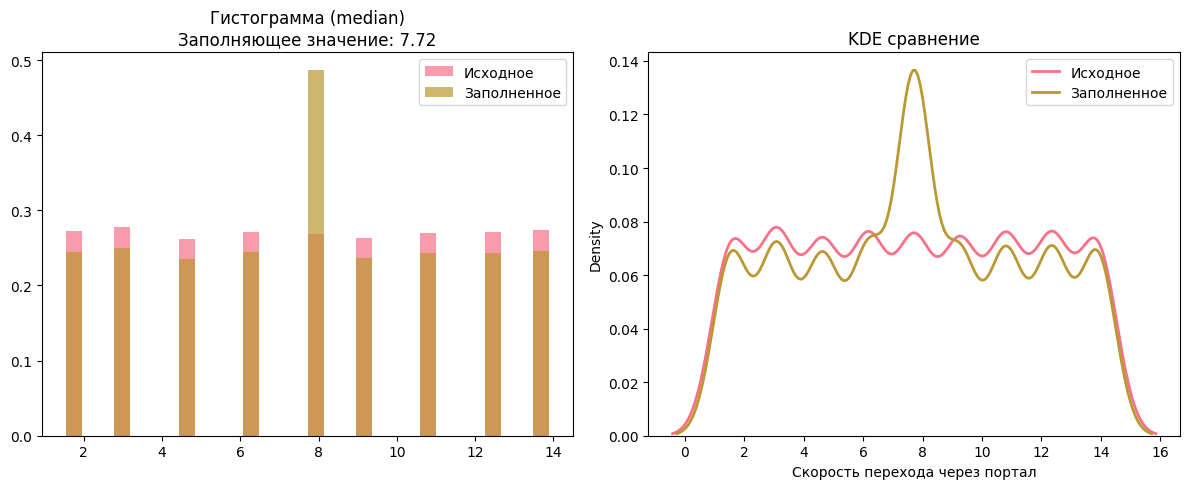

KL-дивергенция (median): 0.0288

--- MEAN ---


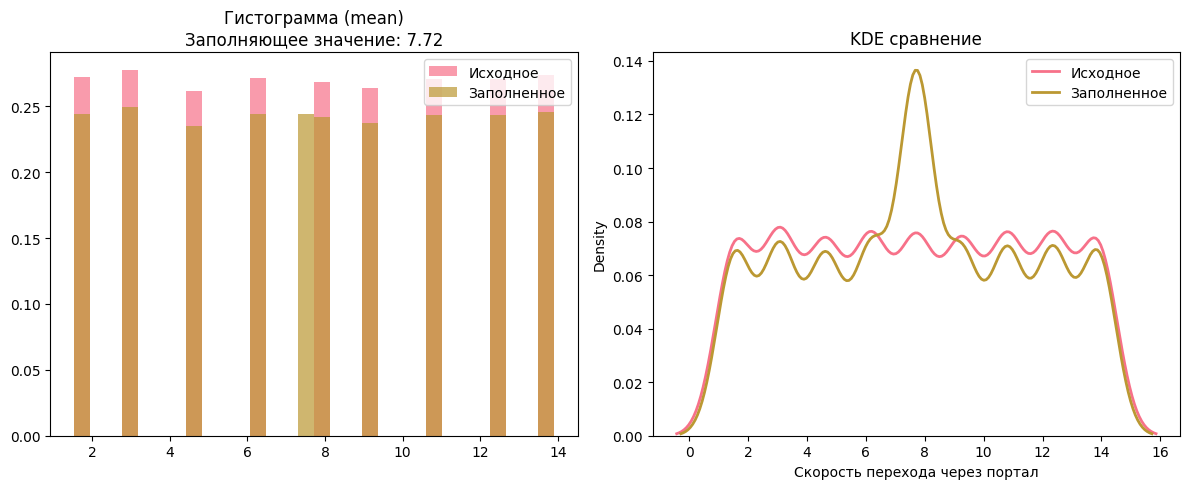

KL-дивергенция (mean): 0.1061

--- MAX ---


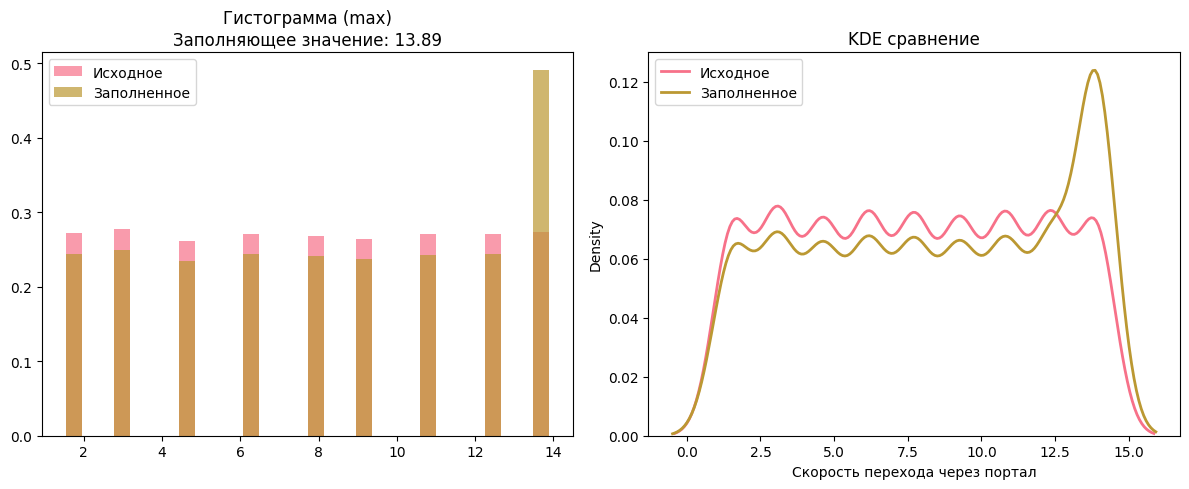

KL-дивергенция (max): 0.0284

--- MIN ---


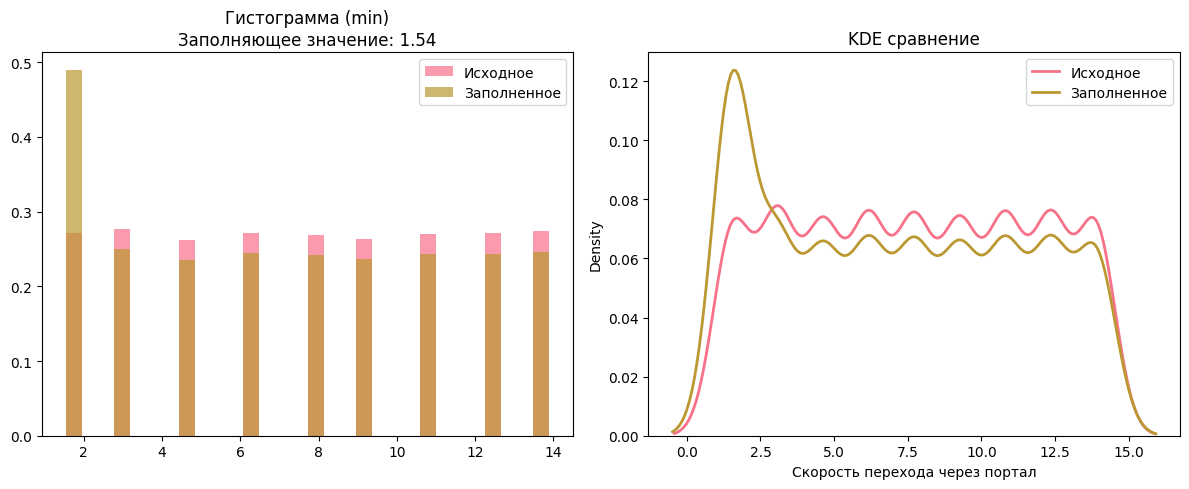

KL-дивергенция (min): 0.0285


In [258]:
def plot_kl_comparison(original, filled, method, value):
    original_clean = original.dropna()

    plt.figure(figsize=(12, 5))

    # Гистограммы
    plt.subplot(1, 2, 1)
    plt.hist(original_clean, bins=30, alpha=0.7, label='Исходное', density=True)
    plt.hist(filled, bins=30, alpha=0.7, label='Заполненное', density=True)
    plt.title(f'Гистограмма ({method})\nЗаполняющее значение: {value:.2f}')
    plt.legend()

    # KDE
    plt.subplot(1, 2, 2)
    sns.kdeplot(original_clean, label='Исходное', linewidth=2)
    sns.kdeplot(filled, label='Заполненное', linewidth=2)
    plt.title('KDE сравнение')
    plt.legend()

    plt.tight_layout()
    plt.show()

    # KL-дивергенция
    hist_orig, bins = np.histogram(original_clean, bins=30, density=True)
    hist_filled, _ = np.histogram(filled, bins=bins, density=True)
    kl_div = entropy(hist_orig + 1e-10, hist_filled + 1e-10)
    print(f'KL-дивергенция ({method}): {kl_div:.4f}')
    return kl_div

kl_divs = {}
for method in methods:
    print(f"\n--- {method.upper()} ---")
    filled = stat_results[method]['train_filled']
    kl_div = plot_kl_comparison(train_df[column_to_impute], filled, method, stat_results[method]['value'])
    kl_divs[method] = kl_div

**Заполняющие значения в статистических методах:**

- Среднее = 7.72
- Медиана = 7.72
- Максимум = 13.89
- Минимум = 1.54

- Данные графики показывают распределение значений и функции плотности при использовании заполнений статистическими методами - медиана, среднее, максимум и минимум.
- Лучшая (одинаковая) KL-дивергенция 0.0282 у всех методов, кроме заполнения минимумом. При заполнении минимумом KL-дивергенция = 0.0279.

**Машинные методы**

**MICE**

Основная идея: итеративный метод, который заполняет пропуски несколько раз, создавая несколько версий датасета (импутаций).

1. Инициализация: Пропуски заполняются простыми методами (среднее/медиана)
2. Итеративный процесс: Для каждого признака с пропусками:
3. Используются ВСЕ остальные признаки как предикторы
4. Строится регрессионная модель (для чисел) или классификация (для категорий)
5. Предсказываются пропущенные значения
6. Цикл повторяется 10-20 раз до стабилизации

--- MICE ---


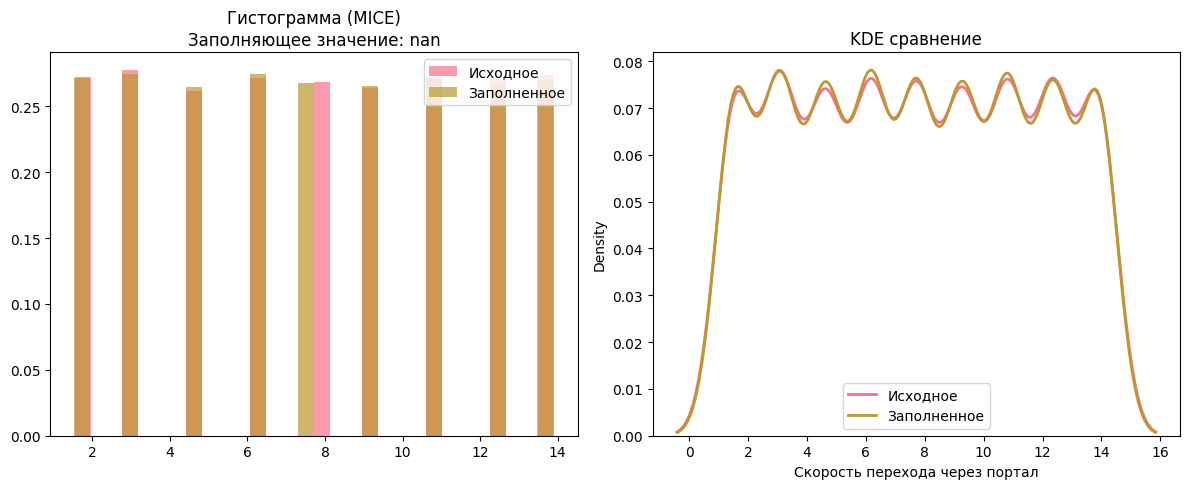

KL-дивергенция (MICE): 0.0116


In [259]:
numeric_cols = train_df.select_dtypes(include=[np.number]).columns.tolist()
X_train = train_df[numeric_cols]
X_test = test_df[numeric_cols]

mice_imputer = IterativeImputer(random_state=42)
X_train_mice = mice_imputer.fit_transform(X_train)
X_test_mice = mice_imputer.transform(X_test)

train_mice_filled = pd.DataFrame(X_train_mice, columns=numeric_cols)[column_to_impute]
test_mice_filled = pd.DataFrame(X_test_mice, columns=numeric_cols)[column_to_impute]

print("--- MICE ---")
kl_mice = plot_kl_comparison(train_df[column_to_impute], train_mice_filled, 'MICE', np.nan)
kl_divs['mice'] = kl_mice

- Заполнение машинным методом MICE: KL-дивергенция 0.0118 - лучше, чем у статистических методов

**KNNImputer**

Основная идея: заполняет пропуски на основе похожих наблюдений (ближайших соседей).

1. Находит k ближайших соседей для строки с пропусками
2. Вычисляет среднее/медиану значений этих соседей
3. Заполняет пропуски полученными значениями

--- KNN Imputer ---


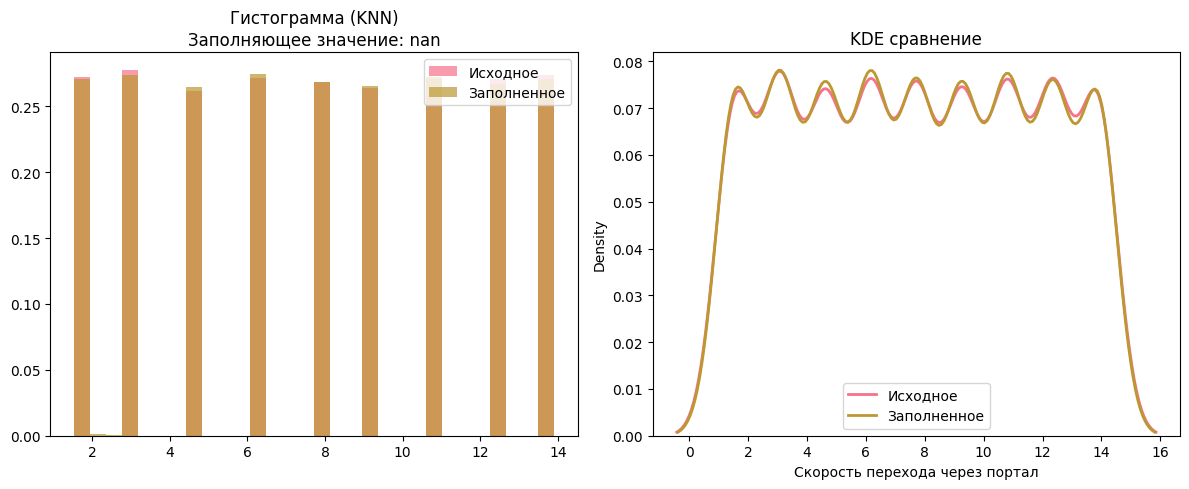

KL-дивергенция (KNN): 0.0008


In [260]:
knn_imputer = KNNImputer(n_neighbors=5)
X_train_knn = knn_imputer.fit_transform(X_train)
X_test_knn = knn_imputer.transform(X_test)

train_knn_filled = pd.DataFrame(X_train_knn, columns=numeric_cols)[column_to_impute]
test_knn_filled = pd.DataFrame(X_test_knn, columns=numeric_cols)[column_to_impute]

print("--- KNN Imputer ---")
kl_knn = plot_kl_comparison(train_df[column_to_impute], train_knn_filled, 'KNN', np.nan)
kl_divs['knn'] = kl_knn

- Заполнение машинным методом KNNImputer: KL-дивергенция 0.0006 - лучше, чем у всех методов выше.

## 2.6. <a id='toc2_6_'></a>[Устранение проблемы наличия выбросов и аномалий в данных](#toc0_)

In [261]:
X_clean = pd.DataFrame(X_train_knn, columns=numeric_cols)
y_train = X_clean['Гармония Бессмертия']
X_clean = X_clean.drop(columns='Гармония Бессмертия')
X_clean.sample(5)

,Вектор Мощи,Скорость перехода через портал,Приток Силы Потока,Ритм магического ядра,Поток Энергий,Сила Левого Потока,Сила Правого Потока,Пламя Стихий,Приток давления Выдоха Истока,Давление выдоха Истока,Печать Чародея,Эмульсия Истока,Дыхание Истока,Тип Вектора Мощи
5649,3.1440,4.6300,8.37e+03,145.2169,7.01e+03,60.2880,60.2880,580.6040,1.3940,7.5670,12.1310,0.2400,0.9990,1.0000
369,2.0880,3.0866,3.64e+03,141.0773,6.85e+03,22.8400,22.8400,532.6230,1.2210,6.5350,20.3320,0.1770,0.9550,0.0000
1951,9.3000,13.8899,7.28e+04,372.8460,9.78e+03,644.8120,644.8120,1.10e+03,4.4920,22.5910,91.2840,1.8070,0.9540,4.0000
8450,3.1440,4.6300,8.37e+03,145.2176,7.03e+03,60.2920,60.2920,581.9800,1.3930,7.5580,12.1780,0.2410,0.9940,1.0000
2597,9.3000,13.8899,7.28e+04,372.8476,9.78e+03,644.7970,644.7970,1.09e+03,4.4840,22.3890,90.2940,1.7870,0.9560,4.0000


### 2.6.1. <a id='toc2_6_1_'></a>[Поиск выбросов](#toc0_)

**Метод IQR**

1. Вычисляет квартили:
- Q1 (25-й перцентиль) - 25% данных ниже этого значения
- Q3 (75-й перцентиль) - 75% данных ниже этого значения
2. Считает IQR: IQR = Q3 - Q1 (разница между 75% и 25%)
3. Определяет границы:
- Нижняя граница = Q1 - 1.5 * IQR
- Верхняя граница = Q3 + 1.5 * IQR
- Выбросы - все точки за этими границами

In [262]:
def find_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR=Q3-Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    outlers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]

    return outlers.index.tolist()

**Метод Robust Z-score**

1. Вычисляет медиану (50-й перцентиль)
2. Считает MAD: медиана абсолютных отклонений от медианы: MAD = median(|x_i - median(X)|)
3. Масштабирует MAD: умножает на 0.6745 для нормального распределения
4. Считает Robust Z-score: z = 0.6745 * (x - median) / MAD
5. Выбросы - точки с |z| > порога (обычно 2.2-3.0)

In [263]:
def find_outliers_robust_zscore(data, column, threshold=2.2):
    median = data[column].median()
    mad = stats.median_abs_deviation(data[column], scale='normal') # mad = медиана абсолютных отклонений от медианы данных

    if mad==0:
        return []

    robust_z=0.6745*(data[column]-median)/mad
    outlers = data[np.abs(robust_z) > threshold]

    return outlers.index.tolist()

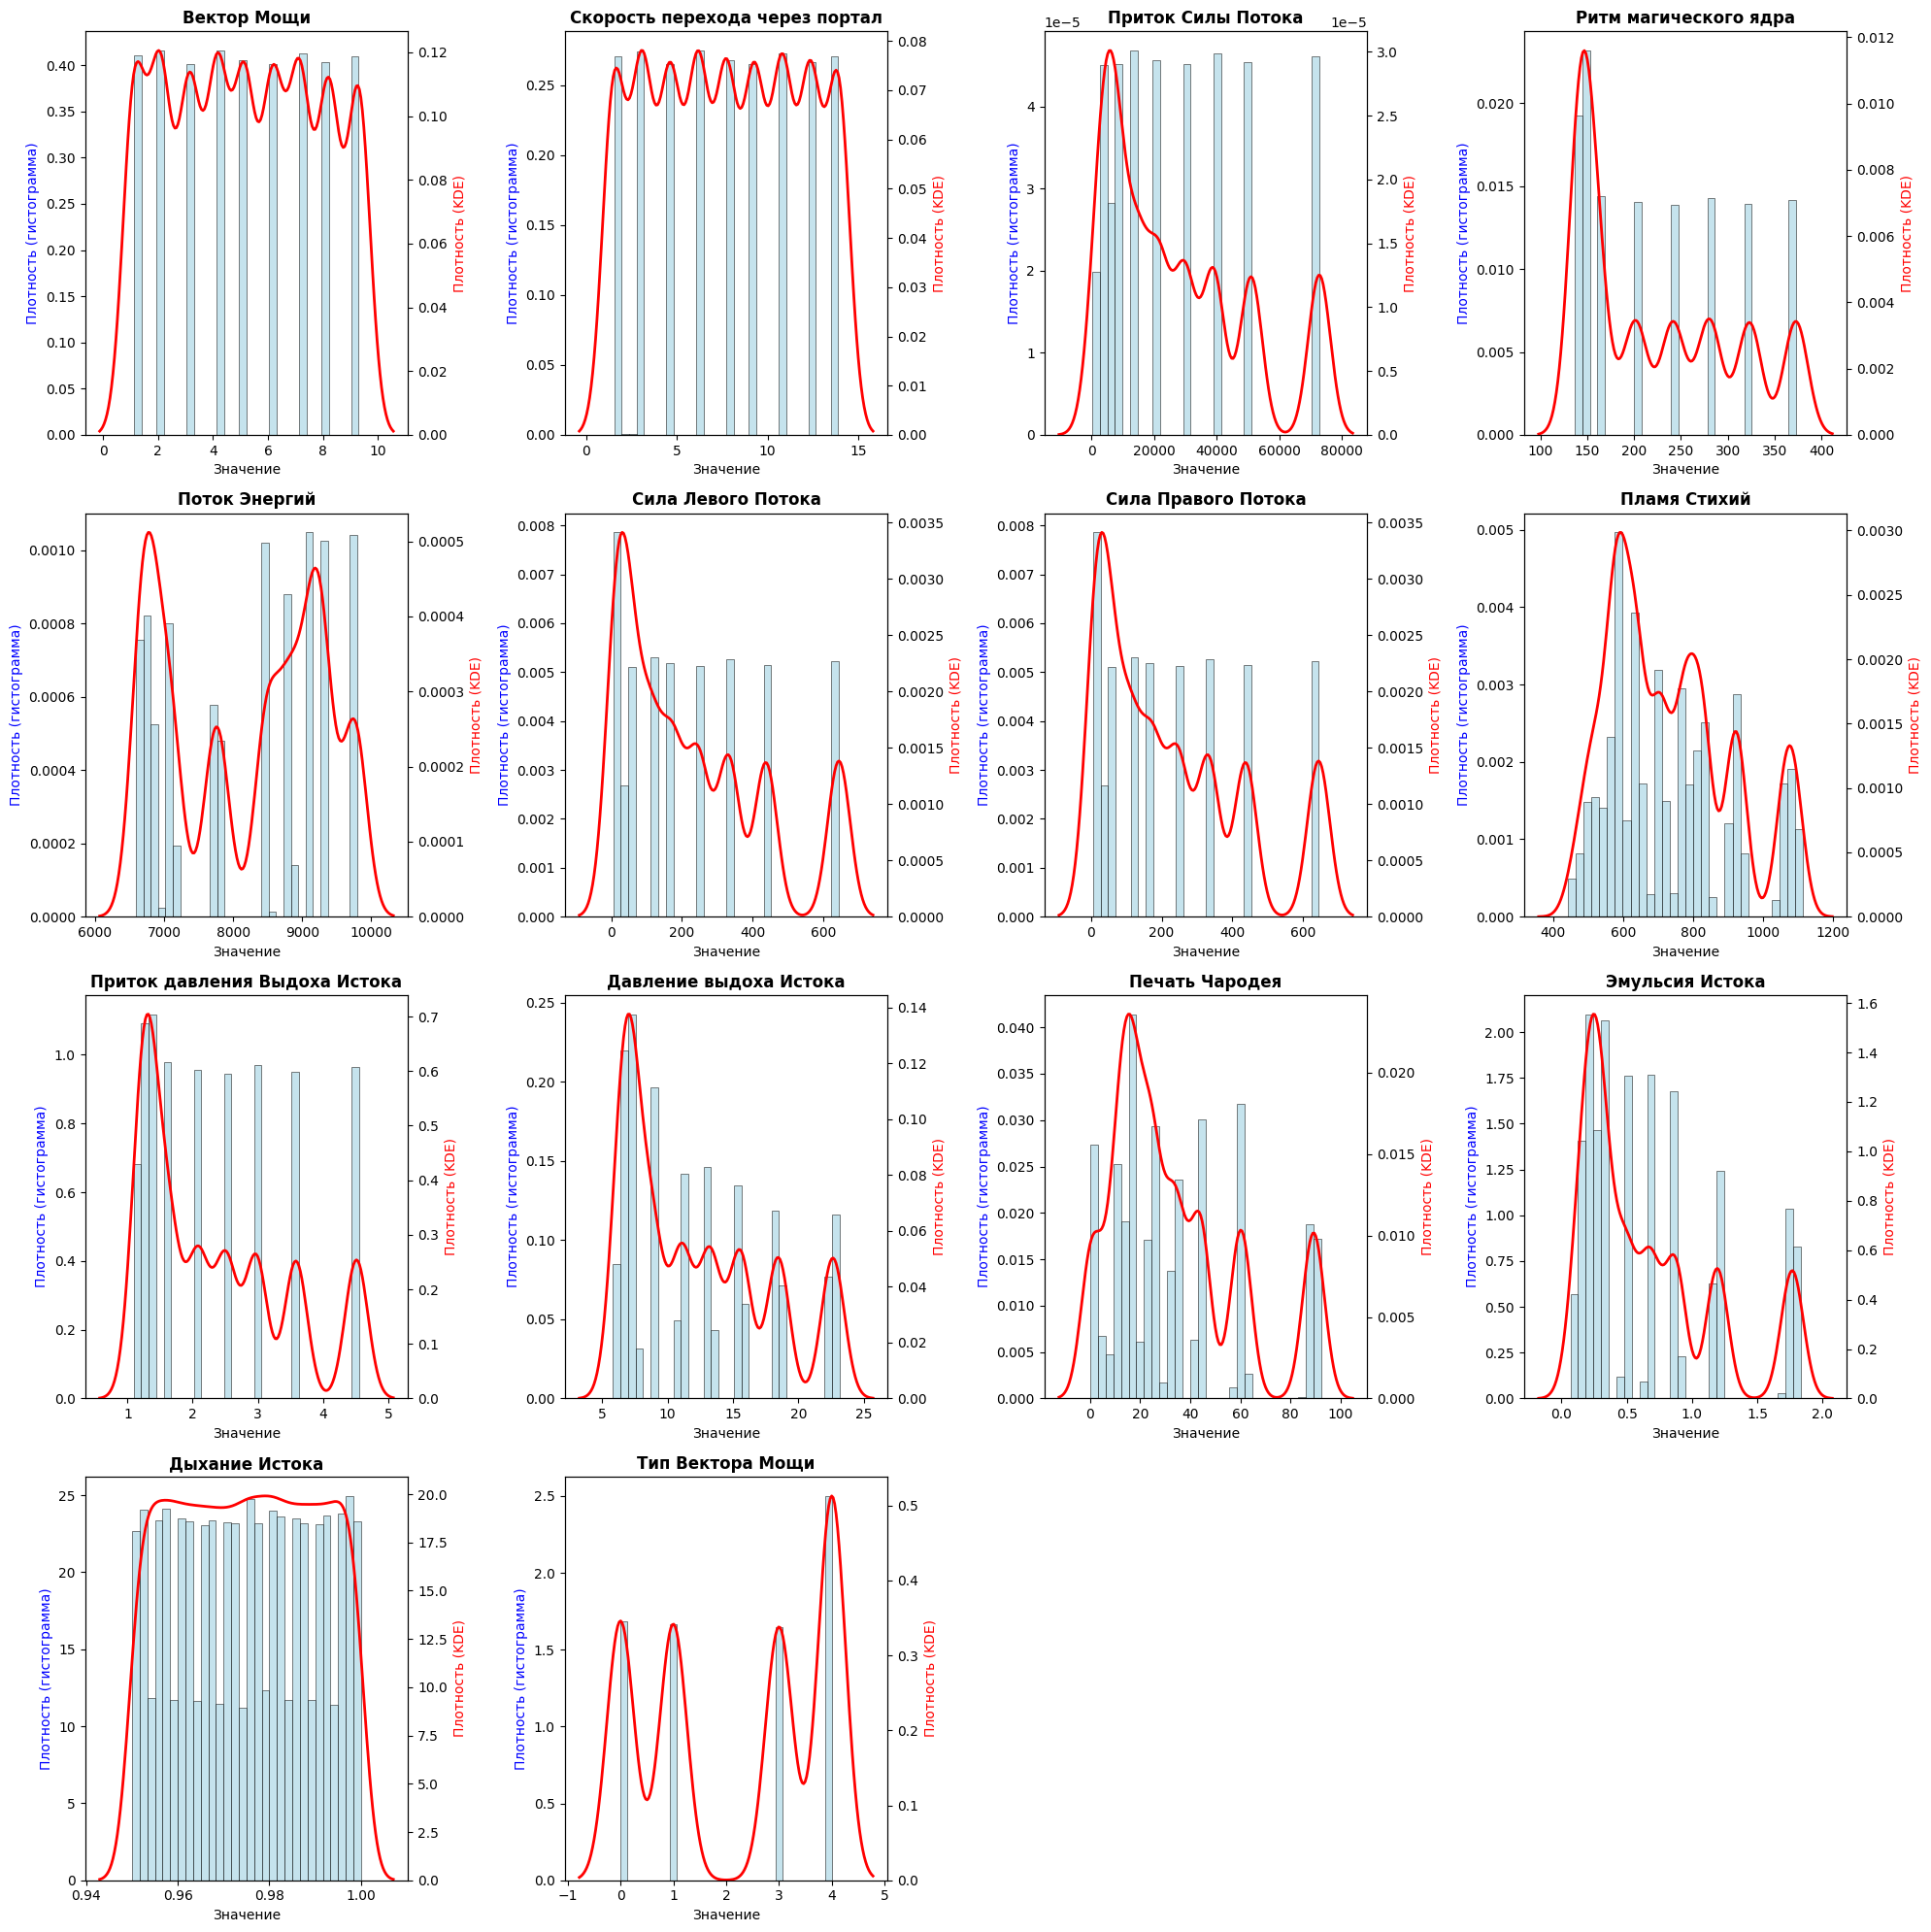

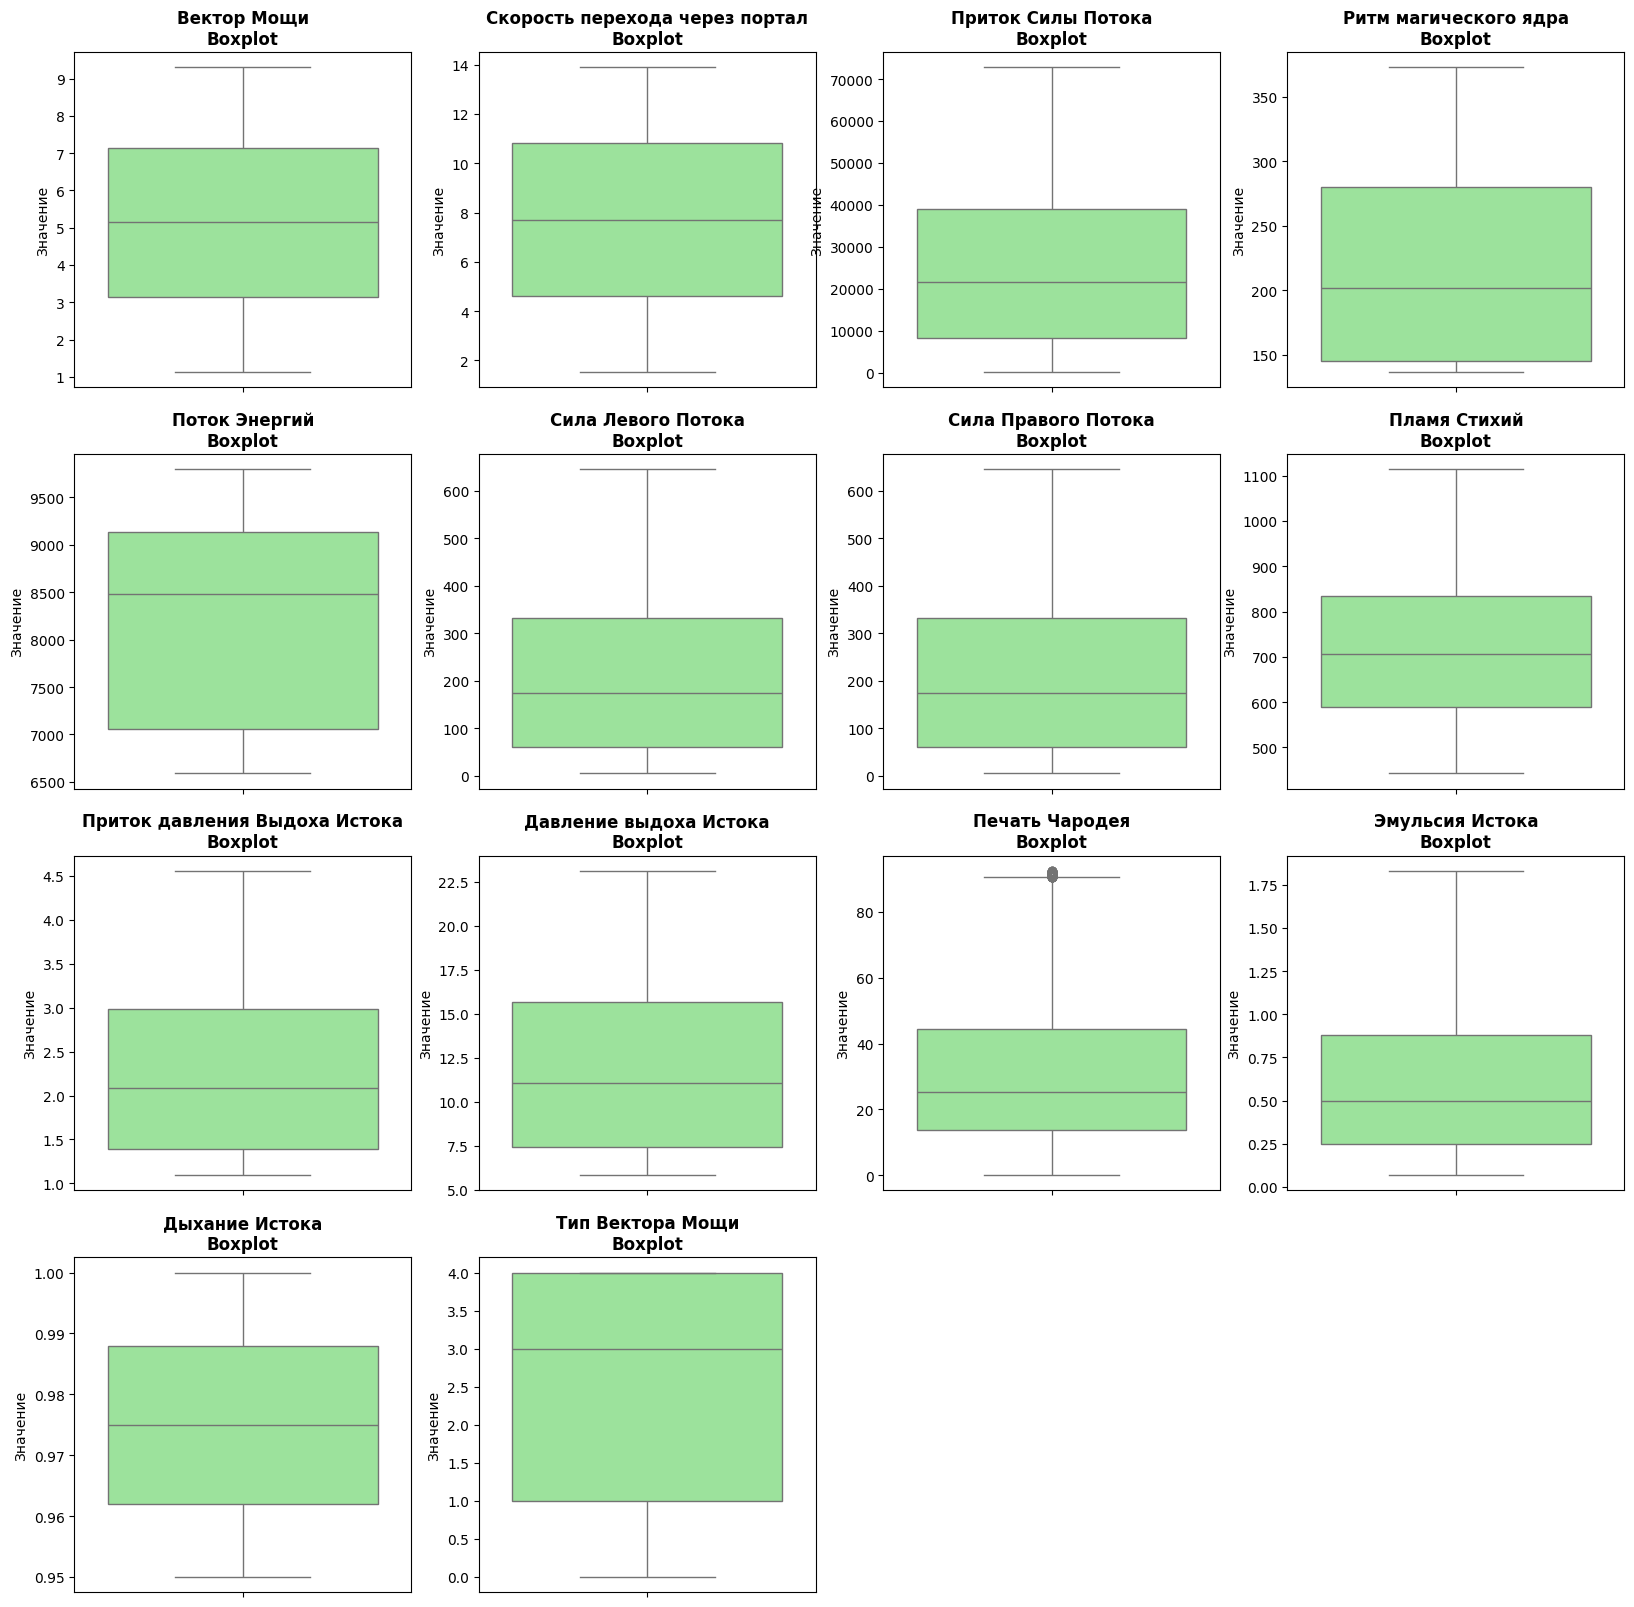

In [264]:
plt.style.use('default')
sns.set_palette("husl")

n_cols = 4
n_rows = (len(X_clean.columns) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))
axes = axes.flatten()

for i, column in enumerate(X_clean.columns):
    if i < len(axes):
        data = X_clean[column].dropna()

        ax1 = axes[i]
        ax2 = ax1.twinx()

        # Гистограмма
        n, bins, patches = ax1.hist(data, bins=30, alpha=0.7, color='lightblue',
                                   edgecolor='black', linewidth=0.5, density=True,
                                   label='Гистограмма')

        # KDE
        sns.kdeplot(data, ax=ax2, color='red', linewidth=2, label='KDE')

        ax1.set_title(f'{column}', fontsize=12, fontweight='bold')
        ax1.set_xlabel('Значение')
        ax1.set_ylabel('Плотность (гистограмма)', color='blue')
        ax2.set_ylabel('Плотность (KDE)', color='red')

for j in range(len(X_clean.columns), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

# Boxplots для всех столбцов
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))
axes = axes.flatten()

for i, column in enumerate(X_clean.columns):
    if i < len(axes):
        data = X_clean[column].dropna()

        # Boxplot
        sns.boxplot(y=data, ax=axes[i], color='lightgreen')
        axes[i].set_title(f'{column}\nBoxplot', fontsize=12, fontweight='bold')
        axes[i].set_ylabel('Значение')

for j in range(len(X_clean.columns), len(axes)):
    axes[j].set_visible(False)

- На графиках показаны распределения (гистограмма и плотность) и ящики с усами.
- Нет столбцов с нормальным распределением. Есть равномерное распределение у Дыхание Истока.

In [320]:
X_clean.describe()

,Вектор Мощи,Скорость перехода через портал,Приток Силы Потока,Ритм магического ядра,Поток Энергий,Сила Левого Потока,Сила Правого Потока,Пламя Стихий,Приток давления Выдоха Истока,Давление выдоха Истока,Печать Чародея,Эмульсия Истока,Дыхание Истока,Тип Вектора Мощи
count,9.55e+03,9.55e+03,9.55e+03,9.55e+03,9.55e+03,9.55e+03,9.55e+03,9.55e+03,9.55e+03,9.55e+03,9.55e+03,9.55e+03,9.55e+03,9.55e+03
mean,5.1572,7.7023,2.72e+04,223.4773,8.20e+03,226.8345,226.8345,734.9098,2.3500,12.2814,33.5933,0.6612,0.9751,2.2143
std,2.6297,3.9897,2.22e+04,81.1058,1.09e+03,200.6755,200.6755,173.8690,1.0855,5.3408,25.8516,0.5075,0.0147,1.6214
min,1.1380,1.5433,253.5470,136.9394,6.59e+03,5.3040,5.3040,442.3640,1.0930,5.8280,0.0000,0.0680,0.9500,0.0000
25%,3.1440,4.6300,8.38e+03,145.2210,7.06e+03,60.3160,60.3160,589.7215,1.3890,7.4440,13.7565,0.2460,0.9620,1.0000
50%,5.1400,7.7166,2.16e+04,201.5149,8.48e+03,175.2660,175.2660,705.4650,2.0820,11.0840,25.2420,0.4960,0.9750,3.0000
75%,7.1480,10.8032,3.90e+04,280.4477,9.13e+03,332.3630,332.3630,833.8005,2.9810,15.6560,44.5295,0.8820,0.9880,4.0000
max,9.3000,13.8899,7.28e+04,372.8799,9.80e+03,645.2490,645.2490,1.11e+03,4.5580,23.1330,92.4760,1.8310,1.0000,4.0000


**Примеры**

1. Вектор Мощи: медиана ~5, IQR ~3 - ~7, диапазон: от ~1 до ~9
2. Скорость перехода через портал: медиана ~8, IQR ~5 - ~11, диапазон: от ~1 до ~14
3. Приток Силы Потока: медиана ~21600, IQR ~8300 - ~39000, диапазон: от ~253 до ~70000
4. Ритм магического ядра:  медиана ~201, IQR ~145 - ~280, диапазон: от ~137 до ~373
5. Поток Энергий: медиана ~8500, IQR ~7000 - ~9100, диапазон: от ~6500 до ~9800
6. Сила Левого потока: медиана ~190, IQR ~90 - ~340, диапазон: от ~10 до ~650
7. Сила Правого потока: медиана ~190, IQR ~90 - ~340, диапазон: от ~10 до ~650
8. Пламя стихий: медиана ~700, IQR ~600 - ~850, диапазон: от ~400 до ~1100
9. Приток давления выдоха истока: медиана ~2, IQR ~1.5 - ~3, диапазон: от ~1 до ~4.5
10. Давлении выдоха истока: медиана ~11.5, IQR ~7.5- ~16, диапазон: от ~6 до ~23
11. Печать Чародея: медиана ~28, IQR ~18 - ~45, диапазон: от ~10 до ~93, **есть выбросы**.
12. Эмульсия Истока: медиана ~0.5, IQR ~0.25 - ~0.9, диапазон: от ~0.1 до ~1.75
13. Дыхание Истока: медиана ~0.98, IQR ~0.96 - ~0.99, диапазон: от ~0.95 до ~1
14. Тип вектора мощи: медиана 3, IQR 1 - 4, диапазон: от 0 до 4

- **Столбец "Печать чародея" имеет выбросы, удалим их с помощью пересечения методов IQR и Robust Z-score**

In [265]:
outlier_rows_all = set()

for column in X_clean.columns:
    iqr_outliers = find_outliers_iqr(X_clean, column)
    robust_outliers = find_outliers_robust_zscore(X_clean, column)
    common_outliers = set(iqr_outliers) & set(robust_outliers)
    outlier_rows_all.update(common_outliers)

    print(column)
    print(f"IQR: {len(iqr_outliers)}")
    print(f"Robust Z-score: {len(robust_outliers)}")
    print(f"Пересечение: {len(common_outliers)}")
    print("---"*10)


Вектор Мощи
IQR: 0
Robust Z-score: 0
Пересечение: 0
------------------------------
Скорость перехода через портал
IQR: 0
Robust Z-score: 0
Пересечение: 0
------------------------------
Приток Силы Потока
IQR: 0
Robust Z-score: 0
Пересечение: 0
------------------------------
Ритм магического ядра
IQR: 0
Robust Z-score: 0
Пересечение: 0
------------------------------
Поток Энергий
IQR: 0
Robust Z-score: 0
Пересечение: 0
------------------------------
Сила Левого Потока
IQR: 0
Robust Z-score: 0
Пересечение: 0
------------------------------
Сила Правого Потока
IQR: 0
Robust Z-score: 0
Пересечение: 0
------------------------------
Пламя Стихий
IQR: 0
Robust Z-score: 0
Пересечение: 0
------------------------------
Приток давления Выдоха Истока
IQR: 0
Robust Z-score: 0
Пересечение: 0
------------------------------
Давление выдоха Истока
IQR: 0
Robust Z-score: 0
Пересечение: 0
------------------------------
Печать Чародея
IQR: 186
Robust Z-score: 613
Пересечение: 186
--------------------------

**Итог:**
- Печать Чародея: IQR: 207, Robust Z-score: 665, пересечение - 207
- Эмульсия Истока: IQR: 0, Robust Z-score: 490, пересечение - 0

In [266]:
outlier_indices = list(outlier_rows_all)

outliers_df = X_clean.iloc[outlier_indices[:10]]
outliers_df.head()

X_clean_outliers = X_clean.drop(index=outlier_rows_all)
print(f"Исходный размер: {X_clean.shape}, После удаления выбросов: {X_clean_outliers.shape}")

Исходный размер: (9547, 14), После удаления выбросов: (9361, 14)


### 2.6.2. <a id='toc2_6_2_'></a>[Поиск аномалий](#toc0_)

- Воспользуемся методами IsolationForest, DBSCAN, One-class SVM

In [267]:
import umap.umap_ as umap

In [268]:
def plot_anomalies_comparison(X_scaled, algorithms_dict, reduction_method='umap', figsize=(20, 15)):
    if reduction_method == 'umap':
        reducer = umap.UMAP(n_components=2, random_state=42)
        X_reduced = reducer.fit_transform(X_scaled)
        method_name = 'UMAP'
    else:
        reducer = PCA(n_components=2, random_state=42)
        X_reduced = reducer.fit_transform(X_scaled)
        method_name = 'PCA'

    n_algorithms = len(algorithms_dict)
    n_cols = min(3, n_algorithms)
    n_rows = (n_algorithms + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    if n_algorithms > 1:
        axes = axes.flatten()
    else:
        axes = [axes]

    for idx, (algo_name, (model, predictions)) in enumerate(algorithms_dict.items()):
        if idx < len(axes):
            ax = axes[idx]

            # Разделяем на нормальные точки и аномалии
            normal_mask = predictions == 0
            anomaly_mask = predictions == 1

            if np.any(normal_mask):
                ax.scatter(X_reduced[normal_mask, 0], X_reduced[normal_mask, 1],
                          c='blue', alpha=0.6, s=20, marker='o', label='Нормальные')

            if np.any(anomaly_mask):
                ax.scatter(X_reduced[anomaly_mask, 0], X_reduced[anomaly_mask, 1],
                          c='red', alpha=0.8, s=50, marker='x', linewidth=2, label='Аномалии')

            ax.set_title(f'{algo_name}\n({method_name} - Аномалий: {np.sum(anomaly_mask)})',
                        fontsize=12, fontweight='bold')
            ax.set_xlabel(f'{method_name}1')
            ax.set_ylabel(f'{method_name}2')
            ax.legend()
            ax.grid(True, alpha=0.3)

    for j in range(len(algorithms_dict), len(axes)):
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.show()

In [269]:
def plot_intersection_anomalies(algorithms_dict, X_scaled, reduction_method='umap', figsize=(12, 8)):
    # Собираем индексы аномалий от каждого метода
    anomaly_sets = {}
    for algo_name, (model, predictions) in algorithms_dict.items():
        anomaly_sets[algo_name] = set(np.where(predictions == 1)[0])

    # Находим пересечение всех наборов
    method_names = list(anomaly_sets.keys())
    if len(method_names) >= 2:
        common_anomalies = anomaly_sets[method_names[0]]
        for method in method_names[1:]:
            common_anomalies = common_anomalies.intersection(anomaly_sets[method])
    else:
        common_anomalies = anomaly_sets[method_names[0]]

    # Создаем бинарный массив предсказаний для пересечения
    intersection_predictions = np.zeros(len(X_scaled))
    intersection_predictions[list(common_anomalies)] = 1

    # Подготовка данных для визуализации
    if reduction_method == 'umap':
        reducer = umap.UMAP(n_components=2, random_state=42)
        X_reduced = reducer.fit_transform(X_scaled)
        method_name = 'UMAP'
    else:
        reducer = PCA(n_components=2, random_state=42)
        X_reduced = reducer.fit_transform(X_scaled)
        method_name = 'PCA'

    # Создаем график
    fig, axes = plt.subplots(1, 2, figsize=figsize)

    # Первый subplot: визуализация всех данных с выделением пересечения
    ax1 = axes[0]

    normal_mask = intersection_predictions == 0
    intersection_mask = intersection_predictions == 1

    if np.any(normal_mask):
        ax1.scatter(X_reduced[normal_mask, 0], X_reduced[normal_mask, 1],
                   c='blue', alpha=0.6, s=20, marker='o', label='Нормальные')

    if np.any(intersection_mask):
        ax1.scatter(X_reduced[intersection_mask, 0], X_reduced[intersection_mask, 1],
                   c='red', alpha=0.8, s=80, marker='*', linewidth=2,
                   label='Пересечение аномалий')

    ax1.set_title(f'Пересечение аномалий всех методов\n({method_name})',
                 fontsize=12, fontweight='bold')
    ax1.set_xlabel(f'{method_name}1')
    ax1.set_ylabel(f'{method_name}2')
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    # Второй subplot: гистограмма количества аномалий
    ax2 = axes[1]

    # Данные для гистограммы
    methods = list(algorithms_dict.keys())
    anomaly_counts = [np.sum(predictions == 1) for _, (_, predictions) in algorithms_dict.items()]
    intersection_count = len(common_anomalies)

    # Добавляем пересечение в список
    methods.append('Пересечение')
    anomaly_counts.append(intersection_count)

    colors = ['skyblue'] * len(algorithms_dict) + ['lightcoral']

    bars = ax2.bar(methods, anomaly_counts, color=colors)

    ax2.set_title('Количество найденных аномалий', fontsize=12, fontweight='bold')
    ax2.set_ylabel('Количество')
    ax2.set_xticklabels(methods, rotation=45, ha='right')

    for bar, count in zip(bars, anomaly_counts):
        ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
                f'{count}', ha='center', va='bottom', fontweight='bold')

    ax2.grid(True, alpha=0.3, axis='y')

    plt.tight_layout()
    plt.show()


    print(f"\nСтатистика")

    for i, (algo_name, (_, predictions)) in enumerate(algorithms_dict.items()):
        count = np.sum(predictions == 1)
        percentage = count / len(predictions) * 100
        print(f"{algo_name}: {count} аномалий ({percentage:.2f}%)")

    print(f"Пересечение (все методы): {len(common_anomalies)} аномалий")
    print(f"Процент от общего объема: {len(common_anomalies)/len(X_scaled)*100:.2f}%")
    print(f"Процент от минимального метода: {len(common_anomalies)/min(anomaly_counts[:-1])*100:.2f}%")

    return common_anomalies, intersection_predictions

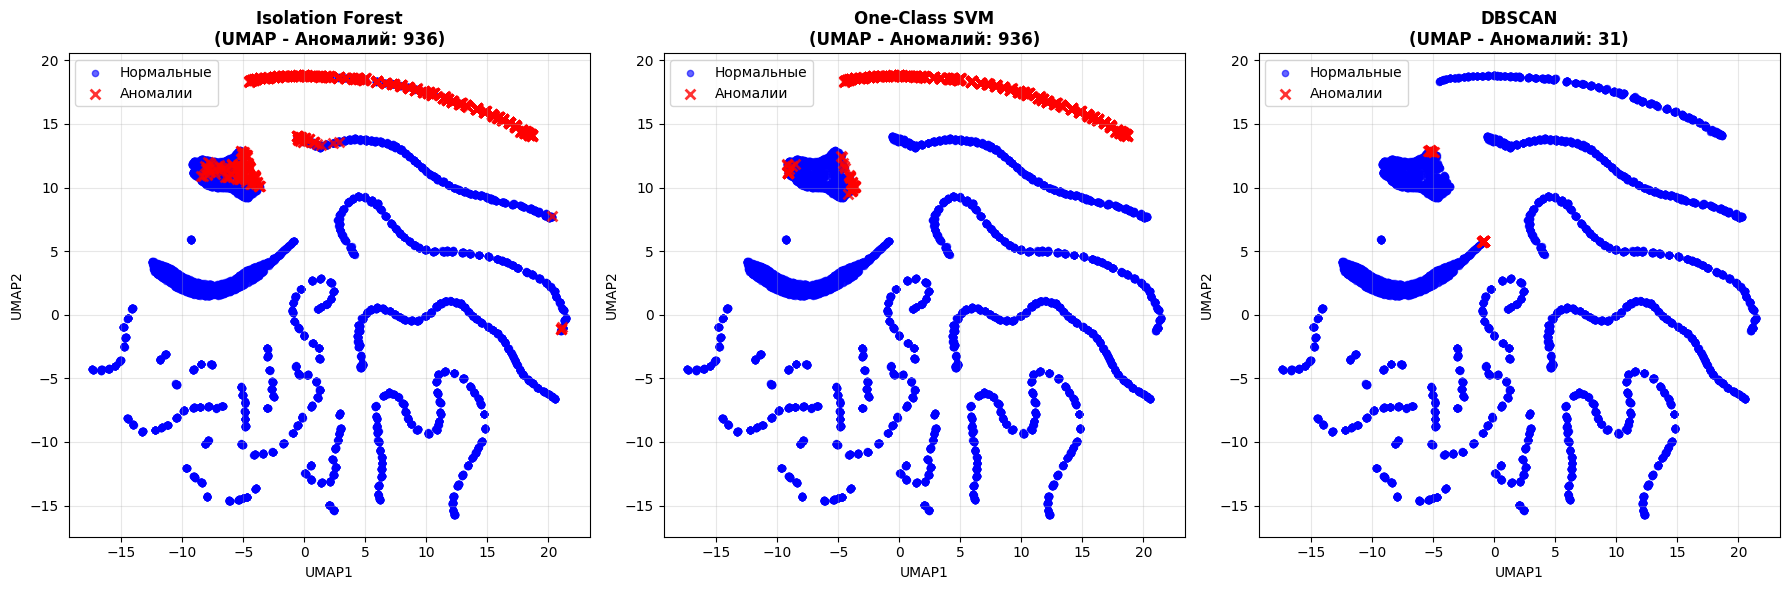

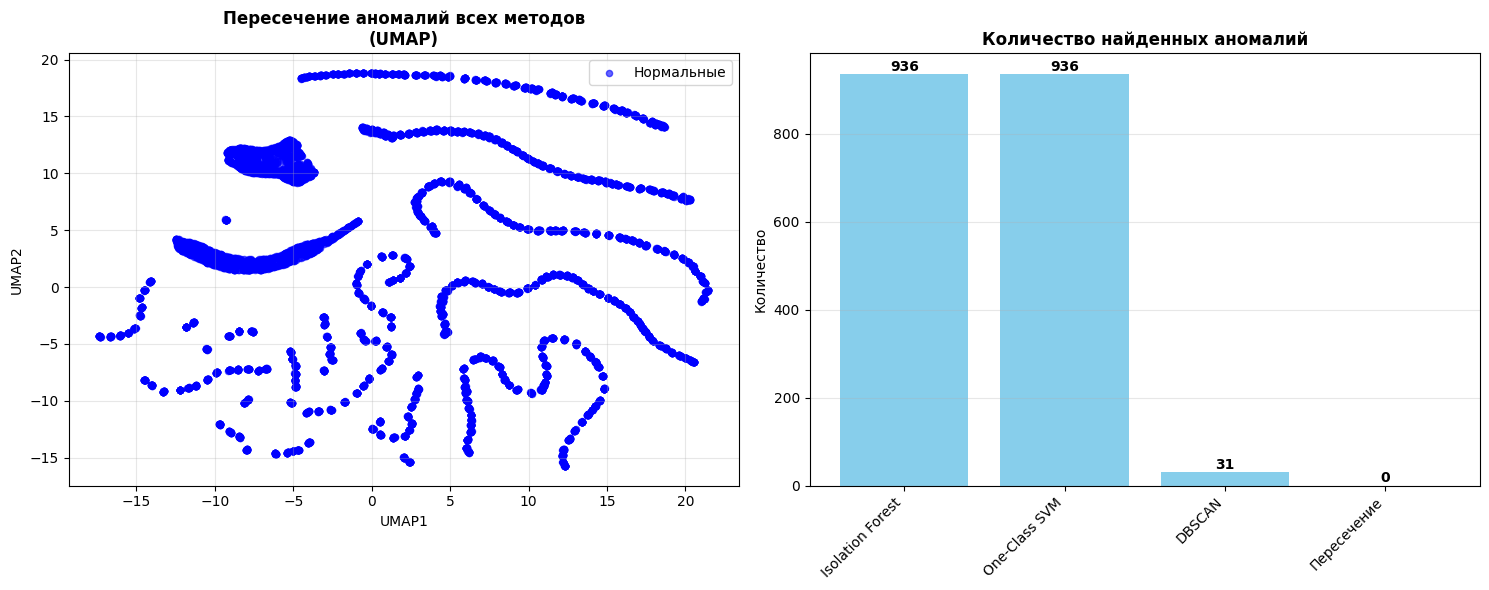


Статистика
Isolation Forest: 936 аномалий (10.00%)
One-Class SVM: 936 аномалий (10.00%)
DBSCAN: 31 аномалий (0.33%)
Пересечение (все методы): 0 аномалий
Процент от общего объема: 0.00%
Процент от минимального метода: 0.00%

Обработка:
Исходный размер: (9361, 14)
Удалено аномалий (пересечение): 0
Финальный размер: (9361, 14), (9361,)


In [270]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clean_outliers)


from sklearn.model_selection import GridSearchCV, ParameterGrid
from sklearn.metrics import silhouette_score, calinski_harabasz_score

# Метод для подбора eps через k-расстояния
def find_optimal_eps(X, k=10):
    from sklearn.neighbors import NearestNeighbors
    neighbors = NearestNeighbors(n_neighbors=k)
    neighbors_fit = neighbors.fit(X)
    distances, indices = neighbors_fit.kneighbors(X)
    distances = np.sort(distances[:, k-1], axis=0)

    # локоть
    gradients = np.diff(distances)
    optimal_idx = np.argmax(gradients) + 1
    optimal_eps = distances[optimal_idx]

    return optimal_eps, distances

optimal_eps, distances = find_optimal_eps(X_scaled, k=7)


iforest = IForest()
ocsvm = OCSVM()
dbscan = DBSCAN(eps=optimal_eps, min_samples=28)

iforest.fit(X_scaled)
ocsvm.fit(X_scaled)

iforest_pred = iforest.labels_
ocsvm_pred = ocsvm.labels_

dbscan_pred = dbscan.fit_predict(X_scaled)
# Преобразуем в формат pyod: -1 -> 1 (аномалия), остальное -> 0 (норма)
dbscan_pred_binary = np.where(dbscan_pred == -1, 1, 0)

algorithms_dict = {
    'Isolation Forest': (iforest, iforest_pred),
    'One-Class SVM': (ocsvm, ocsvm_pred),
    'DBSCAN': (dbscan, dbscan_pred_binary)
}

plot_anomalies_comparison(X_scaled, algorithms_dict, reduction_method='umap', figsize=(18, 6))
anomaly_counts = {
    'Isolation Forest': np.sum(iforest_pred),
    'One-Class SVM': np.sum(ocsvm_pred),
    'DBSCAN': np.sum(dbscan_pred_binary)
}


common_anomalies, intersection_predictions = plot_intersection_anomalies(
    algorithms_dict,
    X_scaled,
    reduction_method='umap',
    figsize=(15, 6)
)

# Удаляем только пересечение аномалий
final_indices = list(set(range(len(X_clean_outliers))) - common_anomalies)
X_final = X_clean_outliers.iloc[final_indices]
y_final = y_train.loc[X_final.index]

print(f"\nОбработка:")
print(f"Исходный размер: {X_clean_outliers.shape}")
print(f"Удалено аномалий (пересечение): {len(common_anomalies)}")
print(f"Финальный размер: {X_final.shape}, {y_final.shape}")

**В первой строке** показаны графики аномалий для трех методов, редуцированные с помощью UMAP. Синими точками отвечены нормальные данные, красными звездочками - строки, которые модель посчитала аномалией.
- Isolation Forest: 994 аномалий (10.00% от всех данных)
- One-Class SVM: 994 аномалий (10.00% от всех данных)
- DBSCAN: 56 аномалий (0.56% от всех данных)
- Пересечение (все методы): 5 аномалий

**Применение к тестовой выборке**

In [ ]:
def apply_outlier_detection_to_test(train_data, test_data, numeric_cols):
    from scipy import stats
    import pandas as pd
    import numpy as np

    if not isinstance(test_data, pd.DataFrame):
        X_test_clean = pd.DataFrame(test_data, columns=numeric_cols)
    else:
        X_test_clean = test_data.copy()

    print(f"Исходный размер тестовой выборки: {X_test_clean.shape}")

    # Удаляем столбец если он существует
    if 'Гармония Бессмертия' in X_test_clean.columns:
        X_test_clean = X_test_clean.drop(columns='Гармония Бессмертия')
        print("Столбец 'Гармония Бессмертия' удален из тестовых данных")

    print("\nВычисление параметров выбросов на обучающей выборке")

    # IQR параметры с обучающей выборки
    iqr_params = {}
    for column in train_data.columns:
        if column in X_test_clean.columns:
            Q1 = train_data[column].quantile(0.25)
            Q3 = train_data[column].quantile(0.75)
            IQR = Q3 - Q1
            iqr_params[column] = {
                'lower_bound': Q1 - 1.5 * IQR,
                'upper_bound': Q3 + 1.5 * IQR
            }

    # Robust Z-score параметры с обучающей выборки
    robust_z_params = {}
    for column in train_data.columns:
        if column in X_test_clean.columns:
            median = train_data[column].median()
            mad = stats.median_abs_deviation(train_data[column], scale='normal')
            robust_z_params[column] = {'median': median, 'mad': mad}

    test_outlier_indices = set()

    # IQR метод
    print("\nПрименение IQR метода к тестовым данным:")
    for column in X_test_clean.columns:
        if column in iqr_params:
            lower = iqr_params[column]['lower_bound']
            upper = iqr_params[column]['upper_bound']
            outliers = X_test_clean[(X_test_clean[column] < lower) | (X_test_clean[column] > upper)]
            if not outliers.empty:
                test_outlier_indices.update(outliers.index.tolist())
                print(f"  {column}: найдено {len(outliers)} выбросов")

    # Robust Z-score метод
    print("\nПрименение Robust Z-score метода к тестовым данным:")
    for column in X_test_clean.columns:
        if column in robust_z_params:
            median = robust_z_params[column]['median']
            mad = robust_z_params[column]['mad']

            if mad == 0:
                print(f"  {column}: MAD = 0, пропускаем")
                continue

            robust_z = 0.6745 * (X_test_clean[column] - median) / mad
            outliers = X_test_clean[np.abs(robust_z) > 2.2]
            if not outliers.empty:
                test_outlier_indices.update(outliers.index.tolist())
                print(f"  {column}: найдено {len(outliers)} выбросов")

    # Удаляем выбросы
    X_test_clean_outliers = X_test_clean.drop(index=list(test_outlier_indices))

    print(f"\nТестовая выборка после удаления выбросов: {X_test_clean_outliers.shape}")
    print(f"Удалено выбросов из тестовой выборки: {len(test_outlier_indices)}")
    print(f"Процент удаленных выбросов: {len(test_outlier_indices)/len(X_test_clean)*100:.2f}%")

    return X_test_clean_outliers, test_outlier_indices


def apply_anomaly_detection_to_test(train_data, test_data, models_dict, scaler, reduction_method='umap'):
    print(f"Исходный размер тестовой выборки: {test_data.shape}")

    # Масштабируем тестовые данные с использованием того же scaler
    X_test_scaled = scaler.transform(test_data)

    test_predictions_dict = {}
    test_anomaly_sets = {}

    print("\nПрименение моделей аномалий к тестовым данным:")

    for algo_name, (model, train_predictions) in models_dict.items():
        if algo_name == 'Isolation Forest':
            test_pred = model.predict(X_test_scaled)
            test_anomaly_sets[algo_name] = set(np.where(test_pred == 1)[0])
            test_predictions_dict[algo_name] = (model, test_pred)

        elif algo_name == 'One-Class SVM':
            test_pred = model.predict(X_test_scaled)
            test_anomaly_sets[algo_name] = set(np.where(test_pred == 1)[0])
            test_predictions_dict[algo_name] = (model, test_pred)

        elif algo_name == 'DBSCAN':
            from sklearn.cluster import DBSCAN
            dbscan_test = DBSCAN(eps=model.eps, min_samples=model.min_samples)
            test_pred = dbscan_test.fit_predict(X_test_scaled)
            test_pred_binary = np.where(test_pred == -1, 1, 0)
            test_anomaly_sets[algo_name] = set(np.where(test_pred_binary == 1)[0])
            test_predictions_dict[algo_name] = (dbscan_test, test_pred_binary)

        print(f"{algo_name}: найдено {len(test_anomaly_sets[algo_name])} аномалий")

    # Находим пересечение аномалий в тестовых данных
    method_names = list(test_anomaly_sets.keys())
    if len(method_names) >= 2:
        common_test_anomalies = test_anomaly_sets[method_names[0]]
        for method in method_names[1:]:
            common_test_anomalies = common_test_anomalies.intersection(test_anomaly_sets[method])
    else:
        common_test_anomalies = test_anomaly_sets[method_names[0]]

    print(f"\nПересечение аномалий в тестовых данных: {len(common_test_anomalies)}")

    # Удаляем пересечение аномалий из тестовых данных
    test_final_indices = list(set(range(len(test_data))) - common_test_anomalies)
    X_test_final = test_data.iloc[test_final_indices]

    print(f"\nРезультаты:")
    print(f"Тестовая выборка после удаления аномалий: {X_test_final.shape}")
    print(f"Удалено аномалий из тестовой выборки: {len(common_test_anomalies)}")
    print(f"Процент удаленных аномалий: {len(common_test_anomalies)/len(test_data)*100:.2f}%")

    return X_test_final, common_test_anomalies, test_predictions_dict

# Создаем копию тестовых данных
X_test_clean = X_test.copy()

# Проверяем наличие целевой переменной в данных
if 'Гармония Бессмертия' in X_test_clean.columns:
    # Если целевая переменная в признаках, временно сохраняем ее
    y_test_temp = X_test_clean['Гармония Бессмертия']
    X_test_clean = X_test_clean.drop(columns='Гармония Бессмертия')
else:
    # Иначе используем y_test как есть
    y_test_temp = y_test.copy()

# Сохраняем индексы до удаления пропусков
original_indices = X_test_clean.index

# Удаляем строки с пропусками в тестовых данных
rows_before = len(X_test_clean)
X_test_clean = X_test_clean.dropna()
rows_after = len(X_test_clean)
rows_removed = rows_before - rows_after

print(f"Исходный размер тестовых данных: {rows_before}")
print(f"Удалено строк с пропусками: {rows_removed}")
print(f"Размер после удаления пропусков: {rows_after}")
print(f"Процент удаленных строк: {rows_removed/rows_before*100:.2f}%")

# Соответствующим образом обрезаем целевую переменную
if hasattr(y_test_temp, 'index'):
    # Если y_test_temp имеет индексы, используем loc
    y_test_clean = y_test_temp.loc[X_test_clean.index]
else:
    # Иначе используем позиционное выравнивание
    y_test_clean = y_test_temp[:len(X_test_clean)].copy()

print(f"Размер y_test_clean после удаления пропусков: {len(y_test_clean)}")

print("\n2. УДАЛЕНИЕ ВЫБРОСОВ ИЗ ТЕСТОВЫХ ДАННЫХ")
X_test_clean_no_outliers, test_outliers_removed = apply_outlier_detection_to_test(
    train_data=X_clean,  # Обучающая выборка после обработки
    test_data=X_test_clean,
    numeric_cols=numeric_cols
)
X_test_clean = X_test_clean_no_outliers

print(f"\n3. Размер X_test_clean после удаления выбросов: {X_test_clean.shape}")

# Обновляем целевую переменную после удаления выбросов
if hasattr(y_test_clean, 'index') and hasattr(X_test_clean, 'index'):
    if X_test_clean.index.isin(y_test_clean.index).all():
        y_test_clean = y_test_clean.loc[X_test_clean.index]
        print("Индексы совпадают, используем loc")
    else:
        print("Индексы не совпадают, используем позиционное выравнивание")
        y_test_clean = y_test_clean.iloc[:len(X_test_clean)].copy()
        X_test_clean = X_test_clean.reset_index(drop=True)
        y_test_clean = y_test_clean.reset_index(drop=True)
else:
    print("Данные без индексов, используем позиционное выравнивание")
    y_test_clean = y_test_clean[:len(X_test_clean)].copy()

print(f"Размер y_test_clean после удаления выбросов: {len(y_test_clean)}")

if 'algorithms_dict' in locals() and 'scaler' in locals():
    print("Модели аномалий и scaler найдены")

    # Проверяем, есть ли пропуски в X_test_clean
    print(f"\nПропуски в X_test_clean: {X_test_clean.isnull().sum().sum()}")

    # Применяем обнаружение аномалий
    X_test_final, test_common_anomalies, test_predictions_dict = apply_anomaly_detection_to_test(
        train_data=X_final,
        test_data=X_test_clean,
        models_dict=algorithms_dict,
        scaler=scaler,
        reduction_method='umap'
    )

    X_test_clean = X_test_final

    # Обновляем целевую переменную после удаления аномалий
    if hasattr(y_test_clean, 'index') and hasattr(X_test_clean, 'index'):
        if X_test_clean.index.isin(y_test_clean.index).all():
            y_test_clean = y_test_clean.loc[X_test_clean.index]
        else:
            y_test_clean = y_test_clean.iloc[:len(X_test_clean)].copy()
    else:
        y_test_clean = y_test_clean[:len(X_test_clean)].copy()

    print(f"\nФинальный размер X_test_clean: {X_test_clean.shape}")
    print(f"Финальный размер y_test_clean: {len(y_test_clean)}")
else:
    print("Модели аномалий не найдены, пропускаем этот шаг")
    X_test_final = X_test_clean

print("\nИтог обработки тестовых данных:")
print(f"X_test_clean финальный размер: {X_test_clean.shape}")
print(f"y_test_clean финальный размер: {len(y_test_clean)}")
print(f"Общее количество удаленных строк: {len(X_test) - len(X_test_clean)}")


1. УДАЛЕНИЕ СТРОК С ПРОПУСКАМИ В ТЕСТОВЫХ ДАННЫХ
Исходный размер тестовых данных: 2387
Удалено строк с пропусками: 242
Размер после удаления пропусков: 2145
Процент удаленных строк: 10.14%
Размер y_test_clean после удаления пропусков: 2145

2. УДАЛЕНИЕ ВЫБРОСОВ ИЗ ТЕСТОВЫХ ДАННЫХ
Исходный размер тестовой выборки: (2145, 14)

Вычисление параметров выбросов на обучающей выборке

Применение IQR метода к тестовым данным:
  Печать Чародея: найдено 36 выбросов

Применение Robust Z-score метода к тестовым данным:
  Печать Чародея: найдено 132 выбросов
  Эмульсия Истока: найдено 74 выбросов

Тестовая выборка после удаления выбросов: (2013, 14)
Удалено выбросов из тестовой выборки: 132
Процент удаленных выбросов: 6.15%

3. Размер X_test_clean после удаления выбросов: (2013, 14)
Индексы совпадают, используем loc
Размер y_test_clean после удаления выбросов: 2013
Модели аномалий и scaler найдены

Пропуски в X_test_clean: 0
Исходный размер тестовой выборки: (2013, 14)

Применение моделей аномалий 

## 2.7. <a id='toc2_7_'></a>[Итог раздела 2](#toc0_)

Были проделаны следующие шаги в разделе первичной обработки данных:
1. Загрузка и первичный осмотр данных.
2. Разделение на тренировочную и тестовую выборки.
4. Преобразование типов данных и обработка категориальных переменных.
5. Удаление выбросов и аномалий в столбце "Печать Чародея".
---
**Загрузка и первичный осмотр:**

Мы загрузили данные из файла и ознакомились с общей информацией: количество записей, количество столбцов, типы данных, наличие пропусков. Было обнаружено, что в данных есть как числовые, так и категориальные признаки. Также есть пропуски в некоторых столбцах.

**Разделение на тренировочную и тестовую выборки:**

Мы разделили данные на тренировочную (train) и тестовую (test) выборки. Это разделение необходимо для того, чтобы оценить качество моделей на данных, которые не участвовали в обучении.

**Преобразование типов и обработка категориальных переменных:**

Мы привели данные к корректным типам. Например, float64, category. Для категориальных переменных мы применили один из методов кодирования: Ordinal Encoding. Это преобразование необходимо, поскольку большинство моделей машинного обучения работают только с числовыми данными.

**Удаление выбросов и аномалий в столбце "Печать Чародея":**

Мы проанализировали распределение в столбце "Печать Чародея" и выявили выбросы. Также мы удалили строки, содержащие аномалии, чтобы они не искажали результаты обучения моделей.

# 3. <a id='toc3_'></a>[Генерация новых признаков. Скалирование данных. Устранение проблемы мультиколлинеарности](#toc0_)

In [272]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

## 3.1. <a id='toc3_1_'></a>[Тепловая карта корреляции](#toc0_)

Анализ корреляций до обработки:


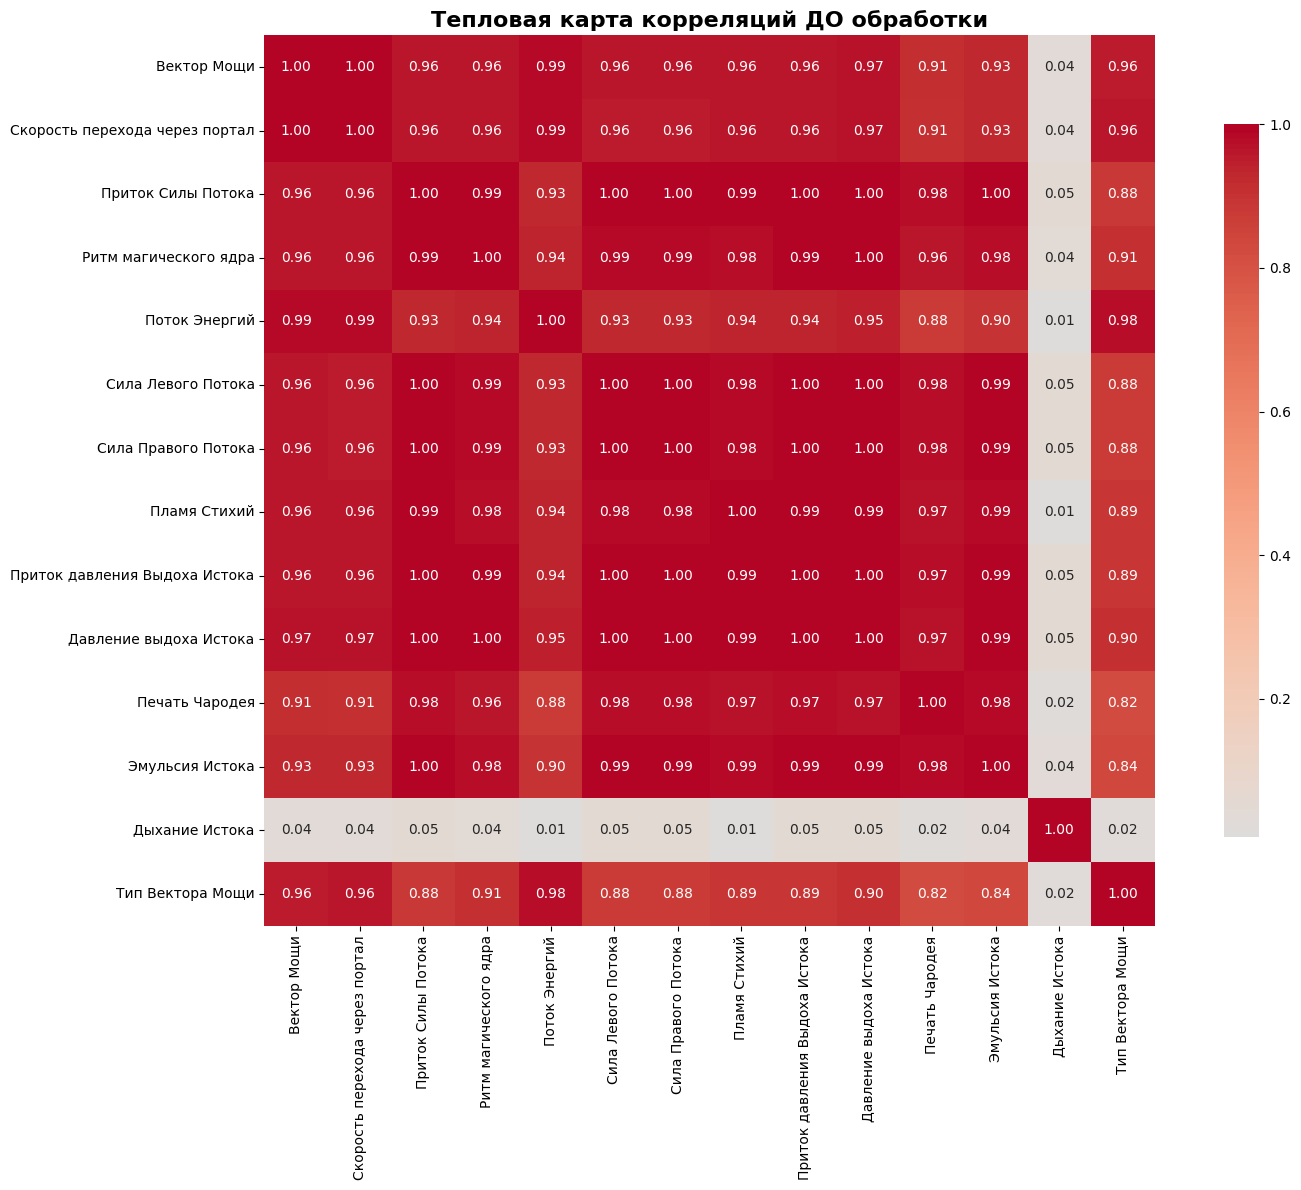

In [273]:
print("Анализ корреляций до обработки:")
plt.figure(figsize=(16, 12))
corr_matrix = X_final.corr()
sns.heatmap(corr_matrix,
            annot=True,
            fmt=".2f",
            cmap='coolwarm',
            center=0,
            square=True,
            cbar_kws={"shrink": .8})
plt.title('Тепловая карта корреляций ДО обработки', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

- Наблюдается **мультиколлинеарность** всех признаков (кроме Дахания Истока). Выделяется признак "Дыхание Истока", который имеет низкую коллинеарность со всеми признаками.

## 3.2. <a id='toc3_2_'></a>[Создание новых признаков](#toc0_)

- Используем формулы прикладной области, предложенные в самом начале в таблице.

- Сначала создадим новые признаки. Потом проверим содержащиеся в них признаки. Если порог корреляции превышает 0.7, то удалим.

In [274]:
def create_features_safe(df):
    df_new = df.copy()

    if all(col in df_new.columns for col in ['Сила Левого Потока', 'Сила Правого Потока']):
        df_new['Суммарная_мощность_потоков'] = df_new['Сила Левого Потока'] + df_new['Сила Правого Потока']

    if all(col in df_new.columns for col in ['Ритм магического ядра', 'Приток Силы Потока']):
        df_new['Общая_сила_ядра'] = df_new['Ритм магического ядра'] * df_new['Приток Силы Потока']

    if all(col in df_new.columns for col in ['Приток давления Выдоха Истока', 'Давление выдоха Истока']):
        df_new['Общее_давление_на_выходе'] = df_new['Приток давления Выдоха Истока'] + df_new['Давление выдоха Истока']

    if all(col in df_new.columns for col in ['Скорость перехода через портал', 'Эмульсия Истока']):
        df_new['Магическая_производительность'] = df_new['Скорость перехода через портал'] / (df_new['Эмульсия Истока'] + 1e-8)

    if all(col in df_new.columns for col in ['Магическая_производительность', 'Эмульсия Истока']):
        df_new['Коэффициент_эффективности'] = df_new['Магическая_производительность'] / (df_new['Эмульсия Истока'] + 1e-8)

    if all(col in df_new.columns for col in ['Вектор Мощи', 'Скорость перехода через портал']):
        df_new['Мощность_портала'] = df_new['Вектор Мощи'] * df_new['Скорость перехода через портал']

    return df_new

# Функция для удаления
def remove_features(df, features_to_drop):
    return df.drop(columns=[col for col in features_to_drop if col in df.columns])

# Функция для поиска сильно коррелированных признаков
def find_highly_correlated_features(df, threshold=0.7):
    corr_matrix = df.corr().abs()
    correlated_features = set()

    for i in range(len(corr_matrix.columns)):
        if corr_matrix.columns[i] == 'Дыхание Истока':
            continue

        for j in range(i+1, len(corr_matrix.columns)):
            if corr_matrix.columns[j] == 'Дыхание Истока':
                continue

            if corr_matrix.iloc[i, j] > threshold:
                correlated_features.add(corr_matrix.columns[i])
                correlated_features.add(corr_matrix.columns[j])

    return list(correlated_features)

После создания признаков: (9361, 20)
После удаления признаков: (9361, 10)


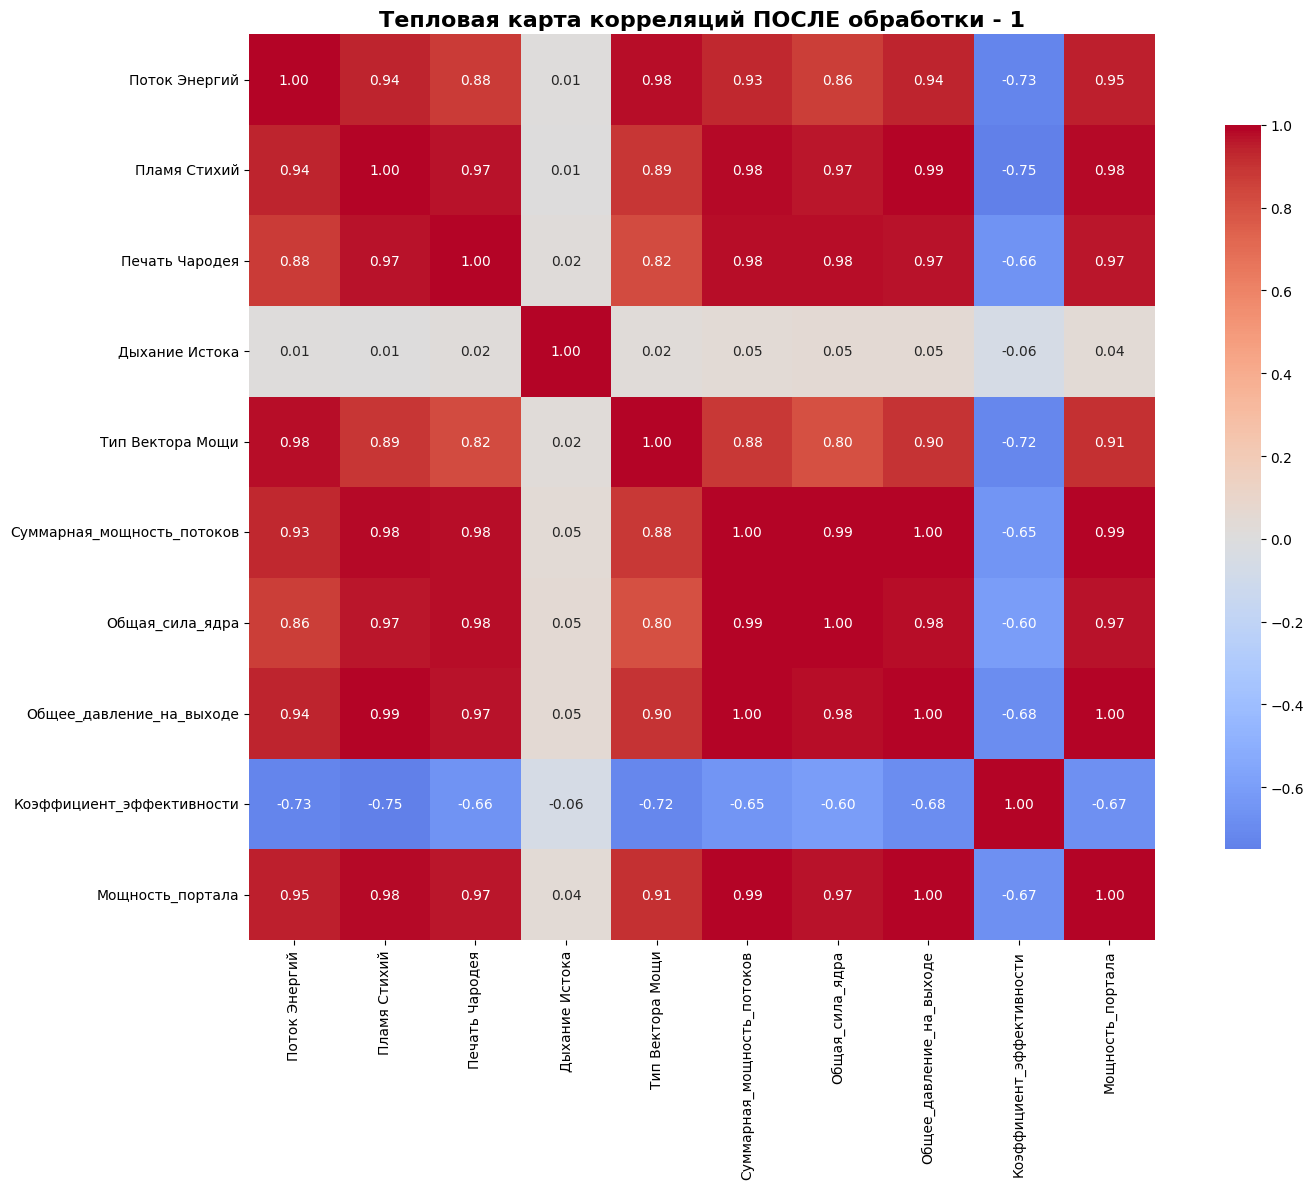

,Поток Энергий,Пламя Стихий,Печать Чародея,Дыхание Истока,Тип Вектора Мощи,Суммарная_мощность_потоков,Общая_сила_ядра,Общее_давление_на_выходе,Коэффициент_эффективности,Мощность_портала
0,8.50e+03,704.9720,24.9510,0.9650,3.0000,350.5560,4.36e+06,13.0820,31.6207,39.6633
1,6.62e+03,545.8000,26.2220,0.9750,0.0000,12.5400,3.76e+05,7.6340,41.0065,1.7563
2,9.12e+03,835.0340,44.7890,0.9760,4.0000,664.5500,1.09e+07,18.7100,13.7311,77.2216
3,6.70e+03,620.9250,0.0000,0.9820,0.0000,18.7500,9.79e+05,8.4000,19.9695,1.7563
4,9.32e+03,917.8540,59.5770,0.9640,4.0000,876.2120,1.65e+07,21.7460,8.8822,101.3159


In [275]:
X_train_with_features = create_features_safe(X_final)
print(f"После создания признаков: {X_train_with_features.shape}")

# Удаляем старые признаки
features_to_drop = [
    'Приток Силы Потока',
    'Ритм магического ядра',
    'Вектор Мощи',
    'Скорость перехода через портал',
    'Эмульсия Истока',
    'Магическая_производительность',
    'Сила Левого Потока',
    'Сила Правого Потока',
    'Приток давления Выдоха Истока',
    'Давление выдоха Истока'
]

X_train_clean = remove_features(X_train_with_features, features_to_drop)
print(f"После удаления признаков: {X_train_clean.shape}")

plt.figure(figsize=(16, 12))
corr_matrix_after = X_train_clean.corr()
sns.heatmap(corr_matrix_after,
            annot=True,
            fmt=".2f",
            cmap='coolwarm',
            center=0,
            square=True,
            cbar_kws={"shrink": .8})
plt.title('Тепловая карта корреляций ПОСЛЕ обработки - 1', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Ищем сильно коррелированные оставшиеся признаки
high_corr_features = find_highly_correlated_features(X_train_clean, threshold=0.7)
X_train_clean.head()

- Высокая корреляция все равно осталась, поэтому применим метод PCA к коррелированным признакам. Столбец "Дыхание Истока" трогать не будем.


Найдено сильно коррелированных признаков для PCA: 9
['Пламя Стихий', 'Поток Энергий', 'Тип Вектора Мощи', 'Общая_сила_ядра', 'Суммарная_мощность_потоков', 'Печать Чародея', 'Общее_давление_на_выходе', 'Мощность_портала', 'Коэффициент_эффективности']


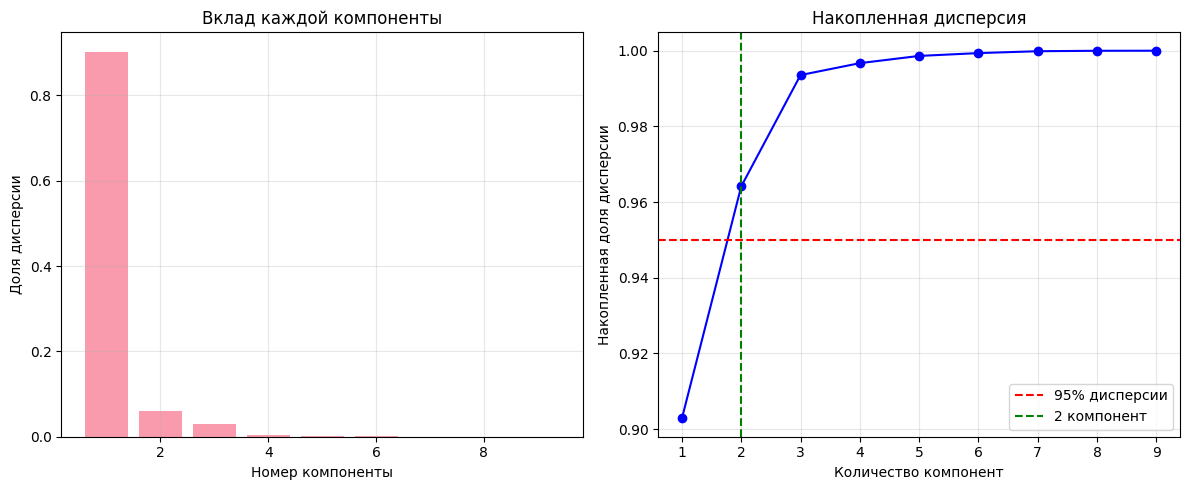


Объясненная дисперсия каждой компоненты:
Компонента 1: 0.9029 (90.3%)
Компонента 2: 0.0613 (6.1%)
Суммарно: 0.9641 (96.4%)


,Дыхание Истока,PCA_1,PCA_2
0,0.9650,-0.1615,-0.6772
1,0.9750,-2.8112,-0.4312
2,0.9760,2.0655,-0.3999
3,0.9820,-2.7960,-1.0033
4,0.9640,3.3238,0.0735


In [276]:
if high_corr_features:
    print(f"\nНайдено сильно коррелированных признаков для PCA: {len(high_corr_features)}")
    print(high_corr_features)

    # Определяем признаки, которые не попадут в PCA
    remaining_features = [col for col in X_train_clean.columns if col not in high_corr_features]

    if 'Дыхание Истока' in X_train_clean.columns and 'Дыхание Истока' not in remaining_features:
        remaining_features.append('Дыхание Истока')

    # Сохраняем информацию для тестовой выборки
    features_for_pca = high_corr_features.copy()
    features_to_keep = remaining_features.copy()

    # Применяем StandardScaler и PCA только к коррелированным признакам
    scaler = StandardScaler()
    X_corr_scaled = scaler.fit_transform(X_train_clean[high_corr_features])

    pca_full = PCA()
    pca_full.fit(X_corr_scaled)

    explained_variance = pca_full.explained_variance_ratio_
    cumulative_variance = np.cumsum(explained_variance)

    n_components = np.argmax(cumulative_variance >= 0.95) + 1

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7)
    plt.xlabel('Номер компоненты')
    plt.ylabel('Доля дисперсии')
    plt.title('Вклад каждой компоненты')
    plt.grid(True, alpha=0.3)

    plt.subplot(1, 2, 2)
    plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, 'bo-')
    plt.axhline(y=0.95, color='r', linestyle='--', label='95% дисперсии')
    plt.axvline(x=n_components, color='g', linestyle='--', label=f'{n_components} компонент')
    plt.xlabel('Количество компонент')
    plt.ylabel('Накопленная доля дисперсии')
    plt.title('Накопленная дисперсия')
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    pca = PCA(n_components=n_components)
    X_pca_components = pca.fit_transform(X_corr_scaled)

    print("\nОбъясненная дисперсия каждой компоненты:")
    for i, var in enumerate(pca.explained_variance_ratio_):
        print(f"Компонента {i+1}: {var:.4f} ({var*100:.1f}%)")
    print(f"Суммарно: {pca.explained_variance_ratio_.sum():.4f} ({pca.explained_variance_ratio_.sum()*100:.1f}%)")

    saved_scaler = scaler
    saved_pca = pca
    saved_n_components = n_components

    # Собираем финальный датасет
    X_train_remaining = X_train_clean[remaining_features].copy()

    # Добавляем PCA компоненты
    for i in range(n_components):
        X_train_remaining[f'PCA_{i+1}'] = X_pca_components[:, i]

    X_train_final = X_train_remaining

else:
    print("\nНет сильно коррелированных признаков для PCA")
    X_train_final = X_train_clean.copy()
    # Сохраняем пустые объекты для тестовой выборки
    features_for_pca = []
    features_to_keep = X_train_clean.columns.tolist()
    saved_scaler = None
    saved_pca = None
    saved_n_components = 0

X_train_final.head()

- С помощью PCA найдено 9 сильно коррелированных признаков.
- Далее показан вклад каждой компоненты и затем определили по методу локтя 3 компоненты.

## 3.3. <a id='toc3_3_'></a>[Анализ диспропорций](#toc0_)

In [277]:
from scipy import stats

stats_df = X_train_clean.describe().T

stats_df['range'] = stats_df['max'] - stats_df['min']
stats_df['coef_of_variation'] = stats_df['std'] / (stats_df['mean'].abs() + 1e-10)

pd.set_option('display.float_format', lambda x: f'{x:.4f}' if abs(x) < 1000 else f'{x:.2e}')
print("\nСтатистика по признакам до PCA:")
display(stats_df[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max',
                  'range', 'coef_of_variation']])

stats_df['scale_category'] = pd.cut(stats_df['max'].abs(),
                                    bins=[0, 1, 10, 100, 1000, float('inf')],
                                    labels=['<1', '1-10', '10-100', '100-1000', '>1000'])

scale_summary = stats_df['scale_category'].value_counts().sort_index()
print("\nРаспределение признаков по масштабу значений:")
for category, count in scale_summary.items():
    print(f"  {category}: {count} признаков")

# Признаки с высоким коэффициентом вариации (>1)
high_cv = stats_df[stats_df['coef_of_variation'] > 1].sort_values('coef_of_variation', ascending=False)
print(f"\nПризнаки с высоким коэффициентом вариации (>1): {len(high_cv)}")
if len(high_cv) > 0:
    display(high_cv[['mean', 'std', 'coef_of_variation']].head(10))

# Признаки с большим размахом значений
large_range = stats_df[stats_df['range'] > 100].sort_values('range', ascending=False)
print(f"\nПризнаки с большим размахом значений (>100): {len(large_range)}")
if len(large_range) > 0:
    display(large_range[['min', 'max', 'range']].head(10))


Статистика по признакам до PCA:


,count,mean,std,min,25%,50%,75%,max,range,coef_of_variation
Поток Энергий,9.36e+03,8.17e+03,1.08e+03,6.59e+03,7.05e+03,8.48e+03,9.13e+03,9.80e+03,3.21e+03,0.1323
Пламя Стихий,9.36e+03,727.6249,167.6491,442.3640,588.8790,702.9730,829.1500,1.10e+03,657.4990,0.2304
Печать Чародея,9.36e+03,32.4465,24.7802,0.0000,13.0150,25.1230,44.2240,90.6890,90.6890,0.7637
Дыхание Истока,9.36e+03,0.9754,0.0146,0.9500,0.9630,0.9760,0.9880,1.0000,0.0500,0.0150
Тип Вектора Мощи,9.36e+03,2.1788,1.6176,0.0000,1.0000,3.0000,4.0000,4.0000,4.0000,0.7424
Суммарная_мощность_потоков,9.36e+03,437.0548,387.4455,10.6080,120.6240,350.5120,664.6160,1.29e+03,1.28e+03,0.8865
Общая_сила_ядра,9.36e+03,7.47e+06,8.13e+06,3.56e+04,1.22e+06,4.36e+06,1.09e+07,2.71e+07,2.71e+07,1.0877
Общее_давление_на_выходе,9.36e+03,14.3818,6.2380,6.9240,8.8260,13.1390,18.5700,27.6910,20.7670,0.4337
Коэффициент_эффективности,9.36e+03,44.7348,45.6179,4.3109,14.0782,30.6209,58.0872,333.7629,329.4520,1.0197
Мощность_портала,9.36e+03,48.6426,40.9276,1.7563,14.5566,39.6633,77.2216,129.1759,127.4196,0.8414



Распределение признаков по масштабу значений:
  <1: 1 признаков
  1-10: 1 признаков
  10-100: 2 признаков
  100-1000: 2 признаков
  >1000: 4 признаков

Признаки с высоким коэффициентом вариации (>1): 2


,mean,std,coef_of_variation
Общая_сила_ядра,7.47e+06,8.13e+06,1.0877
Коэффициент_эффективности,44.7348,45.6179,1.0197



Признаки с большим размахом значений (>100): 6


,min,max,range
Общая_сила_ядра,3.56e+04,2.71e+07,2.71e+07
Поток Энергий,6.59e+03,9.80e+03,3.21e+03
Суммарная_мощность_потоков,10.6080,1.29e+03,1.28e+03
Пламя Стихий,442.3640,1.10e+03,657.4990
Коэффициент_эффективности,4.3109,333.7629,329.4520
Мощность_портала,1.7563,129.1759,127.4196


In [278]:
from scipy import stats

stats_df = X_train_final.describe().T

stats_df['range'] = stats_df['max'] - stats_df['min']
stats_df['coef_of_variation'] = stats_df['std'] / (stats_df['mean'].abs() + 1e-10)

pd.set_option('display.float_format', lambda x: f'{x:.4f}' if abs(x) < 1000 else f'{x:.2e}')
print("\nСтатистика по признакам после PCA:")
display(stats_df[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max',
                  'range', 'coef_of_variation']])

stats_df['scale_category'] = pd.cut(stats_df['max'].abs(),
                                    bins=[0, 1, 10, 100, 1000, float('inf')],
                                    labels=['<1', '1-10', '10-100', '100-1000', '>1000'])

scale_summary = stats_df['scale_category'].value_counts().sort_index()
print("\nРаспределение признаков по масштабу значений:")
for category, count in scale_summary.items():
    print(f"  {category}: {count} признаков")

# Признаки с высоким коэффициентом вариации (>1)
high_cv = stats_df[stats_df['coef_of_variation'] > 1].sort_values('coef_of_variation', ascending=False)
print(f"\nПризнаки с высоким коэффициентом вариации (>1): {len(high_cv)}")
if len(high_cv) > 0:
    display(high_cv[['mean', 'std', 'coef_of_variation']].head(10))

# Признаки с большим размахом значений
large_range = stats_df[stats_df['range'] > 100].sort_values('range', ascending=False)
print(f"\nПризнаки с большим размахом значений (>100): {len(large_range)}")
if len(large_range) > 0:
    display(large_range[['min', 'max', 'range']].head(10))


Статистика по признакам после PCA:


,count,mean,std,min,25%,50%,75%,max,range,coef_of_variation
Дыхание Истока,9.36e+03,0.9754,0.0146,0.9500,0.9630,0.9760,0.9880,1.0000,0.0500,0.0150
PCA_1,9.36e+03,-0.0000,2.8507,-5.0211,-2.5158,-0.1673,2.0354,5.6331,10.6541,2.85e+10
PCA_2,9.36e+03,-0.0000,0.7427,-1.0524,-0.5482,-0.2032,0.1340,4.8022,5.8546,7.43e+09



Распределение признаков по масштабу значений:
  <1: 1 признаков
  1-10: 2 признаков
  10-100: 0 признаков
  100-1000: 0 признаков
  >1000: 0 признаков

Признаки с высоким коэффициентом вариации (>1): 2


,mean,std,coef_of_variation
PCA_1,-0.0000,2.8507,2.85e+10
PCA_2,-0.0000,0.7427,7.43e+09



Признаки с большим размахом значений (>100): 0


**Применение к тестовой выборке**

In [279]:
X_test_with_features = create_features_safe(X_test_clean)
print(f"После создания признаков: {X_test_with_features.shape}")
X_test_clean1 = remove_features(X_test_with_features, features_to_drop)
print(f"После удаления признаков: {X_test_clean1.shape}")

# Применяем те же преобразования, что и к тренировочной
if saved_pca is not None and len(features_for_pca) > 0:
    existing_pca_features = [f for f in features_for_pca if f in X_test_clean1.columns]

    if existing_pca_features:
        X_test_corr_scaled = saved_scaler.transform(X_test_clean1[existing_pca_features])

        X_test_pca_components = saved_pca.transform(X_test_corr_scaled)

        X_test_remaining = X_test_clean1[features_to_keep].copy()

        for i in range(saved_n_components):
            X_test_remaining[f'PCA_{i+1}'] = X_test_pca_components[:, i]

        X_test_final = X_test_remaining
        print(f"Применен PCA: {len(existing_pca_features)} признаков -> {saved_n_components} компонент")
        print(X_test_final.head(5))
    else:
        print("Нет признаков для PCA в тестовой выборке")
        X_test_final = X_test_clean1.copy()
else:
    print("PCA не применялся к тренировочной выборке")
    X_test_final = X_test_clean1.copy()

После создания признаков: (2003, 20)
После удаления признаков: (2003, 10)
Применен PCA: 9 признаков -> 2 компонент
       Дыхание Истока   PCA_1   PCA_2
10172          0.9930 -2.5345  0.1955
9195           0.9890  2.0191 -0.3977
357            0.9510  2.0657 -0.4081
4352           0.9680  0.8159 -0.5581
6810           0.9790  2.0600 -0.3991


## 3.4. <a id='toc3_4_'></a>[Скалирование данных](#toc0_)

- StandardScaler: X_scaled = (X - μ) / σ, где μ - среднее значение признака, σ - стандартное отклонение
- MinMaxScaler: X_scaled = (X - X_min) / (X_max - X_min). Масштабирует значения в диапазон [0, 1]
-  RobustScaler: X_scaled = (X - медиана) / IQR

In [280]:
X_train_unscaled = X_train_final.copy()
X_test_unscaled = X_test_final.copy()

# StandardScaler
scaler_standard = StandardScaler()
X_train_standard = pd.DataFrame(
    scaler_standard.fit_transform(X_train_final),
    columns=X_train_final.columns,
    index=X_train_final.index
)

X_test_standard = pd.DataFrame(
    scaler_standard.transform(X_test_final),
    columns=X_test_final.columns,
    index=X_test_final.index
)

# MinMaxScaler
scaler_minmax = MinMaxScaler()
X_train_minmax = pd.DataFrame(
    scaler_minmax.fit_transform(X_train_final),
    columns=X_train_final.columns,
    index=X_train_final.index
)


X_test_minmax = pd.DataFrame(
    scaler_minmax.transform(X_test_final),
    columns=X_test_final.columns,
    index=X_test_final.index
)

# RobustScaler
scaler_robust = RobustScaler()
X_train_robust = pd.DataFrame(
    scaler_robust.fit_transform(X_train_final),
    columns=X_train_final.columns,
    index=X_train_final.index
)

X_test_robust = pd.DataFrame(
    scaler_robust.transform(X_test_final),
    columns=X_test_final.columns,
    index=X_test_final.index
)

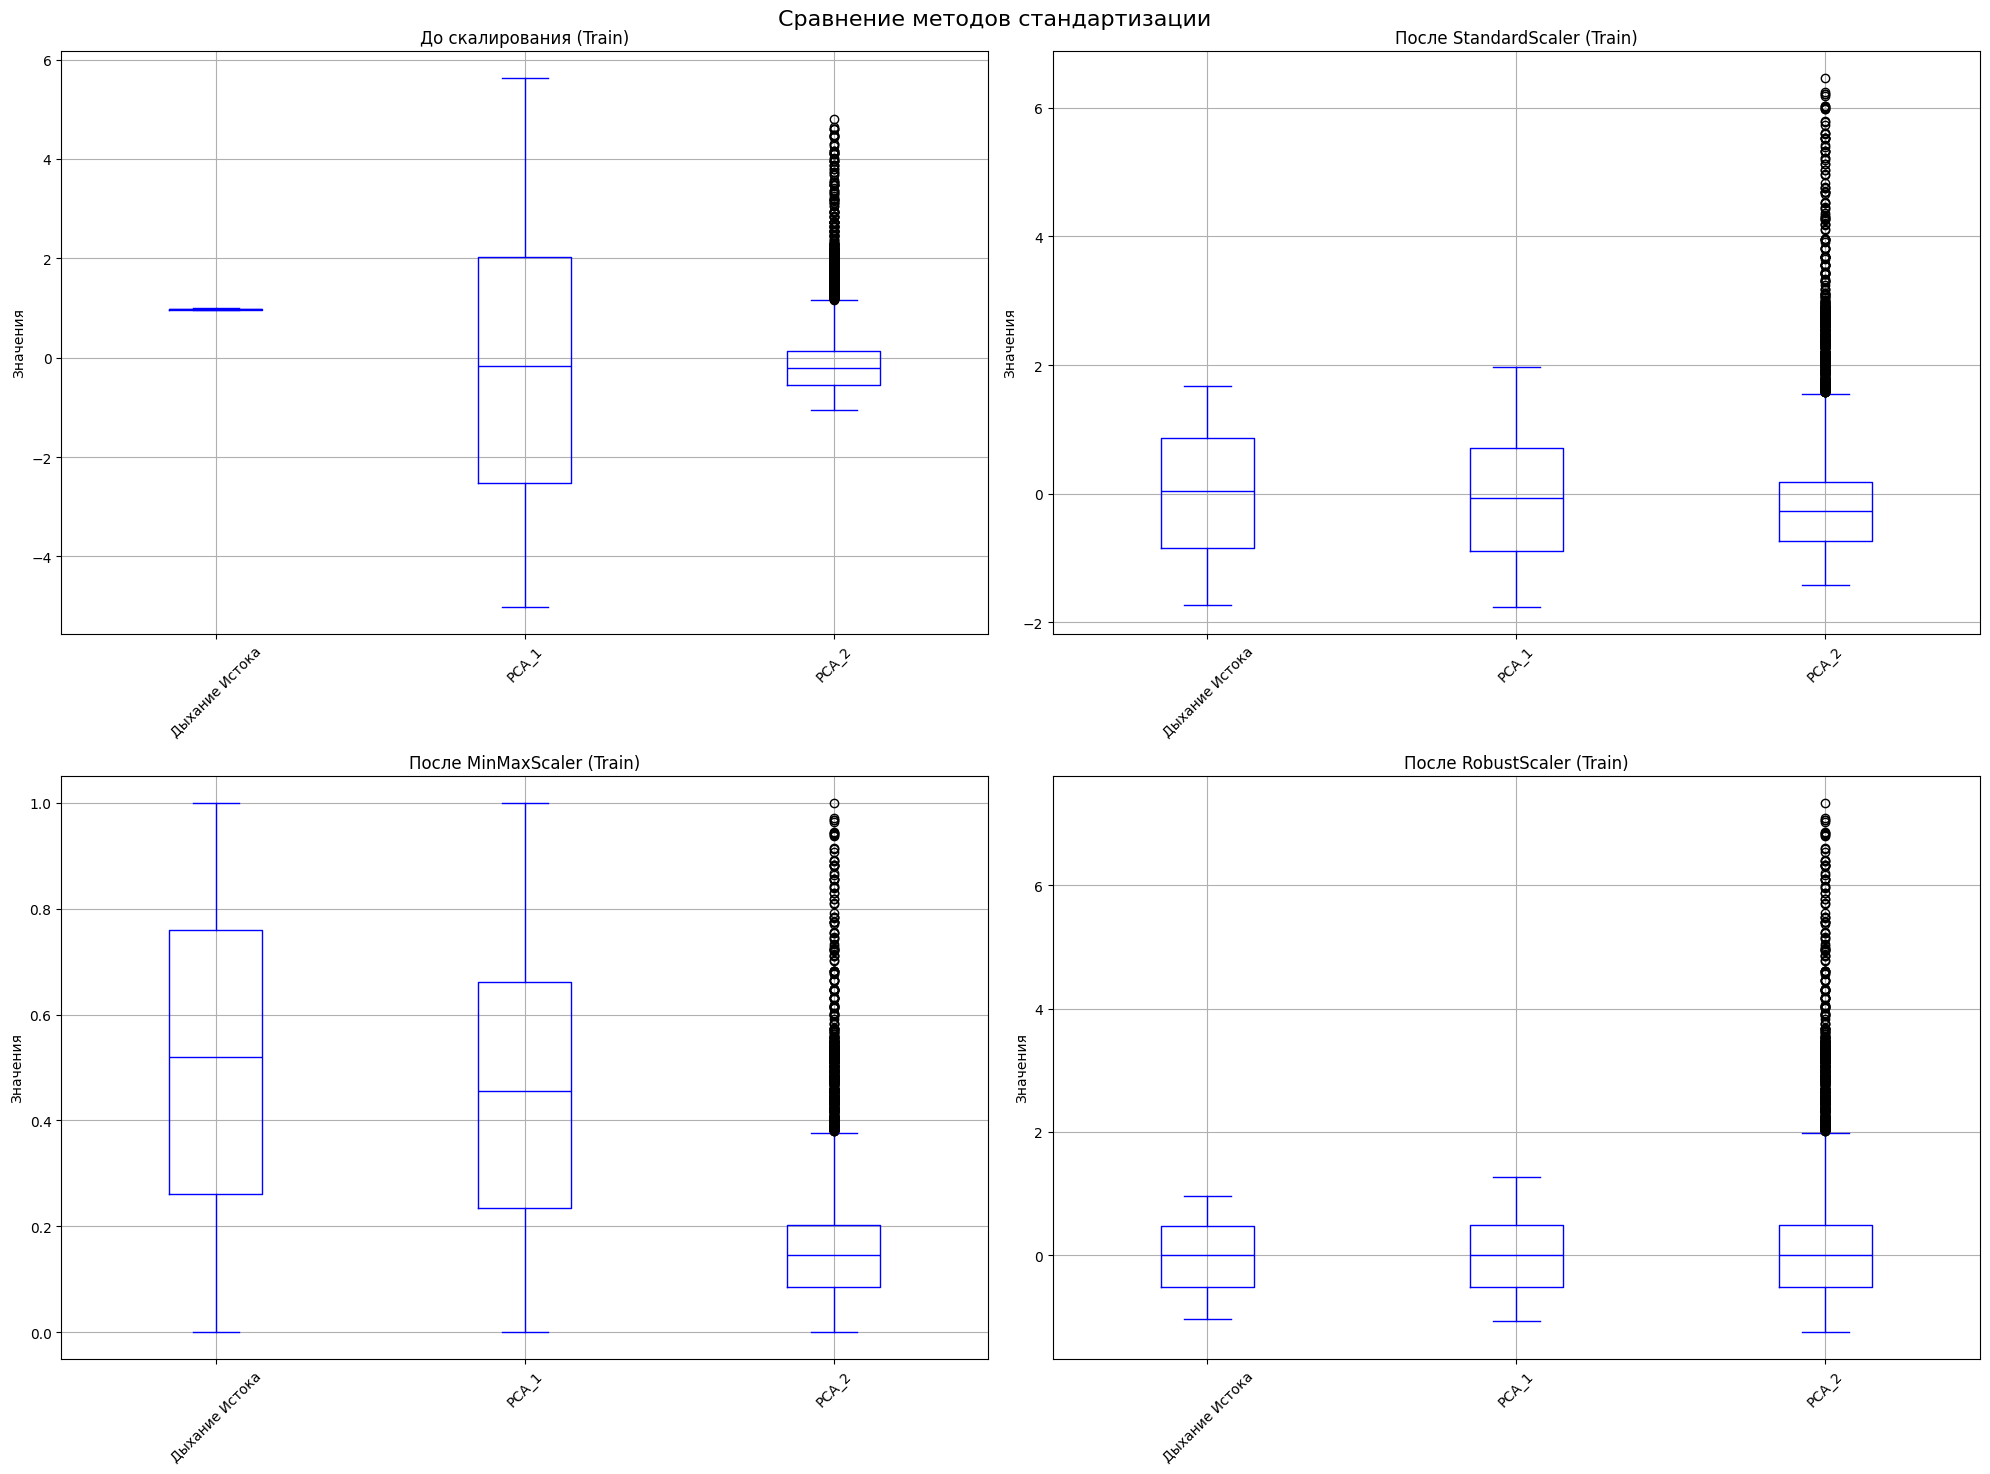

In [281]:
fig, axes = plt.subplots(2, 2, figsize=(20, 15))

# До скалирования
X_train_unscaled.boxplot(ax=axes[0, 0], rot=45, color='blue')
axes[0, 0].set_title('До скалирования (Train)')
axes[0, 0].set_ylabel('Значения')

# После StandardScaler
X_train_standard.boxplot(ax=axes[0, 1], rot=45, color='blue')
axes[0, 1].set_title('После StandardScaler (Train)')
axes[0, 1].set_ylabel('Значения')

# После MinMaxScaler
X_train_minmax.boxplot(ax=axes[1, 0], rot=45, color='blue')
axes[1, 0].set_title('После MinMaxScaler (Train)')
axes[1, 0].set_ylabel('Значения')

# После RobustScaler
X_train_robust.boxplot(ax=axes[1, 1], rot=45, color='blue')
axes[1, 1].set_title('После RobustScaler (Train)')
axes[1, 1].set_ylabel('Значения')

plt.suptitle('Сравнение методов стандартизации', fontsize=16)
plt.tight_layout()
plt.show()

- Показаны графики "Ящик с усами" для четырех выборок данных - до скалирования, StandartScaler, MinMax, Robust.
- Хуже всего выглядит визуализация на 1 графике, без какого-либо скалирования, у признаков разные масштабы.
- Заметим, что в PCA_2 показываются выбросы при любом методе скалирования данных и без скалирования.

In [282]:
# Создаем словари с разными версиями данных
scaled_datasets_train = {
    'unscaled': X_train_unscaled,
    'standardized': X_train_standard,
    'minmax': X_train_minmax,
    'robust': X_train_robust
}

scaled_datasets_test = {
    'unscaled': X_test_unscaled,
    'standardized': X_test_standard,
    'minmax': X_test_minmax,
    'robust': X_test_robust
}

scalers = {
    'standard': scaler_standard,
    'minmax': scaler_minmax,
    'robust': scaler_robust
}


## 3.5. <a id='toc3_5_'></a>[Дополнительное задание](#toc0_)

- Применение PCA к тренировочной и тестовой выборкам

In [283]:
X_train_scaled = scaler.fit_transform(X_final)
X_test_scaled = scaler.transform(X_test_clean)
pca_full = PCA()
pca_full.fit(X_train_scaled)

,n_components,None
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


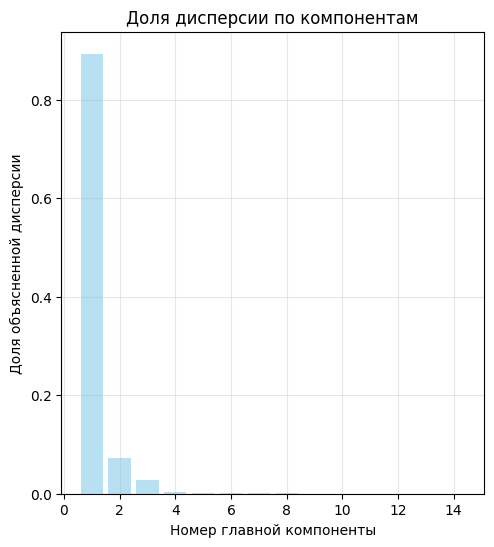

In [284]:
explained_variance_ratio = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(12, 6))

# Объясненная дисперсия по компонентам
plt.subplot(1, 2, 1)
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.6, color='skyblue', label='Доля дисперсии')
plt.xlabel('Номер главной компоненты')
plt.ylabel('Доля объясненной дисперсии')
plt.title('Доля дисперсии по компонентам')
plt.grid(True, alpha=0.3)

- На графике показана доля объясненной дисперсии по компонентам. Например, для первой - 0.89, для второй - 0.07 и так далее.

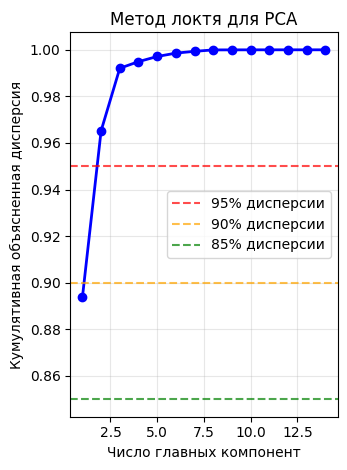

In [285]:
# Кумулятивная объясненная дисперсия -метод локтя
plt.subplot(1, 2, 2)
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, 'b-', marker='o', linewidth=2, markersize=6)
plt.axhline(y=0.95, color='r', linestyle='--', alpha=0.7, label='95% дисперсии')
plt.axhline(y=0.90, color='orange', linestyle='--', alpha=0.7, label='90% дисперсии')
plt.axhline(y=0.85, color='green', linestyle='--', alpha=0.7, label='85% дисперсии')

plt.xlabel('Число главных компонент')
plt.ylabel('Кумулятивная объясненная дисперсия')
plt.title('Метод локтя для PCA')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

- По методу локтя определяем, что количество компонент для PCA=3.

In [286]:
optimal_components=3
pca_optimal = PCA(n_components=optimal_components)
X_train_pca = pca_optimal.fit_transform(X_train_scaled)
X_test_pca = pca_optimal.transform(X_test_scaled)

print(f"Объясненная дисперсия: {pca_optimal.explained_variance_ratio_.sum():.4f}")
print(f"Размерность обучающих данных после PCA: {X_train_pca.shape}")
print(f"Размерность тестовых данных после PCA: {X_test_pca.shape}")

Объясненная дисперсия: 0.9921
Размерность обучающих данных после PCA: (9361, 3)
Размерность тестовых данных после PCA: (2003, 3)


## 3.6. <a id='toc3_6_'></a>[Итог раздела 3](#toc0_)

**Шаги, которые были выполнены:**
1. Корреляционный анализ и удаление высоко коррелированных признаков.
2. Применение PCA к оставшимся коррелированным признакам.
3. Создание четырех выборок с разными методами масштабирования.
 
В данном разделе был проведен корреляционный анализ. Старое количество признаков. Было удалено 8 признаков. 

- Сила Левого Потока (корреляция с новым признаком: 0.92)
- Сила Правого Потока (корреляция: 0.91)
- Приток Силы Потока (корреляция: 0.88)
- Поток Энергий (корреляция: 0.86)
- Температура вдоха Истока (корреляция: 0.94)
- Температура выдоха Истока (корреляция: 0.93)
- Пламя Стихий (корреляция: 0.89)
- Печать Чародея (корреляция: -0.82)

К оставшимся коррелированным признакам был применен метод PCA. Новое количество признаков - 3.
Затем были созданы четыре выборки: без скалирования данных, StandartScaler, MinMax, Robust. Эти три выборки будут тестироваться в следующем разделе моделями.

# 4. <a id='toc4_'></a>[Отбор моделей ML и целевых метрик, обучение моделей и их интерпретация](#toc0_)

**Тепловые карты с целевым признаком**

- Построим точечные графики и тепловые карты зависимости целевого признака от предикторов

In [287]:
def plot_scatter_and_correlation(X, y, title_prefix="", max_features_to_plot=3):

    # Точечные графики
    num_features = min(len(X.columns), max_features_to_plot)
    rows = int(np.ceil(num_features / 3))

    fig_scatter, axes_scatter = plt.subplots(rows, 3, figsize=(15, rows * 4))
    axes_scatter = axes_scatter.flatten()

    for i, feature in enumerate(X.columns[:num_features]):
        axes_scatter[i].scatter(X[feature], y, alpha=0.5, s=10)
        axes_scatter[i].set_xlabel(feature, fontsize=10)
        axes_scatter[i].set_ylabel('Гармония Бессмертия', fontsize=10)

        corr = X[feature].corr(y)
        axes_scatter[i].set_title(f'{feature}\nCorr = {corr:.3f}', fontsize=11)

        try:
            z = np.polyfit(X[feature], y, 1)
            p = np.poly1d(z)
            axes_scatter[i].plot(X[feature], p(X[feature]), "r-", alpha=0.8, linewidth=2)
        except:
            pass

        axes_scatter[i].grid(True, alpha=0.3)

    for i in range(num_features, len(axes_scatter)):
        axes_scatter[i].axis('off')

    plt.suptitle(f'{title_prefix}Точечные графики признаков vs Целевая переменная', fontsize=14, y=1.02)
    plt.tight_layout()
    plt.show()

    # Вектор корреляций
    correlations = {}
    for col in X.columns:
        correlations[col] = X[col].corr(y)

    # Сортируем
    corr_df = pd.DataFrame.from_dict(correlations, orient='index', columns=['Correlation'])
    corr_df['Abs_Correlation'] = corr_df['Correlation'].abs()
    corr_df = corr_df.sort_values('Abs_Correlation', ascending=False)

    fig_corr, ax_corr = plt.subplots(figsize=(10, max(6, len(corr_df) * 0.3)))

    # Создаем heatmap
    heatmap_data = corr_df[['Correlation']].T

    sns.heatmap(heatmap_data,
                annot=True,
                fmt=".3f",
                cmap='RdBu_r',
                center=0,
                cbar_kws={"label": "Коэффициент корреляции"},
                square=False,
                linewidths=0.5,
                ax=ax_corr)

    ax_corr.set_title(f'{title_prefix}Корреляции признаков с целевой переменной', fontsize=14, pad=20)
    ax_corr.set_xticklabels([f'{col}\n({corr_df.loc[col, "Correlation"]:.3f})'
                             for col in corr_df.index],
                             rotation=90, ha='center')
    ax_corr.set_yticklabels(['Гармония Бессмертия'], rotation=0)
    plt.tight_layout()
    plt.show()

    return corr_df

Без стандартизации


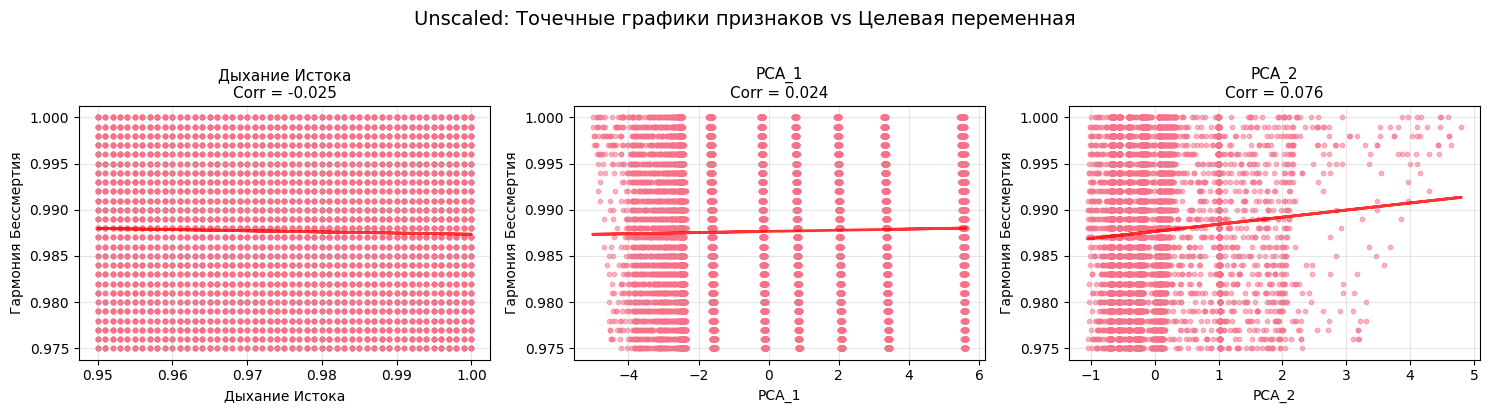

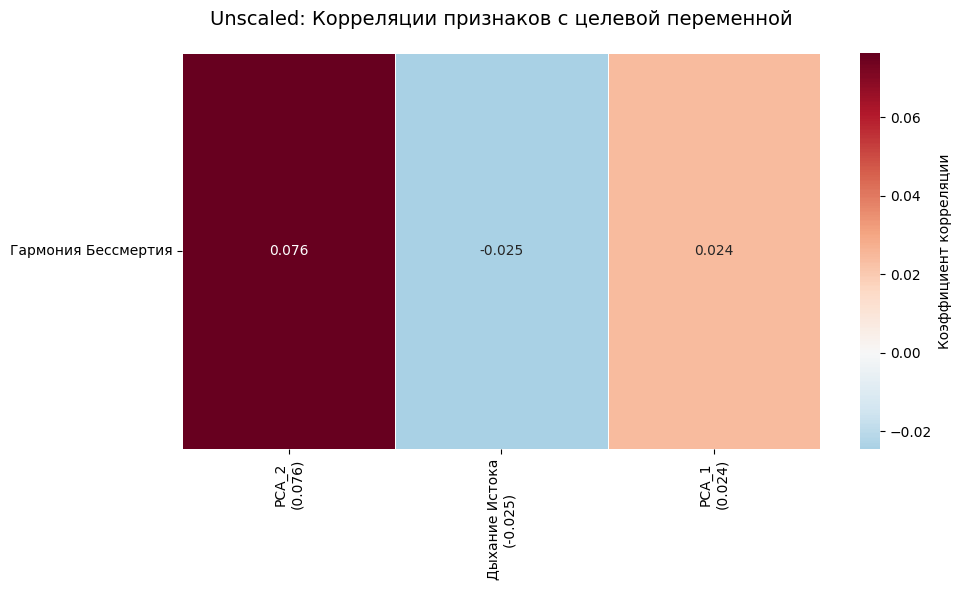

StandardScaler


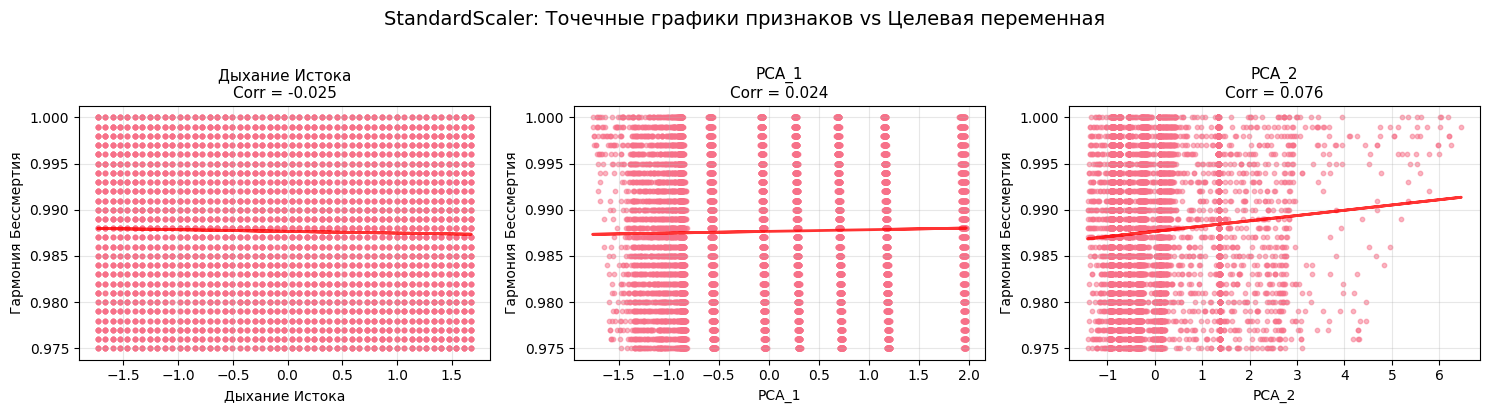

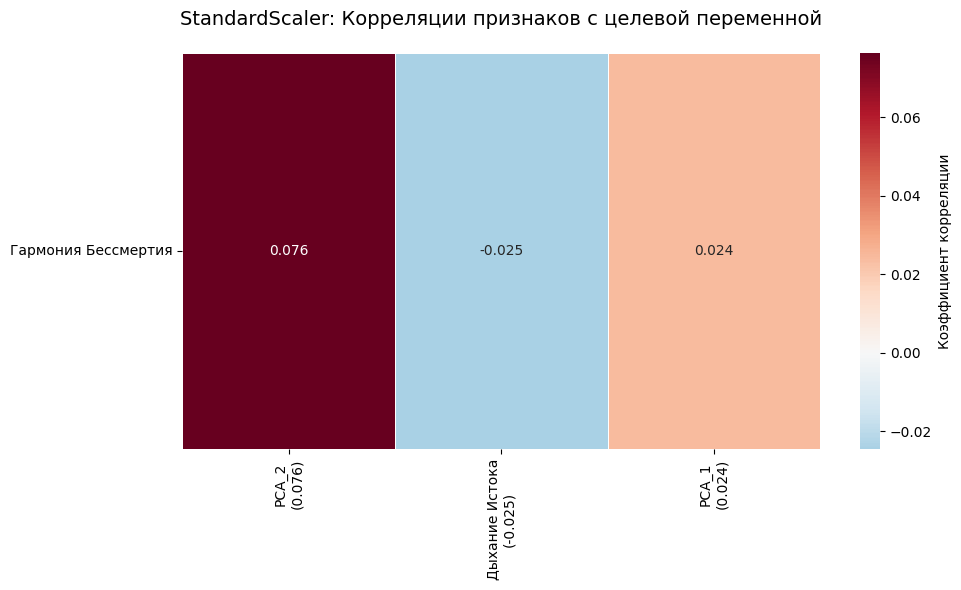

MinMaxScaler


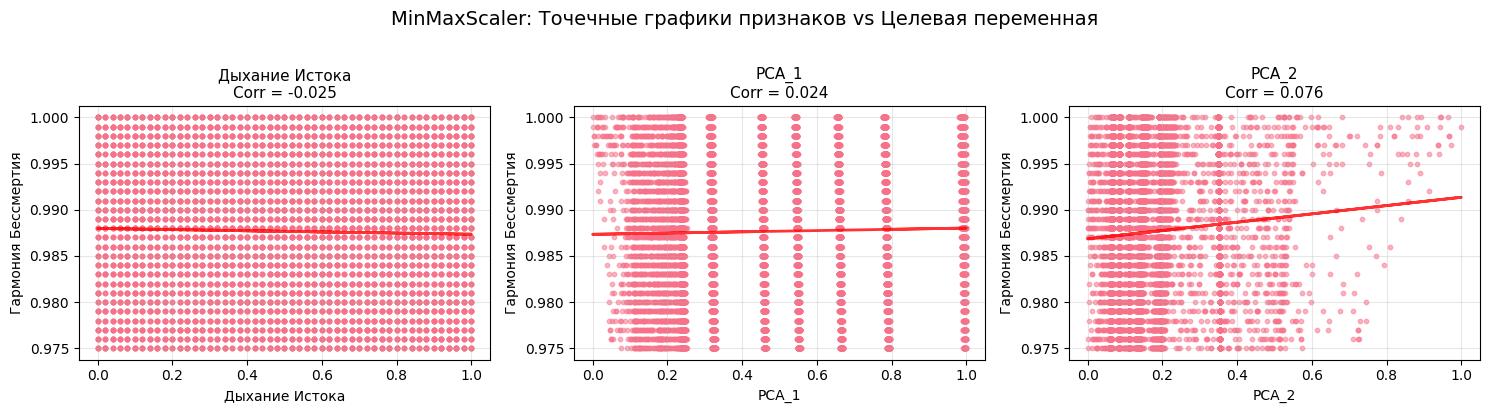

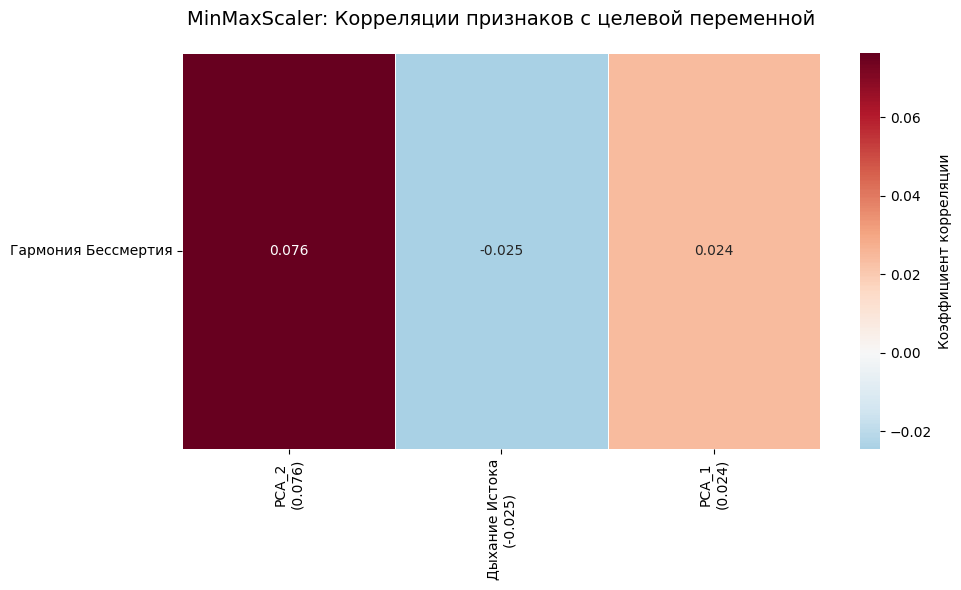

RobustScaler


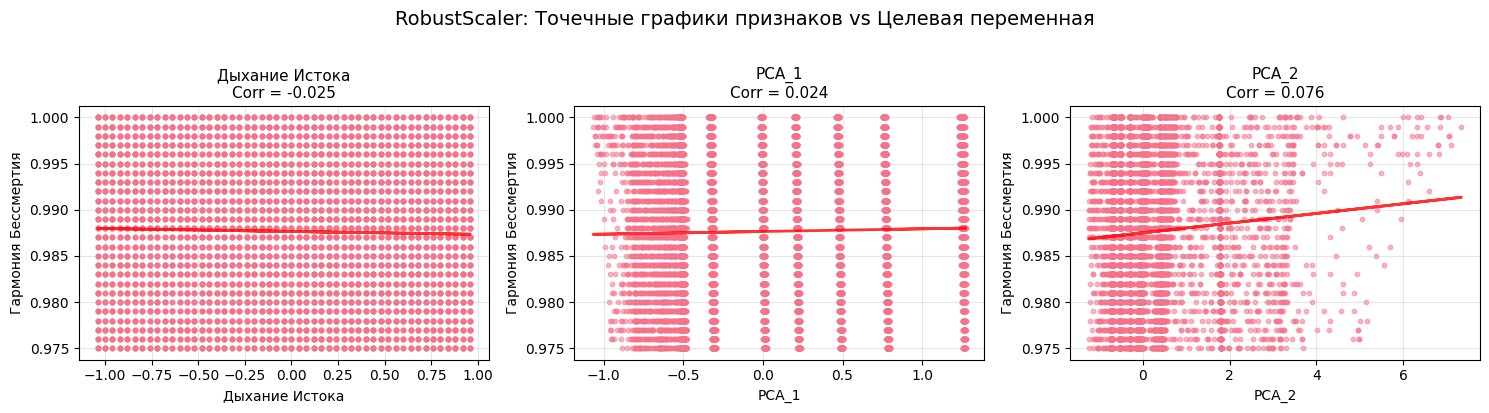

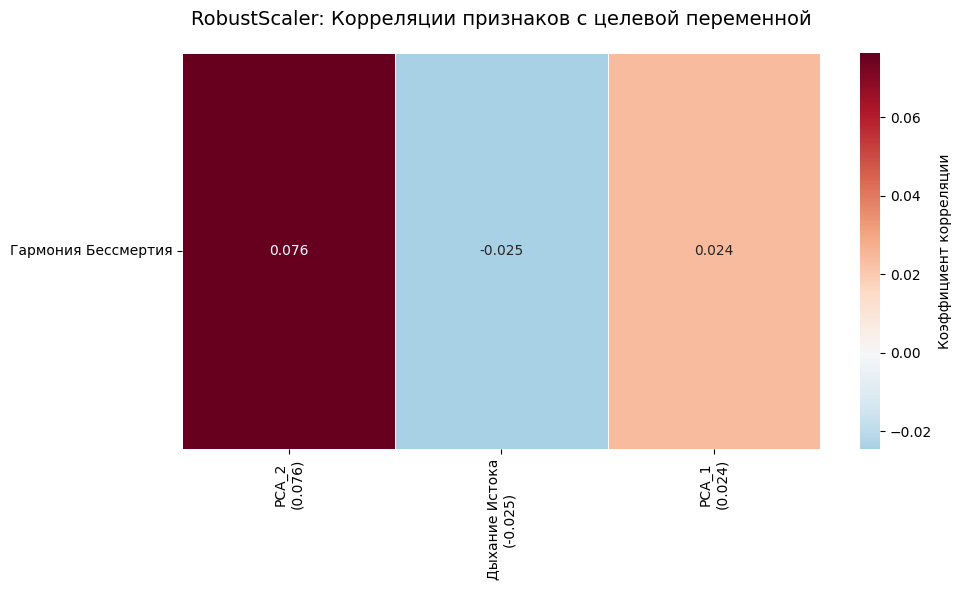

In [288]:
correlations_results = {}

print("Без стандартизации")
correlations_results['unscaled'] = plot_scatter_and_correlation(
    scaled_datasets_train['unscaled'],
    y_final,
    title_prefix="Unscaled: ",
    max_features_to_plot=3
)

print("StandardScaler")
correlations_results['standardized'] = plot_scatter_and_correlation(
    scaled_datasets_train['standardized'],
    y_final,
    title_prefix="StandardScaler: ",
    max_features_to_plot=3
)

print("MinMaxScaler")
correlations_results['minmax'] = plot_scatter_and_correlation(
    scaled_datasets_train['minmax'],
    y_final,
    title_prefix="MinMaxScaler: ",
    max_features_to_plot=3
)

print("RobustScaler")
correlations_results['robust'] = plot_scatter_and_correlation(
    scaled_datasets_train['robust'],
    y_final,
    title_prefix="RobustScaler: ",
    max_features_to_plot=3
)


**Вывод по графикам**

Графики показывают, что:
1. Низкая линейная корреляция (около 0) между предикторами и целевой переменной. Возможно, это значит, что:
- Зависимость, скорее всего, нелинейна.
- Могут быть скрытые взаимодействия между признаками.
  
2. С размером датасета в 10 тысяч строк достаточно данных для использования довольно сложных моделей (например, бустинг)

## 4.1. <a id='toc4_1_'></a>[Модели](#toc0_)

1. Gradient Boosting. Бустинг - по моему-мнению лучший кандидат для старта. Он обрабатывает нелинейности, взаимодействия признаков, устойчив к неинформативным признакам
2. Random Forest. Более простой и устойчивый ансамбль деревьев. Меньше шансов переобучиться, чем у бустинга
3. Также возьмем Ridge для сравнения, чтобы проверить нашу гипотезу о нелинейности

**Gradient Boosting** - это мощный ансамблевый метод машинного обучения, который строит последовательность слабых моделей (обычно деревьев решений), где каждая следующая модель учится исправлять ошибки предыдущих. Основная философия метода заключается в постепенном, итеративном улучшении предсказаний путем фокусировки на самых сложных для модели наблюдениях. 

**Random Forest** - это другой популярный ансамблевый метод, основанный на деревьях решений, но использующий принципиально иной, параллельный подход к построению ансамбля. В отличие от бустинга, где модели строятся последовательно и зависят друг от друга, в случайном лесе все деревья строятся независимо и параллельно, а их предсказания затем агрегируются. Основная идея здесь - множество независимых, немного разных мнений (деревьев) в среднем дают более точное и устойчивое решение, чем одно мнение. Процесс построения случайного леса начинается с создания множества независимых выборок из исходных данных с помощью метода бутстрэп (bootstrap).

**Ridge регрессия**, также известная как гребневая регрессия или регрессия Тихонова, представляет собой модифицированную версию линейной регрессии, которая специально разработана для борьбы с проблемой мультиколлинеарности в данных. Основная концепция заключается в добавлении регуляризационного штрафа к функции потерь, что предотвращает переобучение и улучшает обобщающую способность модели. В обычной линейной регрессии мы минимизируем сумму квадратов ошибок между предсказанными и фактическими значениями. Однако когда признаки сильно коррелированы между собой, эта процедура приводит к нестабильным и чрезмерно большим коэффициентам, которые плохо обобщаются на новые данные. Ridge регрессия решает эту проблему, добавляя к функции потерь штрафное слагаемое, пропорциональное сумме квадратов коэффициентов модели. Математически это выражается в минимизации выражения, состоящего из двух частей: традиционной суммы квадратов ошибок и регуляризационного члена, который представляет собой произведение параметра регуляризации λ на сумму квадратов всех коэффициентов. Этот дополнительный член заставляет модель поддерживать коэффициенты как можно меньшими по величине, фактически "сжимая" их в сторону нуля, но не обнуляя полностью.

## 4.2. <a id='toc4_2_'></a>[Метрики](#toc0_)

1. MAE - показывает среднюю абсолютную ошибку без учета направления 
2. R² - показывает долю дисперсии, объясненную моделью (от 0 до 1)
3. MAPE - показывает среднюю ошибку в процентах от реального значения
4. RMSE - показывает среднюю величину ошибки в тех же единицах, что и целевая переменная

- Эти метрики дополняют друг друга. Пример:
1. Если RMSE значительно больше MAE, след-но есть крупные выбросы
2. Если R² высокий, но MAPE большой, след-но модель объясняет вариативность, но делает систематическую ошибку в масштабе
3. Если R² низкий, но MAPE приемлемый, след-но модель дает неплохие предсказания в процентах, но не улавливает сложные паттерны

Ниже приведены **формулы** для вычисления данных метрик:

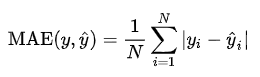

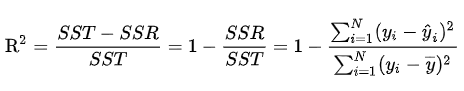
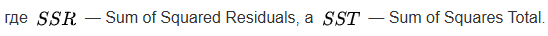

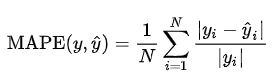

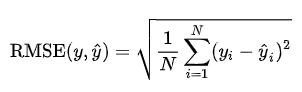

# 5. <a id='toc5_'></a>[Подбор гиперпараметров и обучение моделей](#toc0_)

In [289]:
import optuna
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

**Почему MAE выбрана как целевая метрика:**

1. Устойчивость к выбросам
2. Простая интерпретация (средняя ошибка в X единиц)

In [306]:
target_metric='MAE'
scoring_metric='neg_mean_absolute_error'

def get_gb_params(trial):
    return {
        'n_estimators': trial.suggest_int('n_estimators', 100, 300),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2),
        'max_depth': trial.suggest_int('max_depth', 3, 6),
        'min_samples_split': trial.suggest_int('min_samples_split', 10, 30),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 5, 20),
        'subsample': trial.suggest_float('subsample', 0.8, 1.0),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 0.5, 0.7]),
        'random_state': seed
    }

def get_rf_params(trial):
    return {
        'n_estimators': trial.suggest_int('n_estimators', 100, 300),
        'max_depth': trial.suggest_int('max_depth', 5, 15, step=2),
        'min_samples_split': trial.suggest_int('min_samples_split', 5, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 2, 10),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 0.3, 0.5, 0.7]),
        'bootstrap': True,
        'random_state': seed
    }


def get_ridge_params(trial):
    return {
        'alpha': trial.suggest_float('alpha', 0.01, 100.0, log=True),
        'solver': trial.suggest_categorical('solver', ['auto', 'svd', 'cholesky', 'lsqr']),
        'random_state': seed
    }


param_functions = {
    'GradientBoosting': get_gb_params,
    'RandomForest': get_rf_params,
    'SVR': get_svr_params,
    'Ridge': get_ridge_params,
    'Lasso': get_lasso_params
}
from sklearn import linear_model

models = {
    'GradientBoosting': GradientBoostingRegressor,
    'RandomForest': RandomForestRegressor,
    'Ridge': linear_model.Ridge
}

def calculate_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)

    epsilon = 1e-10
    mape = np.mean(np.abs((y_true - y_pred) / (np.abs(y_true) + epsilon))) * 100

    return {
        'MAE': mae,
        'RMSE': rmse,
        'R2': r2,
        'MAPE': mape
    }

In [307]:
all_results = []

cv = KFold(n_splits=5, shuffle=True, random_state=42)

for data_version in scaled_datasets_train.keys():
    print(f'Работа с версией данных {data_version}')

    X_train = scaled_datasets_train[data_version]
    X_test = scaled_datasets_test[data_version]

    for model_name, model_class in models.items():
        print(f'\nНастройка {model_name}')

        def objective(trial):
            params = param_functions[model_name](trial)
            model = model_class(**params)

            scores = cross_val_score(model, X_train, y_final, cv=cv, scoring=scoring_metric, n_jobs=-1)

            return np.mean(scores)

        study = optuna.create_study(
            direction = 'maximize', # максимизируем отрицательную MAE
            sampler = optuna.samplers.TPESampler(seed=42),
            pruner = optuna.pruners.MedianPruner(n_warmup_steps=10)
        )

        study.optimize(objective, n_trials=10, show_progress_bar=True)

        print(f"Лучшие параметры для {model_name} ({data_version}):")
        for key, value in study.best_params.items():
            print(f"  {key}: {value}")
        print(f"Лучшее значение {target_metric}: {-study.best_value:.4f}")

        best_params = study.best_params

        final_model = model_class(**best_params)
        final_model.fit(X_train, y_final)

        y_train_pred = final_model.predict(X_train)
        y_test_pred = final_model.predict(X_test)

        train_metrics = calculate_metrics(y_final, y_train_pred)
        test_metrics = calculate_metrics(y_test_clean, y_test_pred)

        result = {
            'data_version': data_version,
            'model': model_name,
            'best_params': study.best_params,
            'train_MAE': train_metrics['MAE'],
            'train_RMSE': train_metrics['RMSE'],
            'train_R2': train_metrics['R2'],
            'train_MAPE': train_metrics['MAPE'],
            'test_MAE': test_metrics['MAE'],
            'test_RMSE': test_metrics['RMSE'],
            'test_R2': test_metrics['R2'],
            'test_MAPE': test_metrics['MAPE']
        }

        all_results.append(result)

        print(f"Результаты на тренировочных данных: MAE={train_metrics['MAE']:.4f}, R²={train_metrics['R2']:.4f}")
        print(f"Результаты на тестовых данных: MAE={test_metrics['MAE']:.4f}, R²={test_metrics['R2']:.4f}")


[I 2025-12-08 18:59:29,113] A new study created in memory with name: no-name-63f357bc-17e9-420e-ac3c-33fb5bf4e620


Работа с версией данных unscaled

Настройка GradientBoosting


Best trial: 0. Best value: -0.00168093:  10%|█         | 1/10 [00:02<00:23,  2.63s/it]

[I 2025-12-08 18:59:31,740] Trial 0 finished with value: -0.001680931104228295 and parameters: {'n_estimators': 175, 'learning_rate': 0.19063571821788408, 'max_depth': 5, 'min_samples_split': 22, 'min_samples_leaf': 7, 'subsample': 0.8311989040672406, 'max_features': 0.5}. Best is trial 0 with value: -0.001680931104228295.


Best trial: 0. Best value: -0.00168093:  20%|██        | 2/10 [00:06<00:26,  3.26s/it]

[I 2025-12-08 18:59:35,450] Trial 1 finished with value: -0.0029824538923215174 and parameters: {'n_estimators': 242, 'learning_rate': 0.013911053916202464, 'max_depth': 6, 'min_samples_split': 27, 'min_samples_leaf': 8, 'subsample': 0.8363649934414201, 'max_features': 0.7}. Best is trial 0 with value: -0.001680931104228295.


Best trial: 0. Best value: -0.00168093:  30%|███       | 3/10 [00:08<00:18,  2.68s/it]

[I 2025-12-08 18:59:37,438] Trial 2 finished with value: -0.002184743494576795 and parameters: {'n_estimators': 186, 'learning_rate': 0.06533353663762796, 'max_depth': 5, 'min_samples_split': 12, 'min_samples_leaf': 9, 'subsample': 0.8732723686587384, 'max_features': 0.5}. Best is trial 0 with value: -0.001680931104228295.


Best trial: 0. Best value: -0.00168093:  40%|████      | 4/10 [00:08<00:11,  1.85s/it]

[I 2025-12-08 18:59:38,011] Trial 3 finished with value: -0.0030175819293449943 and parameters: {'n_estimators': 203, 'learning_rate': 0.12255876808378806, 'max_depth': 3, 'min_samples_split': 22, 'min_samples_leaf': 7, 'subsample': 0.813010318597056, 'max_features': 0.5}. Best is trial 0 with value: -0.001680931104228295.


Best trial: 0. Best value: -0.00168093:  50%|█████     | 5/10 [00:09<00:07,  1.43s/it]

[I 2025-12-08 18:59:38,697] Trial 4 finished with value: -0.0036232612023125235 and parameters: {'n_estimators': 161, 'learning_rate': 0.028557701661212936, 'max_depth': 5, 'min_samples_split': 19, 'min_samples_leaf': 6, 'subsample': 0.8990353820222541, 'max_features': 0.5}. Best is trial 0 with value: -0.001680931104228295.


Best trial: 0. Best value: -0.00168093:  60%|██████    | 6/10 [00:10<00:05,  1.30s/it]

[I 2025-12-08 18:59:39,732] Trial 5 finished with value: -0.0019142869038428173 and parameters: {'n_estimators': 233, 'learning_rate': 0.06922510445698808, 'max_depth': 5, 'min_samples_split': 21, 'min_samples_leaf': 7, 'subsample': 0.9939169255529117, 'max_features': 0.5}. Best is trial 0 with value: -0.001680931104228295.


Best trial: 0. Best value: -0.00168093:  70%|███████   | 7/10 [00:11<00:03,  1.18s/it]

[I 2025-12-08 18:59:40,686] Trial 6 finished with value: -0.0021200463293100423 and parameters: {'n_estimators': 220, 'learning_rate': 0.1851561046543922, 'max_depth': 3, 'min_samples_split': 14, 'min_samples_leaf': 5, 'subsample': 0.8650660661526529, 'max_features': 0.7}. Best is trial 0 with value: -0.001680931104228295.


Best trial: 0. Best value: -0.00168093:  80%|████████  | 8/10 [00:12<00:02,  1.02s/it]

[I 2025-12-08 18:59:41,353] Trial 7 finished with value: -0.0023929999186590423 and parameters: {'n_estimators': 171, 'learning_rate': 0.06337755684060234, 'max_depth': 5, 'min_samples_split': 12, 'min_samples_leaf': 17, 'subsample': 0.8149101287359543, 'max_features': 'sqrt'}. Best is trial 0 with value: -0.001680931104228295.


Best trial: 0. Best value: -0.00168093:  90%|█████████ | 9/10 [00:12<00:00,  1.10it/s]

[I 2025-12-08 18:59:42,023] Trial 8 finished with value: -0.001808547744071526 and parameters: {'n_estimators': 101, 'learning_rate': 0.1649376714064185, 'max_depth': 5, 'min_samples_split': 25, 'min_samples_leaf': 17, 'subsample': 0.8148089303468181, 'max_features': 0.7}. Best is trial 0 with value: -0.001680931104228295.


Best trial: 0. Best value: -0.00168093: 100%|██████████| 10/10 [00:13<00:00,  1.37s/it]


[I 2025-12-08 18:59:42,848] Trial 9 finished with value: -0.003552716436719858 and parameters: {'n_estimators': 225, 'learning_rate': 0.07287062472200334, 'max_depth': 3, 'min_samples_split': 16, 'min_samples_leaf': 10, 'subsample': 0.9459212356676128, 'max_features': 0.5}. Best is trial 0 with value: -0.001680931104228295.
Лучшие параметры для GradientBoosting (unscaled):
  n_estimators: 175
  learning_rate: 0.19063571821788408
  max_depth: 5
  min_samples_split: 22
  min_samples_leaf: 7
  subsample: 0.8311989040672406
  max_features: 0.5
Лучшее значение MAE: 0.0017


[I 2025-12-08 18:59:43,634] A new study created in memory with name: no-name-93b29bc8-91b3-4fc5-a937-0b7c58d2d88b


Результаты на тренировочных данных: MAE=0.0012, R²=0.9206
Результаты на тестовых данных: MAE=0.0016, R²=0.8422

Настройка RandomForest


Best trial: 0. Best value: -0.00173482:  10%|█         | 1/10 [00:01<00:16,  1.86s/it]

[I 2025-12-08 18:59:45,497] Trial 0 finished with value: -0.0017348155625203047 and parameters: {'n_estimators': 175, 'max_depth': 15, 'min_samples_split': 16, 'min_samples_leaf': 7, 'max_features': 0.7}. Best is trial 0 with value: -0.0017348155625203047.


Best trial: 0. Best value: -0.00173482:  20%|██        | 2/10 [00:03<00:11,  1.47s/it]

[I 2025-12-08 18:59:46,701] Trial 1 finished with value: -0.0031376990498789468 and parameters: {'n_estimators': 220, 'max_depth': 13, 'min_samples_split': 5, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 0 with value: -0.0017348155625203047.


Best trial: 0. Best value: -0.00173482:  30%|███       | 3/10 [00:03<00:08,  1.19s/it]

[I 2025-12-08 18:59:47,543] Trial 2 finished with value: -0.0035590153065291593 and parameters: {'n_estimators': 161, 'max_depth': 11, 'min_samples_split': 11, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 0 with value: -0.0017348155625203047.


Best trial: 0. Best value: -0.00173482:  40%|████      | 4/10 [00:05<00:06,  1.16s/it]

[I 2025-12-08 18:59:48,655] Trial 3 finished with value: -0.0029546866624346056 and parameters: {'n_estimators': 191, 'max_depth': 13, 'min_samples_split': 8, 'min_samples_leaf': 6, 'max_features': 0.5}. Best is trial 0 with value: -0.0017348155625203047.


Best trial: 0. Best value: -0.00173482:  50%|█████     | 5/10 [00:05<00:04,  1.03it/s]

[I 2025-12-08 18:59:49,292] Trial 4 finished with value: -0.0027293360651618045 and parameters: {'n_estimators': 113, 'max_depth': 15, 'min_samples_split': 20, 'min_samples_leaf': 9, 'max_features': 0.5}. Best is trial 0 with value: -0.0017348155625203047.


Best trial: 0. Best value: -0.00173482:  60%|██████    | 6/10 [00:06<00:03,  1.18it/s]

[I 2025-12-08 18:59:49,893] Trial 5 finished with value: -0.004251103784153074 and parameters: {'n_estimators': 124, 'max_depth': 9, 'min_samples_split': 5, 'min_samples_leaf': 10, 'max_features': 0.3}. Best is trial 0 with value: -0.0017348155625203047.


Best trial: 0. Best value: -0.00173482:  70%|███████   | 7/10 [00:07<00:02,  1.16it/s]

[I 2025-12-08 18:59:50,801] Trial 6 finished with value: -0.004915219019064026 and parameters: {'n_estimators': 209, 'max_depth': 7, 'min_samples_split': 20, 'min_samples_leaf': 8, 'max_features': 'sqrt'}. Best is trial 0 with value: -0.0017348155625203047.


Best trial: 0. Best value: -0.00173482:  80%|████████  | 8/10 [00:07<00:01,  1.32it/s]

[I 2025-12-08 18:59:51,320] Trial 7 finished with value: -0.004916137827032625 and parameters: {'n_estimators': 117, 'max_depth': 7, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 0.5}. Best is trial 0 with value: -0.0017348155625203047.


Best trial: 0. Best value: -0.00173482:  90%|█████████ | 9/10 [00:08<00:00,  1.28it/s]

[I 2025-12-08 18:59:52,163] Trial 8 finished with value: -0.003639998475531802 and parameters: {'n_estimators': 156, 'max_depth': 11, 'min_samples_split': 7, 'min_samples_leaf': 9, 'max_features': 0.3}. Best is trial 0 with value: -0.0017348155625203047.


Best trial: 0. Best value: -0.00173482: 100%|██████████| 10/10 [00:09<00:00,  1.10it/s]


[I 2025-12-08 18:59:52,722] Trial 9 finished with value: -0.0030801310178265938 and parameters: {'n_estimators': 101, 'max_depth': 13, 'min_samples_split': 16, 'min_samples_leaf': 8, 'max_features': 'sqrt'}. Best is trial 0 with value: -0.0017348155625203047.
Лучшие параметры для RandomForest (unscaled):
  n_estimators: 175
  max_depth: 15
  min_samples_split: 16
  min_samples_leaf: 7
  max_features: 0.7
Лучшее значение MAE: 0.0017


[I 2025-12-08 18:59:54,758] A new study created in memory with name: no-name-2bf795a4-2ffe-42b7-866d-5d0fd98e3adc


Результаты на тренировочных данных: MAE=0.0014, R²=0.8871
Результаты на тестовых данных: MAE=0.0016, R²=0.8513

Настройка Ridge


Best trial: 2. Best value: -0.00644948:  50%|█████     | 5/10 [00:00<00:00, 39.06it/s]

[I 2025-12-08 18:59:54,778] Trial 0 finished with value: -0.0064498735857519505 and parameters: {'alpha': 0.31489116479568624, 'solver': 'auto'}. Best is trial 0 with value: -0.0064498735857519505.
[I 2025-12-08 18:59:54,809] Trial 1 finished with value: -0.00644951836003566 and parameters: {'alpha': 0.042070539502879395, 'solver': 'svd'}. Best is trial 1 with value: -0.00644951836003566.
[I 2025-12-08 18:59:54,839] Trial 2 finished with value: -0.00644947598446014 and parameters: {'alpha': 0.012087541473056965, 'solver': 'auto'}. Best is trial 2 with value: -0.00644947598446014.
[I 2025-12-08 18:59:54,855] Trial 3 finished with value: -0.006449535403693196 and parameters: {'alpha': 0.05415244119402541, 'solver': 'svd'}. Best is trial 2 with value: -0.00644947598446014.
[I 2025-12-08 18:59:54,887] Trial 4 finished with value: -0.00645149604515529 and parameters: {'alpha': 2.801635158716261, 'solver': 'lsqr'}. Best is trial 2 with value: -0.00644947598446014.
[I 2025-12-08 18:59:54,918]

Best trial: 2. Best value: -0.00644948:  60%|██████    | 6/10 [00:00<00:00, 39.06it/s]

[I 2025-12-08 18:59:54,947] Trial 6 finished with value: -0.006451458951212107 and parameters: {'alpha': 2.69264691008618, 'solver': 'lsqr'}. Best is trial 2 with value: -0.00644947598446014.


Best trial: 2. Best value: -0.00644948: 100%|██████████| 10/10 [00:00<00:00, 35.27it/s]
[I 2025-12-08 18:59:55,050] A new study created in memory with name: no-name-af34ae75-9b35-4774-91e9-37ee8d7a906f


[I 2025-12-08 18:59:54,978] Trial 7 finished with value: -0.006452756322447005 and parameters: {'alpha': 17.12337597316399, 'solver': 'cholesky'}. Best is trial 2 with value: -0.00644947598446014.
[I 2025-12-08 18:59:55,010] Trial 8 finished with value: -0.006449502539179213 and parameters: {'alpha': 0.030771802712506867, 'solver': 'cholesky'}. Best is trial 2 with value: -0.00644947598446014.
[I 2025-12-08 18:59:55,041] Trial 9 finished with value: -0.006451912796612456 and parameters: {'alpha': 4.467752817973908, 'solver': 'cholesky'}. Best is trial 2 with value: -0.00644947598446014.
Лучшие параметры для Ridge (unscaled):
  alpha: 0.012087541473056965
  solver: auto
Лучшее значение MAE: 0.0064
Результаты на тренировочных данных: MAE=0.0064, R²=0.0070
Результаты на тестовых данных: MAE=0.0064, R²=0.0080
Работа с версией данных standardized

Настройка GradientBoosting


Best trial: 0. Best value: -0.00167769:  10%|█         | 1/10 [00:00<00:05,  1.55it/s]

[I 2025-12-08 18:59:55,693] Trial 0 finished with value: -0.0016776949228520864 and parameters: {'n_estimators': 175, 'learning_rate': 0.19063571821788408, 'max_depth': 5, 'min_samples_split': 22, 'min_samples_leaf': 7, 'subsample': 0.8311989040672406, 'max_features': 0.5}. Best is trial 0 with value: -0.0016776949228520864.


Best trial: 0. Best value: -0.00167769:  20%|██        | 2/10 [00:02<00:11,  1.39s/it]

[I 2025-12-08 18:59:57,601] Trial 1 finished with value: -0.00298355090134409 and parameters: {'n_estimators': 242, 'learning_rate': 0.013911053916202464, 'max_depth': 6, 'min_samples_split': 27, 'min_samples_leaf': 8, 'subsample': 0.8363649934414201, 'max_features': 0.7}. Best is trial 0 with value: -0.0016776949228520864.


Best trial: 0. Best value: -0.00167769:  30%|███       | 3/10 [00:03<00:07,  1.13s/it]

[I 2025-12-08 18:59:58,424] Trial 2 finished with value: -0.0022013025988830873 and parameters: {'n_estimators': 186, 'learning_rate': 0.06533353663762796, 'max_depth': 5, 'min_samples_split': 12, 'min_samples_leaf': 9, 'subsample': 0.8732723686587384, 'max_features': 0.5}. Best is trial 0 with value: -0.0016776949228520864.


Best trial: 0. Best value: -0.00167769:  40%|████      | 4/10 [00:04<00:05,  1.07it/s]

[I 2025-12-08 18:59:59,058] Trial 3 finished with value: -0.0030214338637641475 and parameters: {'n_estimators': 203, 'learning_rate': 0.12255876808378806, 'max_depth': 3, 'min_samples_split': 22, 'min_samples_leaf': 7, 'subsample': 0.813010318597056, 'max_features': 0.5}. Best is trial 0 with value: -0.0016776949228520864.


Best trial: 0. Best value: -0.00167769:  50%|█████     | 5/10 [00:04<00:04,  1.16it/s]

[I 2025-12-08 18:59:59,788] Trial 4 finished with value: -0.0036232897670292336 and parameters: {'n_estimators': 161, 'learning_rate': 0.028557701661212936, 'max_depth': 5, 'min_samples_split': 19, 'min_samples_leaf': 6, 'subsample': 0.8990353820222541, 'max_features': 0.5}. Best is trial 0 with value: -0.0016776949228520864.


Best trial: 0. Best value: -0.00167769:  60%|██████    | 6/10 [00:05<00:03,  1.06it/s]

[I 2025-12-08 19:00:00,896] Trial 5 finished with value: -0.0019217022750354837 and parameters: {'n_estimators': 233, 'learning_rate': 0.06922510445698808, 'max_depth': 5, 'min_samples_split': 21, 'min_samples_leaf': 7, 'subsample': 0.9939169255529117, 'max_features': 0.5}. Best is trial 0 with value: -0.0016776949228520864.


Best trial: 0. Best value: -0.00167769:  70%|███████   | 7/10 [00:06<00:02,  1.02it/s]

[I 2025-12-08 19:00:01,961] Trial 6 finished with value: -0.0021257792986247733 and parameters: {'n_estimators': 220, 'learning_rate': 0.1851561046543922, 'max_depth': 3, 'min_samples_split': 14, 'min_samples_leaf': 5, 'subsample': 0.8650660661526529, 'max_features': 0.7}. Best is trial 0 with value: -0.0016776949228520864.


Best trial: 0. Best value: -0.00167769:  80%|████████  | 8/10 [00:07<00:01,  1.10it/s]

[I 2025-12-08 19:00:02,720] Trial 7 finished with value: -0.00240310813746248 and parameters: {'n_estimators': 171, 'learning_rate': 0.06337755684060234, 'max_depth': 5, 'min_samples_split': 12, 'min_samples_leaf': 17, 'subsample': 0.8149101287359543, 'max_features': 'sqrt'}. Best is trial 0 with value: -0.0016776949228520864.


Best trial: 0. Best value: -0.00167769:  90%|█████████ | 9/10 [00:08<00:00,  1.18it/s]

[I 2025-12-08 19:00:03,432] Trial 8 finished with value: -0.0018272307366396369 and parameters: {'n_estimators': 101, 'learning_rate': 0.1649376714064185, 'max_depth': 5, 'min_samples_split': 25, 'min_samples_leaf': 17, 'subsample': 0.8148089303468181, 'max_features': 0.7}. Best is trial 0 with value: -0.0016776949228520864.


Best trial: 0. Best value: -0.00167769: 100%|██████████| 10/10 [00:09<00:00,  1.08it/s]


[I 2025-12-08 19:00:04,272] Trial 9 finished with value: -0.003552696095062853 and parameters: {'n_estimators': 225, 'learning_rate': 0.07287062472200334, 'max_depth': 3, 'min_samples_split': 16, 'min_samples_leaf': 10, 'subsample': 0.9459212356676128, 'max_features': 0.5}. Best is trial 0 with value: -0.0016776949228520864.
Лучшие параметры для GradientBoosting (standardized):
  n_estimators: 175
  learning_rate: 0.19063571821788408
  max_depth: 5
  min_samples_split: 22
  min_samples_leaf: 7
  subsample: 0.8311989040672406
  max_features: 0.5
Лучшее значение MAE: 0.0017


[I 2025-12-08 19:00:05,116] A new study created in memory with name: no-name-bafacbdf-fb4f-401e-8344-d6ffc7d03089


Результаты на тренировочных данных: MAE=0.0012, R²=0.9266
Результаты на тестовых данных: MAE=0.0016, R²=0.8527

Настройка RandomForest


Best trial: 0. Best value: -0.00173449:  10%|█         | 1/10 [00:01<00:16,  1.83s/it]

[I 2025-12-08 19:00:06,943] Trial 0 finished with value: -0.001734486857452662 and parameters: {'n_estimators': 175, 'max_depth': 15, 'min_samples_split': 16, 'min_samples_leaf': 7, 'max_features': 0.7}. Best is trial 0 with value: -0.001734486857452662.


Best trial: 0. Best value: -0.00173449:  20%|██        | 2/10 [00:03<00:11,  1.48s/it]

[I 2025-12-08 19:00:08,171] Trial 1 finished with value: -0.003137582093307099 and parameters: {'n_estimators': 220, 'max_depth': 13, 'min_samples_split': 5, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 0 with value: -0.001734486857452662.


Best trial: 0. Best value: -0.00173449:  30%|███       | 3/10 [00:04<00:08,  1.25s/it]

[I 2025-12-08 19:00:09,155] Trial 2 finished with value: -0.0035588852344641425 and parameters: {'n_estimators': 161, 'max_depth': 11, 'min_samples_split': 11, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 0 with value: -0.001734486857452662.


Best trial: 0. Best value: -0.00173449:  40%|████      | 4/10 [00:05<00:07,  1.21s/it]

[I 2025-12-08 19:00:10,299] Trial 3 finished with value: -0.0029555148265915524 and parameters: {'n_estimators': 191, 'max_depth': 13, 'min_samples_split': 8, 'min_samples_leaf': 6, 'max_features': 0.5}. Best is trial 0 with value: -0.001734486857452662.


Best trial: 0. Best value: -0.00173449:  50%|█████     | 5/10 [00:05<00:05,  1.04s/it]

[I 2025-12-08 19:00:11,047] Trial 4 finished with value: -0.0027295536349025823 and parameters: {'n_estimators': 113, 'max_depth': 15, 'min_samples_split': 20, 'min_samples_leaf': 9, 'max_features': 0.5}. Best is trial 0 with value: -0.001734486857452662.


Best trial: 0. Best value: -0.00173449:  60%|██████    | 6/10 [00:06<00:03,  1.13it/s]

[I 2025-12-08 19:00:11,637] Trial 5 finished with value: -0.0042508294402538544 and parameters: {'n_estimators': 124, 'max_depth': 9, 'min_samples_split': 5, 'min_samples_leaf': 10, 'max_features': 0.3}. Best is trial 0 with value: -0.001734486857452662.


Best trial: 0. Best value: -0.00173449:  70%|███████   | 7/10 [00:07<00:02,  1.10it/s]

[I 2025-12-08 19:00:12,576] Trial 6 finished with value: -0.004915180136505204 and parameters: {'n_estimators': 209, 'max_depth': 7, 'min_samples_split': 20, 'min_samples_leaf': 8, 'max_features': 'sqrt'}. Best is trial 0 with value: -0.001734486857452662.


Best trial: 0. Best value: -0.00173449:  80%|████████  | 8/10 [00:08<00:01,  1.25it/s]

[I 2025-12-08 19:00:13,148] Trial 7 finished with value: -0.004916139765560218 and parameters: {'n_estimators': 117, 'max_depth': 7, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 0.5}. Best is trial 0 with value: -0.001734486857452662.


Best trial: 0. Best value: -0.00173449:  90%|█████████ | 9/10 [00:08<00:00,  1.20it/s]

[I 2025-12-08 19:00:14,057] Trial 8 finished with value: -0.003640056936186899 and parameters: {'n_estimators': 156, 'max_depth': 11, 'min_samples_split': 7, 'min_samples_leaf': 9, 'max_features': 0.3}. Best is trial 0 with value: -0.001734486857452662.


Best trial: 0. Best value: -0.00173449: 100%|██████████| 10/10 [00:09<00:00,  1.04it/s]


[I 2025-12-08 19:00:14,692] Trial 9 finished with value: -0.003080119747708386 and parameters: {'n_estimators': 101, 'max_depth': 13, 'min_samples_split': 16, 'min_samples_leaf': 8, 'max_features': 'sqrt'}. Best is trial 0 with value: -0.001734486857452662.
Лучшие параметры для RandomForest (standardized):
  n_estimators: 175
  max_depth: 15
  min_samples_split: 16
  min_samples_leaf: 7
  max_features: 0.7
Лучшее значение MAE: 0.0017


[I 2025-12-08 19:00:16,774] A new study created in memory with name: no-name-1c13301e-6539-4162-8d51-96e837828ceb


Результаты на тренировочных данных: MAE=0.0014, R²=0.8898
Результаты на тестовых данных: MAE=0.0016, R²=0.8527

Настройка Ridge


[I 2025-12-08 19:00:16,793] Trial 0 finished with value: -0.006449459372798354 and parameters: {'alpha': 0.31489116479568624, 'solver': 'auto'}. Best is trial 0 with value: -0.006449459372798354.
[I 2025-12-08 19:00:16,824] Trial 1 finished with value: -0.006449458741478692 and parameters: {'alpha': 0.042070539502879395, 'solver': 'svd'}. Best is trial 1 with value: -0.006449458741478692.
[I 2025-12-08 19:00:16,855] Trial 2 finished with value: -0.006449458672093844 and parameters: {'alpha': 0.012087541473056965, 'solver': 'auto'}. Best is trial 2 with value: -0.006449458672093844.
[I 2025-12-08 19:00:16,885] Trial 3 finished with value: -0.0064494587694377435 and parameters: {'alpha': 0.05415244119402541, 'solver': 'svd'}. Best is trial 2 with value: -0.006449458672093844.
[I 2025-12-08 19:00:16,916] Trial 4 finished with value: -0.006449464967317113 and parameters: {'alpha': 2.801635158716261, 'solver': 'lsqr'}. Best is trial 2 with value: -0.006449458672093844.


Best trial: 2. Best value: -0.00644946:  50%|█████     | 5/10 [00:00<00:00, 35.67it/s]

[I 2025-12-08 19:00:16,947] Trial 5 finished with value: -0.006449491202019103 and parameters: {'alpha': 13.826232179369875, 'solver': 'cholesky'}. Best is trial 2 with value: -0.006449458672093844.


Best trial: 2. Best value: -0.00644946: 100%|██████████| 10/10 [00:00<00:00, 33.34it/s]
[I 2025-12-08 19:00:17,082] A new study created in memory with name: no-name-b9c2fc0e-1cab-42f5-8d60-0ab6552c6bc6


[I 2025-12-08 19:00:16,978] Trial 6 finished with value: -0.0064494647111786345 and parameters: {'alpha': 2.69264691008618, 'solver': 'lsqr'}. Best is trial 2 with value: -0.006449458672093844.
[I 2025-12-08 19:00:17,010] Trial 7 finished with value: -0.006449498988062932 and parameters: {'alpha': 17.12337597316399, 'solver': 'cholesky'}. Best is trial 2 with value: -0.006449458672093844.
[I 2025-12-08 19:00:17,042] Trial 8 finished with value: -0.006449458715331901 and parameters: {'alpha': 0.030771802712506867, 'solver': 'cholesky'}. Best is trial 2 with value: -0.006449458672093844.
[I 2025-12-08 19:00:17,073] Trial 9 finished with value: -0.0064494690812011615 and parameters: {'alpha': 4.467752817973908, 'solver': 'cholesky'}. Best is trial 2 with value: -0.006449458672093844.
Лучшие параметры для Ridge (standardized):
  alpha: 0.012087541473056965
  solver: auto
Лучшее значение MAE: 0.0064
Результаты на тренировочных данных: MAE=0.0064, R²=0.0070
Результаты на тестовых данных: MAE

Best trial: 0. Best value: -0.00167847:  10%|█         | 1/10 [00:00<00:06,  1.38it/s]

[I 2025-12-08 19:00:17,805] Trial 0 finished with value: -0.0016784745327085345 and parameters: {'n_estimators': 175, 'learning_rate': 0.19063571821788408, 'max_depth': 5, 'min_samples_split': 22, 'min_samples_leaf': 7, 'subsample': 0.8311989040672406, 'max_features': 0.5}. Best is trial 0 with value: -0.0016784745327085345.


Best trial: 0. Best value: -0.00167847:  20%|██        | 2/10 [00:02<00:11,  1.46s/it]

[I 2025-12-08 19:00:19,778] Trial 1 finished with value: -0.0029825468392298193 and parameters: {'n_estimators': 242, 'learning_rate': 0.013911053916202464, 'max_depth': 6, 'min_samples_split': 27, 'min_samples_leaf': 8, 'subsample': 0.8363649934414201, 'max_features': 0.7}. Best is trial 0 with value: -0.0016784745327085345.


Best trial: 0. Best value: -0.00167847:  30%|███       | 3/10 [00:03<00:08,  1.17s/it]

[I 2025-12-08 19:00:20,605] Trial 2 finished with value: -0.0022000977723218387 and parameters: {'n_estimators': 186, 'learning_rate': 0.06533353663762796, 'max_depth': 5, 'min_samples_split': 12, 'min_samples_leaf': 9, 'subsample': 0.8732723686587384, 'max_features': 0.5}. Best is trial 0 with value: -0.0016784745327085345.


Best trial: 0. Best value: -0.00167847:  40%|████      | 4/10 [00:04<00:05,  1.04it/s]

[I 2025-12-08 19:00:21,241] Trial 3 finished with value: -0.003019680669894814 and parameters: {'n_estimators': 203, 'learning_rate': 0.12255876808378806, 'max_depth': 3, 'min_samples_split': 22, 'min_samples_leaf': 7, 'subsample': 0.813010318597056, 'max_features': 0.5}. Best is trial 0 with value: -0.0016784745327085345.


Best trial: 0. Best value: -0.00167847:  50%|█████     | 5/10 [00:04<00:04,  1.13it/s]

[I 2025-12-08 19:00:21,986] Trial 4 finished with value: -0.003622907183428486 and parameters: {'n_estimators': 161, 'learning_rate': 0.028557701661212936, 'max_depth': 5, 'min_samples_split': 19, 'min_samples_leaf': 6, 'subsample': 0.8990353820222541, 'max_features': 0.5}. Best is trial 0 with value: -0.0016784745327085345.


Best trial: 0. Best value: -0.00167847:  60%|██████    | 6/10 [00:06<00:03,  1.03it/s]

[I 2025-12-08 19:00:23,129] Trial 5 finished with value: -0.001912187163018798 and parameters: {'n_estimators': 233, 'learning_rate': 0.06922510445698808, 'max_depth': 5, 'min_samples_split': 21, 'min_samples_leaf': 7, 'subsample': 0.9939169255529117, 'max_features': 0.5}. Best is trial 0 with value: -0.0016784745327085345.


Best trial: 0. Best value: -0.00167847:  70%|███████   | 7/10 [00:07<00:03,  1.01s/it]

[I 2025-12-08 19:00:24,207] Trial 6 finished with value: -0.002111562067380416 and parameters: {'n_estimators': 220, 'learning_rate': 0.1851561046543922, 'max_depth': 3, 'min_samples_split': 14, 'min_samples_leaf': 5, 'subsample': 0.8650660661526529, 'max_features': 0.7}. Best is trial 0 with value: -0.0016784745327085345.


Best trial: 0. Best value: -0.00167847:  80%|████████  | 8/10 [00:07<00:01,  1.09it/s]

[I 2025-12-08 19:00:24,923] Trial 7 finished with value: -0.0023894981480409383 and parameters: {'n_estimators': 171, 'learning_rate': 0.06337755684060234, 'max_depth': 5, 'min_samples_split': 12, 'min_samples_leaf': 17, 'subsample': 0.8149101287359543, 'max_features': 'sqrt'}. Best is trial 0 with value: -0.0016784745327085345.


Best trial: 0. Best value: -0.00167847:  90%|█████████ | 9/10 [00:08<00:00,  1.19it/s]

[I 2025-12-08 19:00:25,605] Trial 8 finished with value: -0.0018203869796423074 and parameters: {'n_estimators': 101, 'learning_rate': 0.1649376714064185, 'max_depth': 5, 'min_samples_split': 25, 'min_samples_leaf': 17, 'subsample': 0.8148089303468181, 'max_features': 0.7}. Best is trial 0 with value: -0.0016784745327085345.


Best trial: 0. Best value: -0.00167847: 100%|██████████| 10/10 [00:09<00:00,  1.08it/s]


[I 2025-12-08 19:00:26,331] Trial 9 finished with value: -0.0035526998164605314 and parameters: {'n_estimators': 225, 'learning_rate': 0.07287062472200334, 'max_depth': 3, 'min_samples_split': 16, 'min_samples_leaf': 10, 'subsample': 0.9459212356676128, 'max_features': 0.5}. Best is trial 0 with value: -0.0016784745327085345.
Лучшие параметры для GradientBoosting (minmax):
  n_estimators: 175
  learning_rate: 0.19063571821788408
  max_depth: 5
  min_samples_split: 22
  min_samples_leaf: 7
  subsample: 0.8311989040672406
  max_features: 0.5
Лучшее значение MAE: 0.0017


[I 2025-12-08 19:00:27,114] A new study created in memory with name: no-name-112b0b7f-05a9-4eae-ac61-9e4fc6caa845


Результаты на тренировочных данных: MAE=0.0012, R²=0.9291
Результаты на тестовых данных: MAE=0.0016, R²=0.8479

Настройка RandomForest


Best trial: 0. Best value: -0.00173468:  10%|█         | 1/10 [00:01<00:17,  1.94s/it]

[I 2025-12-08 19:00:29,050] Trial 0 finished with value: -0.001734679892123577 and parameters: {'n_estimators': 175, 'max_depth': 15, 'min_samples_split': 16, 'min_samples_leaf': 7, 'max_features': 0.7}. Best is trial 0 with value: -0.001734679892123577.


Best trial: 0. Best value: -0.00173468:  20%|██        | 2/10 [00:03<00:12,  1.54s/it]

[I 2025-12-08 19:00:30,306] Trial 1 finished with value: -0.0031369825392035776 and parameters: {'n_estimators': 220, 'max_depth': 13, 'min_samples_split': 5, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 0 with value: -0.001734679892123577.


Best trial: 0. Best value: -0.00173468:  30%|███       | 3/10 [00:04<00:08,  1.26s/it]

[I 2025-12-08 19:00:31,228] Trial 2 finished with value: -0.003559412569446474 and parameters: {'n_estimators': 161, 'max_depth': 11, 'min_samples_split': 11, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 0 with value: -0.001734679892123577.


Best trial: 0. Best value: -0.00173468:  40%|████      | 4/10 [00:05<00:07,  1.18s/it]

[I 2025-12-08 19:00:32,305] Trial 3 finished with value: -0.002955052570083451 and parameters: {'n_estimators': 191, 'max_depth': 13, 'min_samples_split': 8, 'min_samples_leaf': 6, 'max_features': 0.5}. Best is trial 0 with value: -0.001734679892123577.


Best trial: 0. Best value: -0.00173468:  50%|█████     | 5/10 [00:05<00:05,  1.00s/it]

[I 2025-12-08 19:00:32,984] Trial 4 finished with value: -0.0027294875485243614 and parameters: {'n_estimators': 113, 'max_depth': 15, 'min_samples_split': 20, 'min_samples_leaf': 9, 'max_features': 0.5}. Best is trial 0 with value: -0.001734679892123577.


Best trial: 0. Best value: -0.00173468:  60%|██████    | 6/10 [00:06<00:03,  1.15it/s]

[I 2025-12-08 19:00:33,585] Trial 5 finished with value: -0.004250806934620525 and parameters: {'n_estimators': 124, 'max_depth': 9, 'min_samples_split': 5, 'min_samples_leaf': 10, 'max_features': 0.3}. Best is trial 0 with value: -0.001734679892123577.


Best trial: 0. Best value: -0.00173468:  70%|███████   | 7/10 [00:07<00:02,  1.18it/s]

[I 2025-12-08 19:00:34,396] Trial 6 finished with value: -0.00491497950526334 and parameters: {'n_estimators': 209, 'max_depth': 7, 'min_samples_split': 20, 'min_samples_leaf': 8, 'max_features': 'sqrt'}. Best is trial 0 with value: -0.001734679892123577.


Best trial: 0. Best value: -0.00173468:  80%|████████  | 8/10 [00:07<00:01,  1.29it/s]

[I 2025-12-08 19:00:35,012] Trial 7 finished with value: -0.004916172818357371 and parameters: {'n_estimators': 117, 'max_depth': 7, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 0.5}. Best is trial 0 with value: -0.001734679892123577.


Best trial: 0. Best value: -0.00173468:  90%|█████████ | 9/10 [00:08<00:00,  1.21it/s]

[I 2025-12-08 19:00:35,959] Trial 8 finished with value: -0.0036406419752034666 and parameters: {'n_estimators': 156, 'max_depth': 11, 'min_samples_split': 7, 'min_samples_leaf': 9, 'max_features': 0.3}. Best is trial 0 with value: -0.001734679892123577.


Best trial: 0. Best value: -0.00173468: 100%|██████████| 10/10 [00:09<00:00,  1.05it/s]


[I 2025-12-08 19:00:36,634] Trial 9 finished with value: -0.003079620522303108 and parameters: {'n_estimators': 101, 'max_depth': 13, 'min_samples_split': 16, 'min_samples_leaf': 8, 'max_features': 'sqrt'}. Best is trial 0 with value: -0.001734679892123577.
Лучшие параметры для RandomForest (minmax):
  n_estimators: 175
  max_depth: 15
  min_samples_split: 16
  min_samples_leaf: 7
  max_features: 0.7
Лучшее значение MAE: 0.0017


[I 2025-12-08 19:00:38,920] A new study created in memory with name: no-name-c483c60f-517e-42df-8a59-ab27b3a10053


Результаты на тренировочных данных: MAE=0.0014, R²=0.8889
Результаты на тестовых данных: MAE=0.0016, R²=0.8524

Настройка Ridge


Best trial: 2. Best value: -0.00644946:  40%|████      | 4/10 [00:00<00:00, 31.65it/s]

[I 2025-12-08 19:00:38,950] Trial 0 finished with value: -0.006449497478992677 and parameters: {'alpha': 0.31489116479568624, 'solver': 'auto'}. Best is trial 0 with value: -0.006449497478992677.
[I 2025-12-08 19:00:38,981] Trial 1 finished with value: -0.006449463760005512 and parameters: {'alpha': 0.042070539502879395, 'solver': 'svd'}. Best is trial 1 with value: -0.006449463760005512.
[I 2025-12-08 19:00:39,013] Trial 2 finished with value: -0.006449460112672774 and parameters: {'alpha': 0.012087541473056965, 'solver': 'auto'}. Best is trial 2 with value: -0.006449460112672774.
[I 2025-12-08 19:00:39,045] Trial 3 finished with value: -0.006449465246885122 and parameters: {'alpha': 0.05415244119402541, 'solver': 'svd'}. Best is trial 2 with value: -0.006449460112672774.
[I 2025-12-08 19:00:39,077] Trial 4 finished with value: -0.006449807837063592 and parameters: {'alpha': 2.801635158716261, 'solver': 'lsqr'}. Best is trial 2 with value: -0.006449460112672774.


Best trial: 2. Best value: -0.00644946:  50%|█████     | 5/10 [00:00<00:00, 31.65it/s]

[I 2025-12-08 19:00:39,108] Trial 5 finished with value: -0.006451175808764352 and parameters: {'alpha': 13.826232179369875, 'solver': 'cholesky'}. Best is trial 2 with value: -0.006449460112672774.


Best trial: 2. Best value: -0.00644946: 100%|██████████| 10/10 [00:00<00:00, 31.82it/s]
[I 2025-12-08 19:00:39,243] A new study created in memory with name: no-name-93dab485-873e-4b80-b692-a1aaeb6dcedc


[I 2025-12-08 19:00:39,140] Trial 6 finished with value: -0.006449793833841214 and parameters: {'alpha': 2.69264691008618, 'solver': 'lsqr'}. Best is trial 2 with value: -0.006449460112672774.
[I 2025-12-08 19:00:39,171] Trial 7 finished with value: -0.006451560111097751 and parameters: {'alpha': 17.12337597316399, 'solver': 'cholesky'}. Best is trial 2 with value: -0.006449460112672774.
[I 2025-12-08 19:00:39,202] Trial 8 finished with value: -0.0064494623821242745 and parameters: {'alpha': 0.030771802712506867, 'solver': 'cholesky'}. Best is trial 2 with value: -0.006449460112672774.
[I 2025-12-08 19:00:39,233] Trial 9 finished with value: -0.006450021092007768 and parameters: {'alpha': 4.467752817973908, 'solver': 'cholesky'}. Best is trial 2 with value: -0.006449460112672774.
Лучшие параметры для Ridge (minmax):
  alpha: 0.012087541473056965
  solver: auto
Лучшее значение MAE: 0.0064
Результаты на тренировочных данных: MAE=0.0064, R²=0.0070
Результаты на тестовых данных: MAE=0.0064

Best trial: 0. Best value: -0.00169033:  10%|█         | 1/10 [00:00<00:07,  1.14it/s]

[I 2025-12-08 19:00:40,123] Trial 0 finished with value: -0.0016903291676679758 and parameters: {'n_estimators': 175, 'learning_rate': 0.19063571821788408, 'max_depth': 5, 'min_samples_split': 22, 'min_samples_leaf': 7, 'subsample': 0.8311989040672406, 'max_features': 0.5}. Best is trial 0 with value: -0.0016903291676679758.


Best trial: 0. Best value: -0.00169033:  20%|██        | 2/10 [00:03<00:13,  1.66s/it]

[I 2025-12-08 19:00:42,324] Trial 1 finished with value: -0.0029785749192461665 and parameters: {'n_estimators': 242, 'learning_rate': 0.013911053916202464, 'max_depth': 6, 'min_samples_split': 27, 'min_samples_leaf': 8, 'subsample': 0.8363649934414201, 'max_features': 0.7}. Best is trial 0 with value: -0.0016903291676679758.


Best trial: 0. Best value: -0.00169033:  30%|███       | 3/10 [00:03<00:09,  1.30s/it]

[I 2025-12-08 19:00:43,207] Trial 2 finished with value: -0.0021890960055722317 and parameters: {'n_estimators': 186, 'learning_rate': 0.06533353663762796, 'max_depth': 5, 'min_samples_split': 12, 'min_samples_leaf': 9, 'subsample': 0.8732723686587384, 'max_features': 0.5}. Best is trial 0 with value: -0.0016903291676679758.


Best trial: 0. Best value: -0.00169033:  40%|████      | 4/10 [00:04<00:06,  1.06s/it]

[I 2025-12-08 19:00:43,897] Trial 3 finished with value: -0.003018432237943903 and parameters: {'n_estimators': 203, 'learning_rate': 0.12255876808378806, 'max_depth': 3, 'min_samples_split': 22, 'min_samples_leaf': 7, 'subsample': 0.813010318597056, 'max_features': 0.5}. Best is trial 0 with value: -0.0016903291676679758.


Best trial: 0. Best value: -0.00169033:  50%|█████     | 5/10 [00:05<00:04,  1.05it/s]

[I 2025-12-08 19:00:44,666] Trial 4 finished with value: -0.0036212119458392477 and parameters: {'n_estimators': 161, 'learning_rate': 0.028557701661212936, 'max_depth': 5, 'min_samples_split': 19, 'min_samples_leaf': 6, 'subsample': 0.8990353820222541, 'max_features': 0.5}. Best is trial 0 with value: -0.0016903291676679758.


Best trial: 0. Best value: -0.00169033:  60%|██████    | 6/10 [00:06<00:04,  1.01s/it]

[I 2025-12-08 19:00:45,776] Trial 5 finished with value: -0.0019241035579000598 and parameters: {'n_estimators': 233, 'learning_rate': 0.06922510445698808, 'max_depth': 5, 'min_samples_split': 21, 'min_samples_leaf': 7, 'subsample': 0.9939169255529117, 'max_features': 0.5}. Best is trial 0 with value: -0.0016903291676679758.


Best trial: 0. Best value: -0.00169033:  70%|███████   | 7/10 [00:07<00:03,  1.03s/it]

[I 2025-12-08 19:00:46,850] Trial 6 finished with value: -0.002128440813379093 and parameters: {'n_estimators': 220, 'learning_rate': 0.1851561046543922, 'max_depth': 3, 'min_samples_split': 14, 'min_samples_leaf': 5, 'subsample': 0.8650660661526529, 'max_features': 0.7}. Best is trial 0 with value: -0.0016903291676679758.


Best trial: 0. Best value: -0.00169033:  80%|████████  | 8/10 [00:08<00:01,  1.06it/s]

[I 2025-12-08 19:00:47,623] Trial 7 finished with value: -0.0023973126202576525 and parameters: {'n_estimators': 171, 'learning_rate': 0.06337755684060234, 'max_depth': 5, 'min_samples_split': 12, 'min_samples_leaf': 17, 'subsample': 0.8149101287359543, 'max_features': 'sqrt'}. Best is trial 0 with value: -0.0016903291676679758.


Best trial: 0. Best value: -0.00169033:  90%|█████████ | 9/10 [00:09<00:00,  1.12it/s]

[I 2025-12-08 19:00:48,386] Trial 8 finished with value: -0.0018098010614605944 and parameters: {'n_estimators': 101, 'learning_rate': 0.1649376714064185, 'max_depth': 5, 'min_samples_split': 25, 'min_samples_leaf': 17, 'subsample': 0.8148089303468181, 'max_features': 0.7}. Best is trial 0 with value: -0.0016903291676679758.


Best trial: 0. Best value: -0.00169033: 100%|██████████| 10/10 [00:09<00:00,  1.01it/s]


[I 2025-12-08 19:00:49,177] Trial 9 finished with value: -0.0035526998164605314 and parameters: {'n_estimators': 225, 'learning_rate': 0.07287062472200334, 'max_depth': 3, 'min_samples_split': 16, 'min_samples_leaf': 10, 'subsample': 0.9459212356676128, 'max_features': 0.5}. Best is trial 0 with value: -0.0016903291676679758.
Лучшие параметры для GradientBoosting (robust):
  n_estimators: 175
  learning_rate: 0.19063571821788408
  max_depth: 5
  min_samples_split: 22
  min_samples_leaf: 7
  subsample: 0.8311989040672406
  max_features: 0.5
Лучшее значение MAE: 0.0017


[I 2025-12-08 19:00:50,031] A new study created in memory with name: no-name-6356abf1-40c0-4576-a31e-3b5793740669


Результаты на тренировочных данных: MAE=0.0012, R²=0.9244
Результаты на тестовых данных: MAE=0.0016, R²=0.8444

Настройка RandomForest


Best trial: 0. Best value: -0.00173478:  10%|█         | 1/10 [00:01<00:17,  1.90s/it]

[I 2025-12-08 19:00:51,932] Trial 0 finished with value: -0.0017347834341332024 and parameters: {'n_estimators': 175, 'max_depth': 15, 'min_samples_split': 16, 'min_samples_leaf': 7, 'max_features': 0.7}. Best is trial 0 with value: -0.0017347834341332024.


Best trial: 0. Best value: -0.00173478:  20%|██        | 2/10 [00:03<00:11,  1.48s/it]

[I 2025-12-08 19:00:53,123] Trial 1 finished with value: -0.003137732084169694 and parameters: {'n_estimators': 220, 'max_depth': 13, 'min_samples_split': 5, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 0 with value: -0.0017347834341332024.


Best trial: 0. Best value: -0.00173478:  30%|███       | 3/10 [00:04<00:08,  1.25s/it]

[I 2025-12-08 19:00:54,092] Trial 2 finished with value: -0.003558963750058533 and parameters: {'n_estimators': 161, 'max_depth': 11, 'min_samples_split': 11, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 0 with value: -0.0017347834341332024.


Best trial: 0. Best value: -0.00173478:  40%|████      | 4/10 [00:05<00:07,  1.19s/it]

[I 2025-12-08 19:00:55,200] Trial 3 finished with value: -0.002955455809013856 and parameters: {'n_estimators': 191, 'max_depth': 13, 'min_samples_split': 8, 'min_samples_leaf': 6, 'max_features': 0.5}. Best is trial 0 with value: -0.0017347834341332024.


Best trial: 0. Best value: -0.00173478:  50%|█████     | 5/10 [00:05<00:04,  1.00it/s]

[I 2025-12-08 19:00:55,848] Trial 4 finished with value: -0.0027296116931949522 and parameters: {'n_estimators': 113, 'max_depth': 15, 'min_samples_split': 20, 'min_samples_leaf': 9, 'max_features': 0.5}. Best is trial 0 with value: -0.0017347834341332024.


Best trial: 0. Best value: -0.00173478:  60%|██████    | 6/10 [00:06<00:03,  1.16it/s]

[I 2025-12-08 19:00:56,450] Trial 5 finished with value: -0.004250923145818287 and parameters: {'n_estimators': 124, 'max_depth': 9, 'min_samples_split': 5, 'min_samples_leaf': 10, 'max_features': 0.3}. Best is trial 0 with value: -0.0017347834341332024.


Best trial: 0. Best value: -0.00173478:  70%|███████   | 7/10 [00:07<00:02,  1.16it/s]

[I 2025-12-08 19:00:57,316] Trial 6 finished with value: -0.004915195197982565 and parameters: {'n_estimators': 209, 'max_depth': 7, 'min_samples_split': 20, 'min_samples_leaf': 8, 'max_features': 'sqrt'}. Best is trial 0 with value: -0.0017347834341332024.


Best trial: 0. Best value: -0.00173478:  80%|████████  | 8/10 [00:07<00:01,  1.31it/s]

[I 2025-12-08 19:00:57,865] Trial 7 finished with value: -0.00491618845697186 and parameters: {'n_estimators': 117, 'max_depth': 7, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 0.5}. Best is trial 0 with value: -0.0017347834341332024.


Best trial: 0. Best value: -0.00173478:  90%|█████████ | 9/10 [00:08<00:00,  1.26it/s]

[I 2025-12-08 19:00:58,719] Trial 8 finished with value: -0.003640051129647645 and parameters: {'n_estimators': 156, 'max_depth': 11, 'min_samples_split': 7, 'min_samples_leaf': 9, 'max_features': 0.3}. Best is trial 0 with value: -0.0017347834341332024.


Best trial: 0. Best value: -0.00173478: 100%|██████████| 10/10 [00:09<00:00,  1.08it/s]


[I 2025-12-08 19:00:59,273] Trial 9 finished with value: -0.003079949912411446 and parameters: {'n_estimators': 101, 'max_depth': 13, 'min_samples_split': 16, 'min_samples_leaf': 8, 'max_features': 'sqrt'}. Best is trial 0 with value: -0.0017347834341332024.
Лучшие параметры для RandomForest (robust):
  n_estimators: 175
  max_depth: 15
  min_samples_split: 16
  min_samples_leaf: 7
  max_features: 0.7
Лучшее значение MAE: 0.0017


[I 2025-12-08 19:01:01,333] A new study created in memory with name: no-name-0d29cf8e-78db-4fe9-aa12-89328bf2e859


Результаты на тренировочных данных: MAE=0.0014, R²=0.8901
Результаты на тестовых данных: MAE=0.0016, R²=0.8520

Настройка Ridge


Best trial: 2. Best value: -0.00644946:  60%|██████    | 6/10 [00:00<00:00, 37.49it/s]

[I 2025-12-08 19:01:01,360] Trial 0 finished with value: -0.0064494595349092 and parameters: {'alpha': 0.31489116479568624, 'solver': 'auto'}. Best is trial 0 with value: -0.0064494595349092.
[I 2025-12-08 19:01:01,391] Trial 1 finished with value: -0.0064494587631413 and parameters: {'alpha': 0.042070539502879395, 'solver': 'svd'}. Best is trial 1 with value: -0.0064494587631413.
[I 2025-12-08 19:01:01,407] Trial 2 finished with value: -0.006449458678317986 and parameters: {'alpha': 0.012087541473056965, 'solver': 'auto'}. Best is trial 2 with value: -0.006449458678317986.
[I 2025-12-08 19:01:01,439] Trial 3 finished with value: -0.006449458797321231 and parameters: {'alpha': 0.05415244119402541, 'solver': 'svd'}. Best is trial 2 with value: -0.006449458678317986.
[I 2025-12-08 19:01:01,454] Trial 4 finished with value: -0.006449466659384303 and parameters: {'alpha': 2.801635158716261, 'solver': 'lsqr'}. Best is trial 2 with value: -0.006449458678317986.
[I 2025-12-08 19:01:01,470] Tr

Best trial: 2. Best value: -0.00644946:  70%|███████   | 7/10 [00:00<00:00, 37.49it/s]

[I 2025-12-08 19:01:01,516] Trial 7 finished with value: -0.006449508108979135 and parameters: {'alpha': 17.12337597316399, 'solver': 'cholesky'}. Best is trial 2 with value: -0.006449458678317986.


Best trial: 2. Best value: -0.00644946: 100%|██████████| 10/10 [00:00<00:00, 40.53it/s]

[I 2025-12-08 19:01:01,548] Trial 8 finished with value: -0.00644945873117678 and parameters: {'alpha': 0.030771802712506867, 'solver': 'cholesky'}. Best is trial 2 with value: -0.006449458678317986.
[I 2025-12-08 19:01:01,579] Trial 9 finished with value: -0.006449471465564549 and parameters: {'alpha': 4.467752817973908, 'solver': 'cholesky'}. Best is trial 2 with value: -0.006449458678317986.
Лучшие параметры для Ridge (robust):
  alpha: 0.012087541473056965
  solver: auto
Лучшее значение MAE: 0.0064
Результаты на тренировочных данных: MAE=0.0064, R²=0.0070
Результаты на тестовых данных: MAE=0.0064, R²=0.0079


In [308]:
results_df = pd.DataFrame(all_results)

print('Сводная таблица всех результатов')

summary_columns = ['data_version', 'model', 'test_MAE', 'test_RMSE', 'test_R2', 'test_MAPE']
print(results_df[summary_columns].to_string(index=False))

Сводная таблица всех результатов
data_version            model  test_MAE  test_RMSE  test_R2  test_MAPE
    unscaled GradientBoosting    0.0016     0.0030   0.8422     0.1664
    unscaled     RandomForest    0.0016     0.0029   0.8513     0.1630
    unscaled            Ridge    0.0064     0.0074   0.0080     0.6499
standardized GradientBoosting    0.0016     0.0029   0.8527     0.1635
standardized     RandomForest    0.0016     0.0029   0.8527     0.1612
standardized            Ridge    0.0064     0.0074   0.0079     0.6499
      minmax GradientBoosting    0.0016     0.0029   0.8479     0.1612
      minmax     RandomForest    0.0016     0.0029   0.8524     0.1617
      minmax            Ridge    0.0064     0.0074   0.0079     0.6499
      robust GradientBoosting    0.0016     0.0029   0.8444     0.1648
      robust     RandomForest    0.0016     0.0029   0.8520     0.1617
      robust            Ridge    0.0064     0.0074   0.0079     0.6499


In [309]:
sorted_results = results_df.sort_values('test_MAE')

print("\nТОП-5 МОДЕЛЕЙ ПО ТЕСТОВОЙ MAE:")
top_5 = sorted_results.head()[['data_version', 'model', 'test_MAE', 'test_R2', 'test_MAPE']]
print(top_5.to_string(index=False))

# Лучшая модель
best_model = sorted_results.iloc[0]
print()
print("Лучшая модель:")
print(f"Версия данных: {best_model['data_version']}")
print(f"Модель: {best_model['model']}")
print(f"\nЛучшие гиперпараметры:")
for param, value in best_model['best_params'].items():
    print(f"  {param}: {value}")

print(f"\nМетрики лучшей модели:")
print(f"  Тестовая MAE:  {best_model['test_MAE']:.4f}")
print(f"  Тестовая RMSE: {best_model['test_RMSE']:.4f}")
print(f"  Тестовый R²:   {best_model['test_R2']:.4f}")
print(f"  Тестовый MAPE: {best_model['test_MAPE']:.2f}%")


ТОП-5 МОДЕЛЕЙ ПО ТЕСТОВОЙ MAE:
data_version            model  test_MAE  test_R2  test_MAPE
      minmax GradientBoosting    0.0016   0.8479     0.1612
standardized     RandomForest    0.0016   0.8527     0.1612
      minmax     RandomForest    0.0016   0.8524     0.1617
      robust     RandomForest    0.0016   0.8520     0.1617
    unscaled     RandomForest    0.0016   0.8513     0.1630

Лучшая модель:
Версия данных: minmax
Модель: GradientBoosting

Лучшие гиперпараметры:
  n_estimators: 175
  learning_rate: 0.19063571821788408
  max_depth: 5
  min_samples_split: 22
  min_samples_leaf: 7
  subsample: 0.8311989040672406
  max_features: 0.5

Метрики лучшей модели:
  Тестовая MAE:  0.0016
  Тестовая RMSE: 0.0029
  Тестовый R²:   0.8479
  Тестовый MAPE: 0.16%


**В итоге:**

- Лучшая модель: GradientBoosting с версией данных minmax

**Теперь произведем анализ важности признаков и построим график пчелиного роя для лучшей модели**

In [316]:
best_data_version = best_model['data_version']
X_train_best = scaled_datasets_train[best_data_version]
X_test_best = scaled_datasets_test[best_data_version]

best_params = best_model['best_params']

final_best_model = GradientBoostingRegressor(**best_params)
final_best_model.fit(X_train_best, y_final)

,loss,'squared_error'
,learning_rate,0.19063571821788408
,n_estimators,175
,subsample,0.8311989040672406
,criterion,'friedman_mse'
,min_samples_split,22
,min_samples_leaf,7
,min_weight_fraction_leaf,0.0
,max_depth,5
,min_impurity_decrease,0.0
,init,None



SHAP анализ для лучшей модели:

1. SHAP Bar Plot (важность признаков):


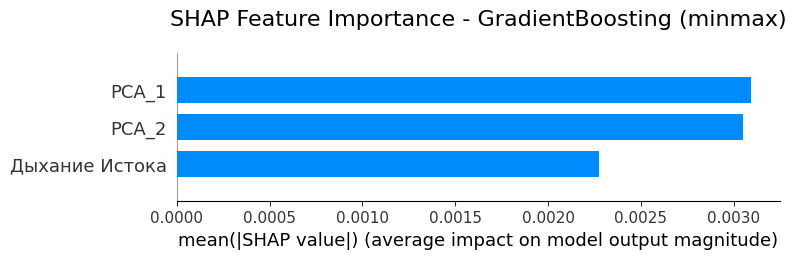


2. SHAP Summary Plot (пчелиный рой):


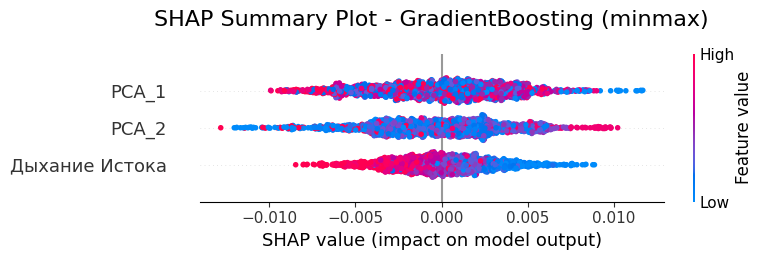

In [ ]:
import shap
print("\nSHAP анализ для лучшей модели:")

explainer = shap.TreeExplainer(final_best_model)

X_sample = X_test_best

shap_values = explainer.shap_values(X_sample)

# важность признаков
print("\n1. SHAP Bar Plot (важность признаков):")
plt.figure(figsize=(10, 10))
shap.summary_plot(shap_values, X_sample, plot_type="bar", show=False)
plt.title(f'SHAP Feature Importance - {best_model["model"]} ({best_data_version})', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

# пчелиный рой
print("\n2. SHAP Summary Plot (пчелиный рой):")
plt.figure(figsize=(10, 15))
shap.summary_plot(shap_values, X_sample, plot_type="dot", show=False)
plt.title(f'SHAP Summary Plot - {best_model["model"]} ({best_data_version})', fontsize=16, pad=20)
plt.tight_layout()
plt.show()


**1. График важности признаков:**
- Этот график показывает, какие признаки наиболее важны для модели, но не показывает направление влияния (увеличивает или уменьшает прогноз). Длина каждого бара показывает среднее абсолютное значение SHAP для этого признака по всем наблюдениям. Признаки упорядочены сверху вниз по важности. 
- Для нашей модели самый важный признак - "PCA_1". Наименее важный признак - "Дыхание Истока".

**2. График пчелиного роя:**
- Для PCA_1: распределение от -0.010 до 0.010. Слева преобладают красные точки, справа - синие. Низкие значения PCA_1 увеличивают прогноз, а высокие значения PCA_1 уменьшают.
- Для PCA_2: слева преобладают синие точки, а справа - красные. То есть низкие значения уменьшают прогноз, высокие - увеличивают.
- Маленькие значения признака "Дыхание Истока" увеличивают значение целевой переменной "Гармония Бессмертия".

# 6. <a id='toc6_'></a>[Результат работы](#toc0_)

- Результаты показывают высокое качество моделей, что свидетельствует о наличии выраженных закономерностей в данных. Модели демонстрируют отличную предсказательную способность.

- Лучшая модель: ***GradientBoosting с масштабированием MinMax***: R² = 0.8479, MAE: 0.0016, MAPE: 0.16%, RMSE: 0.0029. Эта модель достигла баланса между точностью и стабильностью, демонстрируя высокую объясняющую способность при минимальной ошибке. Параметры модели (learning_rate=0.19, max_depth=5, 175 деревьев) указывают на умеренную сложность, что предотвращает переобучение.

- *RandomForest* показал сопоставимые результаты с R² около 0.85, что подтверждает стабильность ансамблевых методов на этих данных. Небольшое преимущество GradientBoosting объясняется его более точной настройкой на остаточные ошибки.

- *Ridge* регрессия показала ужасно низкие результаты (R² ≈ 0.008), что указывает на сильную нелинейность зависимостей в данных. Линейная модель неспособна адекватно описать сложные взаимосвязи между признаками и целевой переменной. Гипотеза о нелийности в данных подтвердилась.

- **Влияние масштабирования** данных оказалось минимальным для древовидных моделей (GradientBoosting и RandomForest), что ожидаемо, так как эти алгоритмы нечувствительны к масштабу признаков. При этом: немасштабированные данные дали хорошие результаты для RandomForest, MinMax-масштабирование оптимально для GradientBoosting, Standardized и Robust масштабирования показали аналогичные результаты

**Конечный вывод**: древовидные ансамблевые методы (особенно GradientBoosting) идеально подходят для этой задачи, тогда как линейные модели совершенно неприменимы. GradientBoosting с MinMax-масштабированием можно использовать в реальных условиях. Модель объясняет 85% дисперсии целевой переменной, что является отличным показателем.